# Social network report - machine learning part
### Name: YUJIA LIU
### Student ID:16025924

   # Content

## Task 1 Introduction (page1)
## Task 2 Data exploratory (page1)
## Task 3 Data processing (page4)
## Task 4 Data analysis (page8) 
> ### Part 1 Algorithmic analysis for whole dataset (page21)
> ### Part 2 Algorithmic analysis for Las vegas (page24)
> ### Part 3 Algorithmic analysis for Montreal (page27)
> ### Part 4 Algorithmic analysis for Edinburgh (page30)
> ### Part 5 Further analysis for feature('review count) in each city(page33)

## Task 5 Conclusion (page41)

## Task 1 Introduction
This report mainly focused on finding out which features associated strongly with high/low star rating in the restaurant in one city. High/low star rating will directly affect the benefits of restaurant in current Internet world, the higher the star rating online, the better the impression customer has on the restaurant, the more number of customers the restaurant will attract later and finally the restaurant will gain more benefits in theory. In order to solve this issue, this report will conduct several steps like Data exploratory, Data processing, Data analyzing and Data outcome description. In addition, many tables and figures will be supported to confirm the results and findings and the process of all methodologies will also be explained at the same time. At the end, the conclusion will summarize the main findings of this report and make an emphasis on the limitations and possible extensions of work in this report. All works below are done in Jupyter notebook (python).

> ** Before starting the report, it is necessary to import many useful python package below in order to support all works in report later

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab    
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Task2 Data exploratory

The dataset was found and downloaded from the Yelp challenge dataset website (https://www.yelp.ca/dataset_challenge/). Yelp was founded in 2004 to help people find suitable local businesses like restaurant, dentists, hair stylists and mechanics. Yelp firm created connection with many firms in different countries all over the world. In addition, there are 24 million unique online users who visited Yelp online website including Yelp app in one month and around 65 million visitors who access Yelp including mobile web in Q4 2016. More importantly, more than 121 million reviews were written by Yelpers at the end of Q4 2016. Therefore, there are many datasets which contains different features of different business. Firstly, i downloaded the business file from the Yelp website and applying ‘Pandas’ package to read the business file on ‘Jupyter notebook’. The full information for business file is shown below. 

In [2]:
business=pd.read_csv('C:/Users/yifeichongtian/Desktop/UCL course material/data analytics/Yelp dataset/Yelp CSV dataset/yelp_academic_dataset_business.csv',encoding='gb18030')

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,4,7,17,26,29,31,57,60,66,69,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
business['attributes.Ambience.divey'].value_counts()

False    20869
True      1479
Name: attributes.Ambience.divey, dtype: int64

In [24]:
features=['categories','attributes.Ambience.divey','hours.Thursday.open','hours.Friday.open','attributes.Good For.latenight','attributes.Outdoor Seating'
         ,'attributes.Alcohol','attributes.Ambience.classy','attributes.By Appointment Only','attributes.Parking.lot','business_id'
         ,'attributes.Ambience.touristy','hours.Tuesday.open','name','attributes.Parking.street','attributes.Ambience.hipster'
         ,'attributes.Price Range','attributes.Good For.breakfast','attributes.Parking.garage','review_count','state','attributes.Accepts Credit Cards'
         ,'hours.Friday.close','attributes.Good For.dessert','attributes.Takes Reservations','hours.Saturday.open','attributes.Ambience.trendy'
         ,'attributes.Delivery','hours.Wednesday.close','attributes.Wi-Fi','open','city','attributes.Wheelchair Accessible'
         ,'stars','type','attributes.Caters','attributes.Ambience.intimate','latitude','attributes.Good For.dinner','longitude'
         ,'hours.Monday.close','hours.Tuesday.close','hours.Saturday.close','attributes.Good for Kids','attributes.Parking.validated'
         ,'hours.Sunday.open','attributes.Has TV','hours.Sunday.close','attributes.Ambience.casual','hours.Wednesday.open'
         ,'attributes.Noise Level','attributes.Attire','attributes.Good For Groups','neighborhoods','attributes.Ambience.romantic'
         ,'attributes.Ambience.upscale']
business[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85901 entries, 0 to 85900
Data columns (total 56 columns):
categories                          85901 non-null object
attributes.Ambience.divey           22348 non-null object
hours.Thursday.open                 57621 non-null object
hours.Friday.open                   57361 non-null object
attributes.Good For.latenight       23999 non-null object
attributes.Outdoor Seating          28425 non-null object
attributes.Alcohol                  25399 non-null object
attributes.Ambience.classy          22950 non-null object
attributes.By Appointment Only      17377 non-null object
attributes.Parking.lot              49374 non-null object
business_id                         85901 non-null object
attributes.Ambience.touristy        22950 non-null object
hours.Tuesday.open                  56676 non-null object
name                                85901 non-null object
attributes.Parking.street           49374 non-null object
attributes.Ambience.h

In [35]:
business['attributes.Noise Level'].value_counts()

average      14807
quiet         4814
loud          2058
very_loud      998
Name: attributes.Noise Level, dtype: int64

In [38]:
business[business['attributes.Noise Level']=='average'].stars.value_counts()

4.0    4411
3.5    4229
3.0    2474
4.5    1749
2.5    1168
2.0     428
5.0     198
1.5     134
1.0      16
Name: stars, dtype: int64

In [39]:
business[business['attributes.Noise Level']=='quiet'].stars.value_counts()

4.0    1368
3.5    1182
4.5     825
3.0     683
2.5     374
2.0     180
5.0     138
1.5      54
1.0      10
Name: stars, dtype: int64

In [25]:
YUJIA=business[features]

In [26]:
YUJIA.to_csv('C:/Users/yifeichongtian/Desktop/SNA/dataset/YUJIA.csv')

The size of business file above is 64.2MB with 98 features including city and star rating. This 98 features has 96 non-null objects and 2 floats. Due to many missing value and Nan (Not a number) in the business file, different features have different entries, some features have less than 10000 entries and hence, i applied python code skill like ‘for loop’ and ‘if loop’ to choose 24 features with more than at least 10 thousand rows in order to be convenient for further analysis. These 24 selected features are ‘stars’(star rating for restaurant), ‘categories’(type of business),’business_id’(Identity number of business), ‘city’, ‘state’, ‘review_count’(the number of reviews each user will give), ‘attributes.Noise Level’, 'attributes.Wi-Fi', 'attributes.Price Range', ‘attributes.Good for Kids’, ‘attributes.waiter service’, ‘attributes.Take-out’, ‘attributes.outdoor seating’, ‘attributes.Parking lot’, ‘attributes parking street’, ‘attributes.parking garage’,’attributes parking valet’, ‘attributes parking validated’, ‘ attributes good for dessert’, ‘attributes good for latenight’, ‘attributes good for brunch’, ‘attributes good for lunch’, ‘attributes good for dinner’ and ‘attribute good for breakfast’.. I put the information of these selected features in 'new' list below.

In [4]:
feature=['stars','categories','business_id','city','state','review_count','business_id','attributes.Noise Level','attributes.Wi-Fi','attributes.Price Range',
        'attributes.Good for Kids','attributes.Waiter Service','attributes.Take-out','attributes.Outdoor Seating','attributes.Parking.lot','attributes.Parking.street',
        'attributes.Parking.garage','attributes.Parking.valet','attributes.Parking.validated','attributes.Good For.dessert','attributes.Good For.latenight','attributes.Good For.brunch',
        'attributes.Good For.lunch','attributes.Good For.dinner','attributes.Good For.breakfast']

new=[]

for index,columns in business[feature].iterrows():
    new_categories = str(columns['categories']).lower()
    Id = columns['business_id']
    City = columns['city']
    Stars = columns['stars']
    State = columns['state']
    Review = columns['review_count']
    Noise= columns['attributes.Noise Level']
    WiFi= columns['attributes.Wi-Fi']
    price= columns['attributes.Price Range']
    Good_for_kids= columns['attributes.Good for Kids']
    waiter = columns['attributes.Waiter Service']
    Takeout= columns['attributes.Take-out']
    Outdoor = columns['attributes.Outdoor Seating']
    park_lot = columns['attributes.Parking.lot'] 
    park_street = columns['attributes.Parking.street'] 
    park_garage= columns['attributes.Parking.garage'] 
    park_valet = columns['attributes.Parking.valet'] 
    park_validated=  columns['attributes.Parking.validated'] 
    Good_for_Dessert= columns['attributes.Good For.dessert']
    Good_for_latenight= columns['attributes.Good For.latenight']
    Good_for_brunch= columns['attributes.Good For.brunch']
    Good_for_lunch= columns['attributes.Good For.lunch']
    Good_for_dinner= columns['attributes.Good For.dinner']
    Good_for_breakfast= columns['attributes.Good For.breakfast']
    
    
    if 'restaurant' in new_categories:
          new.append({"categories":new_categories,"business_id":Id,"city":City,"stars":Stars,"state":State,
                      "review_count":Review, 'attributes.Noise Level':Noise, 'attributes.Wi-Fi':WiFi,
                      'attributes.Price Range':price,'attributes.Good for Kids':Good_for_kids,
                      'attributes.Waiter Service':waiter,'attributes.Take-out':Takeout,'attributes.Outdoor Seating':Outdoor,
                      'attributes.Parking.lot':park_lot,'attributes.Parking.street':park_street,
                      'attributes.Parking.garage':park_garage,'attributes.Parking.valet':park_valet,
                      'attributes.Parking.validated':park_validated,'attributes.Good For.dessert':Good_for_Dessert,
                      'attributes.Good For.latenight':Good_for_latenight,'attributes.Good For.brunch':Good_for_brunch,
                      'attributes.Good For.lunch':Good_for_lunch,'attributes.Good For.dinner':Good_for_dinner,
                      'attributes.Good For.breakfast':Good_for_breakfast})

Converting the 'new' list into 'new_new' file with DataFrame type. However, the ‘new_new’ dataset below was consisted of 24 columns but with many Nan values in table. 

In [5]:
new_new=pd.DataFrame(new)
new_new.categories='restaurant'
new_new=new_new.drop(['categories'],axis=1)
new_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 23 columns):
attributes.Good For.breakfast    22975 non-null object
attributes.Good For.brunch       22914 non-null object
attributes.Good For.dessert      22911 non-null object
attributes.Good For.dinner       22966 non-null object
attributes.Good For.latenight    22968 non-null object
attributes.Good For.lunch        22968 non-null object
attributes.Good for Kids         24421 non-null object
attributes.Noise Level           20312 non-null object
attributes.Outdoor Seating       23739 non-null object
attributes.Parking.garage        21946 non-null object
attributes.Parking.lot           21946 non-null object
attributes.Parking.street        21946 non-null object
attributes.Parking.valet         21946 non-null object
attributes.Parking.validated     21751 non-null object
attributes.Price Range           24972 non-null object
attributes.Take-out              24515 non-null object
attributes.

In order to remove these Nan values, ‘dropna’ was used to delete all Nan values in current dataset. As a result, a new dataset which named ‘df’ and remained 24 features with same 15849 non-null entries was created. Its information table is below. The following way is to convert these features into numerical value because 21 features are kind in non-null objects and only three are float which is not applicable in the data analysis further. Consequently, the first step is to divide value counts of each feature. 

In [6]:
df=new_new.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15849 entries, 1 to 26727
Data columns (total 23 columns):
attributes.Good For.breakfast    15849 non-null object
attributes.Good For.brunch       15849 non-null object
attributes.Good For.dessert      15849 non-null object
attributes.Good For.dinner       15849 non-null object
attributes.Good For.latenight    15849 non-null object
attributes.Good For.lunch        15849 non-null object
attributes.Good for Kids         15849 non-null object
attributes.Noise Level           15849 non-null object
attributes.Outdoor Seating       15849 non-null object
attributes.Parking.garage        15849 non-null object
attributes.Parking.lot           15849 non-null object
attributes.Parking.street        15849 non-null object
attributes.Parking.valet         15849 non-null object
attributes.Parking.validated     15849 non-null object
attributes.Price Range           15849 non-null object
attributes.Take-out              15849 non-null object
attributes.

In [ ]:
df['business_id'].value_counts()

In [8]:
business.categories

0                           [u'Fast Food', u'Restaurants']
1                                           [u'Nightlife']
2                  [u'Active Life', u'Mini Golf', u'Golf']
3        [u'Bars', u'American (New)', u'Nightlife', u'L...
4                                [u'Active Life', u'Golf']
5        [u'Bars', u'American (Traditional)', u'Nightli...
6                [u'Auto Repair', u'Automotive', u'Tires']
7                           [u'Active Life', u'Mini Golf']
8        [u'Roofing', u'Home Services', u'Decks & Raili...
9                              [u'Veterinarians', u'Pets']
10         [u'Libraries', u'Public Services & Government']
11               [u'Automotive', u'Auto Parts & Supplies']
12       [u'Burgers', u'Breakfast & Brunch', u'American...
13                                   [u'Food', u'Grocery']
14              [u'Automotive', u'Gas & Service Stations']
15       [u'Local Services', u'Dry Cleaning & Laundry',...
16              [u'Automotive', u'Gas & Service Stations

Las Vegas, Montreal, Edinburgh

## Task 3 Data processing

As we see below, there are three kinds among this 21 features with non-null object. 

In [81]:
df.head()

attributes.Good For.breakfast attributes.Good For.brunch  \
1                          False                      False   
2                          False                      False   
4                          False                      False   
5                           True                      False   
11                         False                       True   

   attributes.Good For.dessert attributes.Good For.dinner  \
1                        False                      False   
2                        False                       True   
4                        False                      False   
5                        False                      False   
11                       False                      False   

   attributes.Good For.latenight attributes.Good For.lunch  \
1                          False                      True   
2                          False                     False   
4                          False                     False   
5                          False                     False   
11                         False                     False   

   attributes.Good for Kids attributes.Noise Level attributes.Outdoor Seating  \
1                      True                average                      False   
2                     False                   loud                       True   
4                      True                average                      False   
5                      True                average                      False   
11                     True                average                      False   

   attributes.Parking.garage  ...  attributes.Parking.validated  \
1                      False  ...                         False   
2                      False  ...                         False   
4                      False  ...                         False   
5                      False  ...                         False   
11                     False  ...                         False   

   attributes.Price Range attributes.Take-out attributes.Waiter Service  \
1                       2                True                      True   
2                       1                True                      True   
4                       1                True                      True   
5                       1                True                      True   
11                      1                True                      True   

   attributes.Wi-Fi                                        business_id  \
1                no  business_id    mVHrayjG3uZ_RLHkLj-AMg
business...   
2              free  business_id    KayYbHCt-RkbGcPdGOThNg
business...   
4              free  business_id    fNGIbpazjTRdXgwRY_NIXA
business...   
5                no  business_id    b9WZJp5L1RZr4F1nxclOoQ
business...   
11               no  business_id    wqu7ILomIOPSduRwoWp4AQ
business...   

          city review_count stars state  
1     Braddock         26.0   4.5    PA  
2     Carnegie         23.0   4.0    PA  
4     Carnegie         10.0   4.0    PA  
5     Carnegie         69.0   4.5    PA  
11  Pittsburgh         16.0   3.5    PA  

[5 rows x 23 columns]

The first kind has more than 2 value counts like 'Noise', 'Price', 'WiFi', 'review_count', 'state' and 'city'. Among them, the feature 'review_count' is no needed to transform because it is originally numerical value. 

In [82]:
df['attributes.Parking.validated'].value_counts()

False    12896
FALSE     2846
True        91
TRUE        16
Name: attributes.Parking.validated, dtype: int64

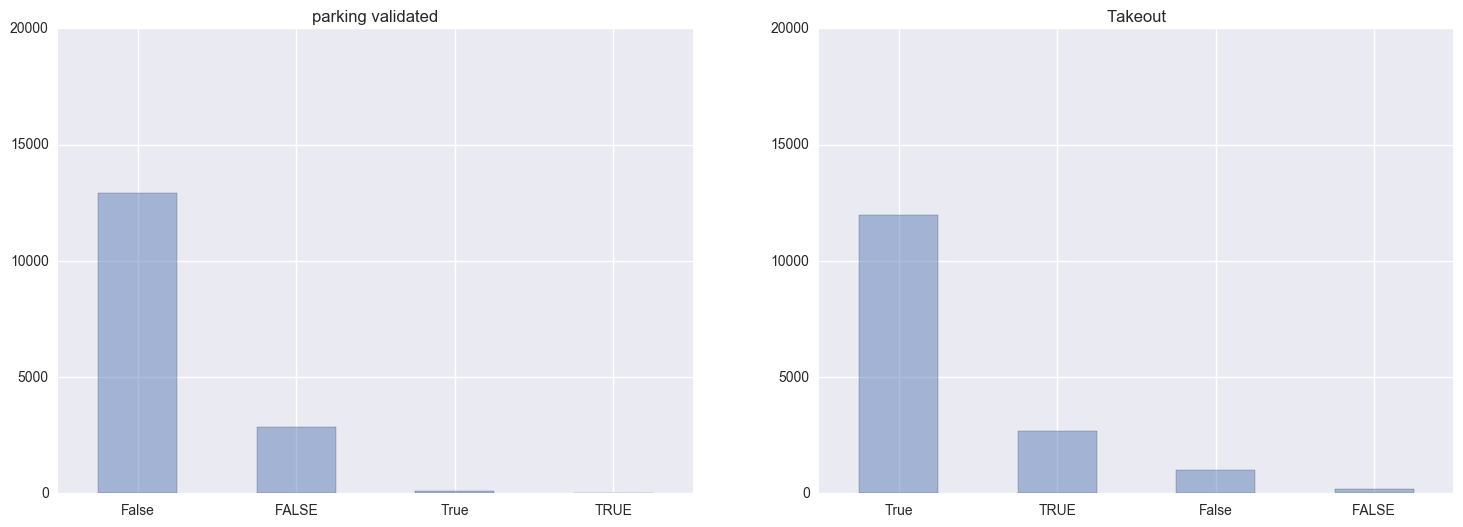

In [83]:
fig=plt.figure(figsize=(18,6),dpi=1600)

ax1=fig.add_subplot(121)
df['attributes.Parking.validated'].value_counts().plot(kind='bar', label='parking validated', alpha=0.45)
labels=["False","FALSE","True","TRUE"]
ax1.set_xticklabels(labels,rotation=0)
ax1.set_ylim(0, 20000)
ax1.set_title("parking validated")

ax2=fig.add_subplot(122)
df['attributes.Take-out'].value_counts().plot(kind='bar', label='Take out', alpha=0.45)
labels=["True","TRUE","False","FALSE"]
ax2.set_xticklabels(labels,rotation=0)
ax2.set_ylim(0, 20000)
ax2.set_title("Takeout")


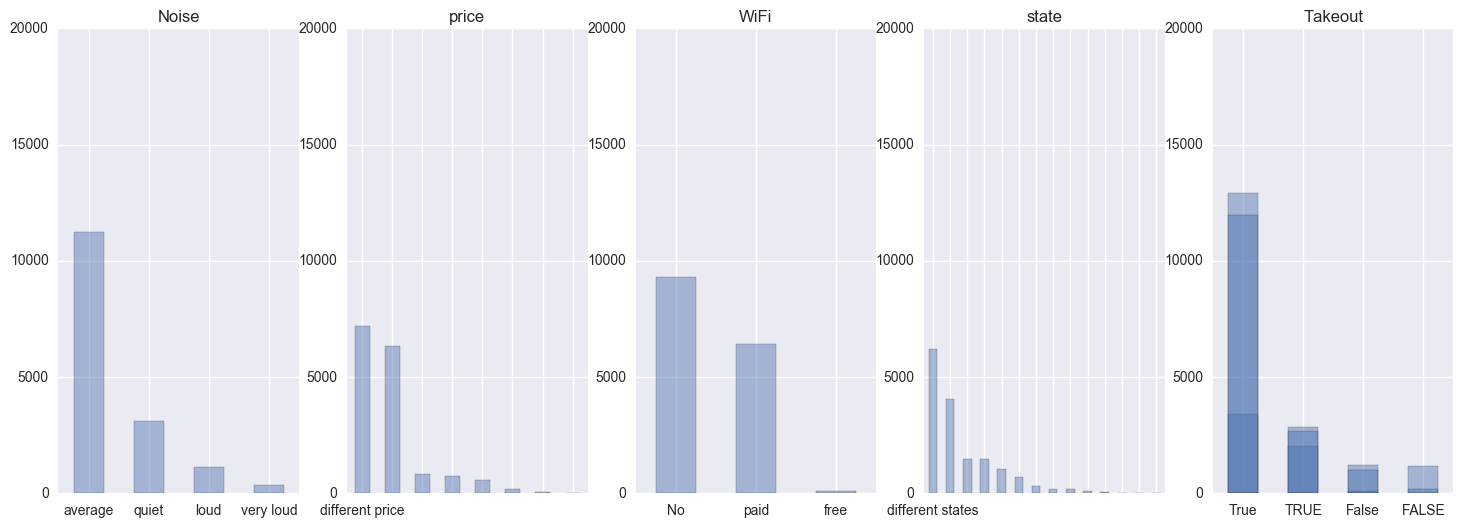

In [84]:
fig=plt.figure(figsize=(18,6),dpi=1600)
ax1=fig.add_subplot(151)

df['attributes.Noise Level'].value_counts().plot(kind='bar', label='Noise', alpha=0.45)
labels=["average","quiet","loud","very loud"]
ax1.set_xticklabels(labels,rotation=0)
ax1.set_ylim(0, 20000)
ax1.set_title("Noise")

ax2=fig.add_subplot(152)
df['attributes.Price Range'].value_counts().plot(kind='bar', label='price', alpha=0.45)
labels=["different price"]
ax2.set_xticklabels(labels,rotation=0)
ax2.set_ylim(0, 20000)
ax2.set_title("price")

ax3=fig.add_subplot(153)
df['attributes.Wi-Fi'].value_counts().plot(kind='bar', label='WiFi', alpha=0.45)
labels=["No","paid","free"]
ax3.set_xticklabels(labels,rotation=0)
ax3.set_ylim(0, 20000)
ax3.set_title("WiFi")

ax4=fig.add_subplot(154)
df['state'].value_counts().plot(kind='bar', label='state', alpha=0.45)
labels=["different states"]
ax4.set_xticklabels(labels,rotation=0)
ax4.set_ylim(0, 20000)
ax4.set_title("state")

ax4=fig.add_subplot(155)
df['city'].value_counts().plot(kind='bar', label='city', alpha=0.45)
labels=["different cities"]
ax4.set_xticklabels(labels,rotation=0)
ax4.set_ylim(0, 20000)
ax4.set_title("city")

ax4=fig.add_subplot(155)
df['attributes.Parking.validated'].value_counts().plot(kind='bar', label='parking validated', alpha=0.45)
labels=["False","FALSE","True","TRUE"]
ax4.set_xticklabels(labels,rotation=0)
ax4.set_ylim(0, 20000)
ax4.set_title("parking validated")

ax4=fig.add_subplot(155)
df['attributes.Take-out'].value_counts().plot(kind='bar', label='Take out', alpha=0.45)
labels=["True","TRUE","False","FALSE"]
ax4.set_xticklabels(labels,rotation=0)
ax4.set_ylim(0, 20000)
ax4.set_title("Takeout")


In [85]:
len(df['review_count'].value_counts()) # numercial value

803

For features 'Noise', 'Price', 'WiFi', 'state', 'city', they are all non-null objects, for example,  "Noise" has four levels like 'quiet', 'average', 'loud' and 'very loud'. "WiFi" has three levels like 'no', 'free' and 'paid'. The method to convert them is to apply 'loc' to set numerical value for each level. For instance of 'Noise', set 'quiet' as '0', set 'average' as '1', set 'loud' as '2' and set 'very loud' as 3, then applying 'label_encoder' to transform them into 'integer' type. 

>The 'loc' formula: filename.loc[filename['feature name']=='current name of each value count', 'feature name':]=set value
>
>The 'label_encoder" formula : filename['feature name']=label_encoder.fit_transform(filename['feature name'])

In [86]:
from sklearn import preprocessing
np.random.seed(12)

label_encoder=preprocessing.LabelEncoder()
Noise=pd.DataFrame(df['attributes.Noise Level'])
Noise.loc[Noise['attributes.Noise Level']=='quiet','attributes.Noise Level':]=0
Noise.loc[Noise['attributes.Noise Level']=='average','attributes.Noise Level':]=1
Noise.loc[Noise['attributes.Noise Level']=='loud','attributes.Noise Level':]=2
Noise.loc[Noise['attributes.Noise Level']=='very_loud','attributes.Noise Level':]=3
Noise['attributes.Noise Level']=label_encoder.fit_transform(Noise['attributes.Noise Level'])
Noise['attributes.Noise Level'].value_counts()


1    11236
0     3129
2     1110
3      374
Name: attributes.Noise Level, dtype: int64

For price, it has mutiple value counts like '2' and '2.0'. Therefore, in addition to transformation. it is needed to sum up value counts which have mutiple value. 

In [87]:
df['attributes.Price Range'].value_counts()

2.0    7182
1.0    6326
2       825
3.0     725
1       570
4.0     170
3        42
4         9
Name: attributes.Price Range, dtype: int64

As a result, applying 'loc' to set '2.0' and '2' as '2', set '1.0' and '1' as '1', set '3.0' and '3' as '3', set '4.0' and '4' as 4, then 'label_encoder' was used to transfrom these value into 'integer' type.

In [88]:
price=pd.DataFrame(df['attributes.Price Range'])
price.columns=['price']
price.loc[price['price']=='2.0','price':]=2
price.loc[price['price']=='1.0','price':]=1
price.loc[price['price']=='2','price':]=2
price.loc[price['price']=='3.0','price':]=3
price.loc[price['price']=='1','price':]=1
price.loc[price['price']=='4.0','price':]=4
price.loc[price['price']=='3','price':]=3
price.loc[price['price']=='4','price':]=4
price['price']=label_encoder.fit_transform(price['price'])
price['price'].value_counts()


1    8007
0    6896
2     767
3     179
Name: price, dtype: int64

For 'Wi Fi', set 'no' as 0, set 'free' as 1, set''paid' as 2 and then also applying 'label_encoder" to convert them into integer type.  

In [89]:
df['attributes.Wi-Fi'].value_counts()

no      9312
free    6421
paid     116
Name: attributes.Wi-Fi, dtype: int64

In [90]:
WiFi=pd.DataFrame(df['attributes.Wi-Fi'])
WiFi.loc[WiFi['attributes.Wi-Fi']=="no",'attributes.Wi-Fi':]=0
WiFi.loc[WiFi['attributes.Wi-Fi']=="free",'attributes.Wi-Fi':]=1
WiFi.loc[WiFi['attributes.Wi-Fi']=="paid",'attributes.Wi-Fi':]=2
WiFi['attributes.Wi-Fi']=label_encoder.fit_transform(WiFi['attributes.Wi-Fi'])
WiFi['attributes.Wi-Fi'].value_counts()

0    9312
1    6421
2     116
Name: attributes.Wi-Fi, dtype: int64

For 'state', it originally has numerical value but in 'object' type, therefore, just applying "label_encoder" to transform object value into 'integer'. 

In [92]:
df['state'].value_counts()
state=pd.DataFrame(df.state)
state['state']=label_encoder.fit_transform(state['state'])
state['state'].value_counts()

0     6218
7     4055
5     1476
10    1473
9     1024
13     707
2      321
3      193
8      191
1       95
11      75
4       19
6        1
12       1
Name: state, dtype: int64

For 'city', it is similar to 'state' above because it is also in 'object' type but displayed in 'numerical value'. So applying 'label_encoder" to transform it into the numerical form. 

In [93]:
df['city'].value_counts()
city=pd.DataFrame(df['city'])
city['city']=label_encoder.fit_transform(city['city'])
city['city'].value_counts()

87     3410
136    2025
29     1231
115    1176
139     938
161     851
106     635
179     561
97      532
71      466
28      459
63      348
47      332
62      283
134     181
127     161
27      134
177     117
190     107
66       98
99       87
6        87
79       86
81       81
90       68
142      66
56       59
185      58
24       52
31       51
       ... 
68        1
60        1
123       1
44        1
155       1
163       1
12        1
162       1
204       1
38        1
101       1
189       1
165       1
157       1
4         1
10        1
125       1
26        1
117       1
50        1
130       1
58        1
93        1
77        1
82        1
45        1
37        1
114       1
5         1
195       1
Name: city, dtype: int64

Compared to the first kind of feature, the second type has four value counts but actually it has a binary value. For example of 'Takeout", it has value with mutiple meaning like "True" and "TRUE". Consequently, the first step is to apply 'loc' to set 'True' and 'TRUE' as '1', set 'False' and 'FALSE' as '0', then applying 'label_encoder' formula to transform these values into 'integer' type.

In [94]:
print (df['attributes.Take-out'].value_counts())
Takeout=pd.DataFrame(df['attributes.Take-out'])
Takeout.loc[Takeout['attributes.Take-out']=='True','attributes.Take-out':]=1
Takeout.loc[Takeout['attributes.Take-out']=='TRUE','attributes.Take-out':]=1
Takeout.loc[Takeout['attributes.Take-out']=='False','attributes.Take-out':]=0
Takeout.loc[Takeout['attributes.Take-out']=='FALSE','attributes.Take-out':]=0
Takeout['attributes.Take-out']=label_encoder.fit_transform(Takeout['attributes.Take-out'])
Takeout['attributes.Take-out'].value_counts()

True     11988
TRUE      2681
False      999
FALSE      181
Name: attributes.Take-out, dtype: int64


1    14669
0     1180
Name: attributes.Take-out, dtype: int64

Similar to 'Takeout', 'Parking validated' also has value with mutiple meaning like 'TRUE' and 'True'. So applying 'loc' set value "True" and "TRUE" as '1', set value "False" and "FALSE" as '0', then applying 'label_encoder' formula to transform setting value into 'integer' type.

In [95]:
print (df['attributes.Parking.validated'].value_counts())
parkingvalidated=pd.DataFrame(df['attributes.Parking.validated'])
parkingvalidated.loc[parkingvalidated['attributes.Parking.validated']=='True','attributes.Parking.validated':]=1
parkingvalidated.loc[parkingvalidated['attributes.Parking.validated']=='TRUE','attributes.Parking.validated':]=1
parkingvalidated.loc[parkingvalidated['attributes.Parking.validated']=='False','attributes.Parking.validated':]=0
parkingvalidated.loc[parkingvalidated['attributes.Parking.validated']=='FALSE','attributes.Parking.validated':]=0
parkingvalidated['attributes.Parking.validated']=label_encoder.fit_transform(parkingvalidated['attributes.Parking.validated'])
parkingvalidated['attributes.Parking.validated'].value_counts()

False    12896
FALSE     2846
True        91
TRUE        16
Name: attributes.Parking.validated, dtype: int64


0    15742
1      107
Name: attributes.Parking.validated, dtype: int64

The third type of feature only has binary classification like 'attributes.Good For.breakfast', 'attributes.Good For.dessert', 'attributes.Good For.dinner', 'attributes.Good For.brunch', 'attributes.Good For.latenight', 'attributes.Good For.lunch', 'attributes.Good for Kids', 'attributes.Outdoor Seating', 'attributes.Parking.garage', 'attributes.Parking.lot', 'attributes.Parking.street', 'attributes.Parking.valet' and 'attributes.Waiter Service' as below. 

In [96]:
df['attributes.Good For.breakfast'].value_counts()

False    14225
True      1624
Name: attributes.Good For.breakfast, dtype: int64

In [97]:
df['attributes.Good For.dessert'].value_counts()

False    15200
True       649
Name: attributes.Good For.dessert, dtype: int64

In [98]:
df['attributes.Good For.dinner'].value_counts()

False    11308
True      4541
Name: attributes.Good For.dinner, dtype: int64

In [99]:
df['attributes.Good For.brunch'].value_counts()

False    14234
True      1615
Name: attributes.Good For.brunch, dtype: int64

In [100]:
df['attributes.Good For.latenight'].value_counts()

False    14944
True       905
Name: attributes.Good For.latenight, dtype: int64

In [101]:
df['attributes.Good For.lunch'].value_counts()

False    9365
True     6484
Name: attributes.Good For.lunch, dtype: int64

In [102]:
df['attributes.Good for Kids'].value_counts()

True     13280
False     2569
Name: attributes.Good for Kids, dtype: int64

In [103]:
df['attributes.Outdoor Seating'].value_counts()

False    8676
True     7173
Name: attributes.Outdoor Seating, dtype: int64

In [104]:
df['attributes.Parking.garage'].value_counts()

False    14481
True      1368
Name: attributes.Parking.garage, dtype: int64

In [105]:
df['attributes.Parking.lot'].value_counts()

True     8735
False    7114
Name: attributes.Parking.lot, dtype: int64

In [106]:
df['attributes.Parking.street'].value_counts()

False    12797
True      3052
Name: attributes.Parking.street, dtype: int64

In [107]:
df['attributes.Parking.valet'].value_counts()

False    15248
True       601
Name: attributes.Parking.valet, dtype: int64

In [108]:
df['attributes.Waiter Service'].value_counts()

True     9999
False    5850
Name: attributes.Waiter Service, dtype: int64

In order to transform these binary features into numerical value, applying 'label_encoder' formula directly to convert.

In [109]:
df['attributes.Waiter Service']=label_encoder.fit_transform(df['attributes.Waiter Service'])
df['attributes.Parking.valet']=label_encoder.fit_transform(df['attributes.Parking.valet'])
df['attributes.Parking.street']=label_encoder.fit_transform(df['attributes.Parking.street'])
df['attributes.Parking.lot']=label_encoder.fit_transform(df['attributes.Parking.lot'])
df['attributes.Parking.garage']=label_encoder.fit_transform(df['attributes.Parking.garage'])
df['attributes.Outdoor Seating']=label_encoder.fit_transform(df['attributes.Outdoor Seating'])
df['attributes.Good for Kids']=label_encoder.fit_transform(df['attributes.Good for Kids'])
df['attributes.Good For.lunch']=label_encoder.fit_transform(df['attributes.Good For.lunch'])
df['attributes.Good For.latenight']=label_encoder.fit_transform(df['attributes.Good For.latenight'])
df['attributes.Good For.dinner']=label_encoder.fit_transform(df['attributes.Good For.dinner'])
df['attributes.Good For.dessert']=label_encoder.fit_transform(df['attributes.Good For.dessert'])
df['attributes.Good For.brunch']=label_encoder.fit_transform(df['attributes.Good For.brunch'])
df['attributes.Good For.breakfast']=label_encoder.fit_transform(df['attributes.Good For.breakfast'])

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Now, applying 'pd.concat()' formula to put these transformed features into one DataFrame.

> 'pd.concat()' formula=pd.concat([filename['feature name'].........],axis=1)

In [110]:
feature=['stars','attributes.Waiter Service', 'attributes.Parking.valet', 'attributes.Parking.street', 'attributes.Parking.lot', 'attributes.Parking.garage', 'attributes.Outdoor Seating', 'attributes.Good for Kids', 'attributes.Good For.lunch', 'attributes.Good For.latenight', 'attributes.Good For.dinner', 'attributes.Good For.dessert', 'attributes.Good For.brunch', 'attributes.Good For.breakfast']
final=pd.concat([df[feature], Noise['attributes.Noise Level'],WiFi,Takeout['attributes.Take-out'], parkingvalidated['attributes.Parking.validated'],city['city'],state['state'],df['review_count']], axis=1)

As we see below, we get a new dataset which named 'final' with the same amount of features as 'df' file except for 'price'.

In [50]:
final.columns

Index(['stars', 'attributes.Waiter Service', 'attributes.Parking.valet',
       'attributes.Parking.street', 'attributes.Parking.lot',
       'attributes.Parking.garage', 'attributes.Outdoor Seating',
       'attributes.Good for Kids', 'attributes.Good For.lunch',
       'attributes.Good For.latenight', 'attributes.Good For.dinner',
       'attributes.Good For.dessert', 'attributes.Good For.brunch',
       'attributes.Good For.breakfast', 'attributes.Noise Level',
       'attributes.Wi-Fi', 'attributes.Take-out',
       'attributes.Parking.validated', 'city', 'state', 'review_count'],
      dtype='object')

In order to make the feature name more easy to read, i will change each name in final columns to ['stars','waiter','parkingvalet','parkingstreet','parkinglot','parkinggarage','outdoor_seating','Good_for_kids','Good_for_lunch','Good_for_latenight','Good_for_dinner','Good_for_dessert','Good_for_brunch','Good_for_breakfast','Noise','WiFi','takeout','parkingvalidated','city','state','review_count'] as below

In [51]:
final.columns=['stars','waiter','parkingvalet','parkingstreet','parkinglot','parkinggarage','outdoor_seating','Good_for_kids','Good_for_lunch','Good_for_latenight','Good_for_dinner','Good_for_dessert','Good_for_brunch','Good_for_breakfast','Noise','WiFi','takeout','parkingvalidated','city','state','review_count']
final.head()

stars  waiter  parkingvalet  parkingstreet  parkinglot  parkinggarage  \
1     4.5       1             0              0           0              0   
2     4.0       1             0              0           1              0   
4     4.0       1             0              0           1              0   
5     4.5       1             0              0           1              0   
11    3.5       1             0              0           0              0   

    outdoor_seating  Good_for_kids  Good_for_lunch  Good_for_latenight  \
1                 0              1               1                   0   
2                 1              0               0                   0   
4                 0              1               0                   0   
5                 0              1               0                   0   
11                0              1               0                   0   

        ...       Good_for_dessert  Good_for_brunch  Good_for_breakfast  \
1       ...                      0                0                   0   
2       ...                      0                0                   0   
4       ...                      0                0                   0   
5       ...                      0                0                   1   
11      ...                      0                1                   0   

    Noise  WiFi  takeout  parkingvalidated  city  state  review_count  
1       1     0        1                 0    15      9          26.0  
2       2     1        1                 0    21      9          23.0  
4       1     1        1                 0    21      9          10.0  
5       1     0        1                 0    21      9          69.0  
11      1     0        1                 0   139      9          16.0  

[5 rows x 21 columns]

Afterwards, applying 'pd.concat()' formula to add transformed 'price' feature into 'final' file.

In [52]:
final=pd.concat([final,price],axis=1)
final.head()

stars  waiter  parkingvalet  parkingstreet  parkinglot  parkinggarage  \
1     4.5       1             0              0           0              0   
2     4.0       1             0              0           1              0   
4     4.0       1             0              0           1              0   
5     4.5       1             0              0           1              0   
11    3.5       1             0              0           0              0   

    outdoor_seating  Good_for_kids  Good_for_lunch  Good_for_latenight  ...    \
1                 0              1               1                   0  ...     
2                 1              0               0                   0  ...     
4                 0              1               0                   0  ...     
5                 0              1               0                   0  ...     
11                0              1               0                   0  ...     

    Good_for_brunch  Good_for_breakfast  Noise  WiFi  takeout  \
1                 0                   0      1     0        1   
2                 0                   0      2     1        1   
4                 0                   0      1     1        1   
5                 0                   1      1     0        1   
11                1                   0      1     0        1   

    parkingvalidated  city  state  review_count  price  
1                  0    15      9          26.0      1  
2                  0    21      9          23.0      0  
4                  0    21      9          10.0      0  
5                  0    21      9          69.0      0  
11                 0   139      9          16.0      0  

[5 rows x 22 columns]

As we see below, all features in final file below have been trasnformed into numerical value totally and we can start to take data analysis.

In [53]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15849 entries, 1 to 26727
Data columns (total 22 columns):
stars                 15849 non-null float64
waiter                15849 non-null int64
parkingvalet          15849 non-null int64
parkingstreet         15849 non-null int64
parkinglot            15849 non-null int64
parkinggarage         15849 non-null int64
outdoor_seating       15849 non-null int64
Good_for_kids         15849 non-null int64
Good_for_lunch        15849 non-null int64
Good_for_latenight    15849 non-null int64
Good_for_dinner       15849 non-null int64
Good_for_dessert      15849 non-null int64
Good_for_brunch       15849 non-null int64
Good_for_breakfast    15849 non-null int64
Noise                 15849 non-null int64
WiFi                  15849 non-null int64
takeout               15849 non-null int64
parkingvalidated      15849 non-null int64
city                  15849 non-null int64
state                 15849 non-null int64
review_count          15849 n

## Task 4 Data analysis

Before analyzing the data, it is necessary to judge whether the feature is linear or nonlinear. So i apply python plot tool - 'matplotlib' to plot the linear relationship between dependent variable 'star rating' and independent variable individually. 

The plot formula: 
> fig, axs = plt.subplots(rows,columns, figsize=(height for whole graph, width for whole graph), facecolor='w', edgecolor='b')
>
> fig.subplots_adjust(hspace = height for subplot, wspace=width for subplot)

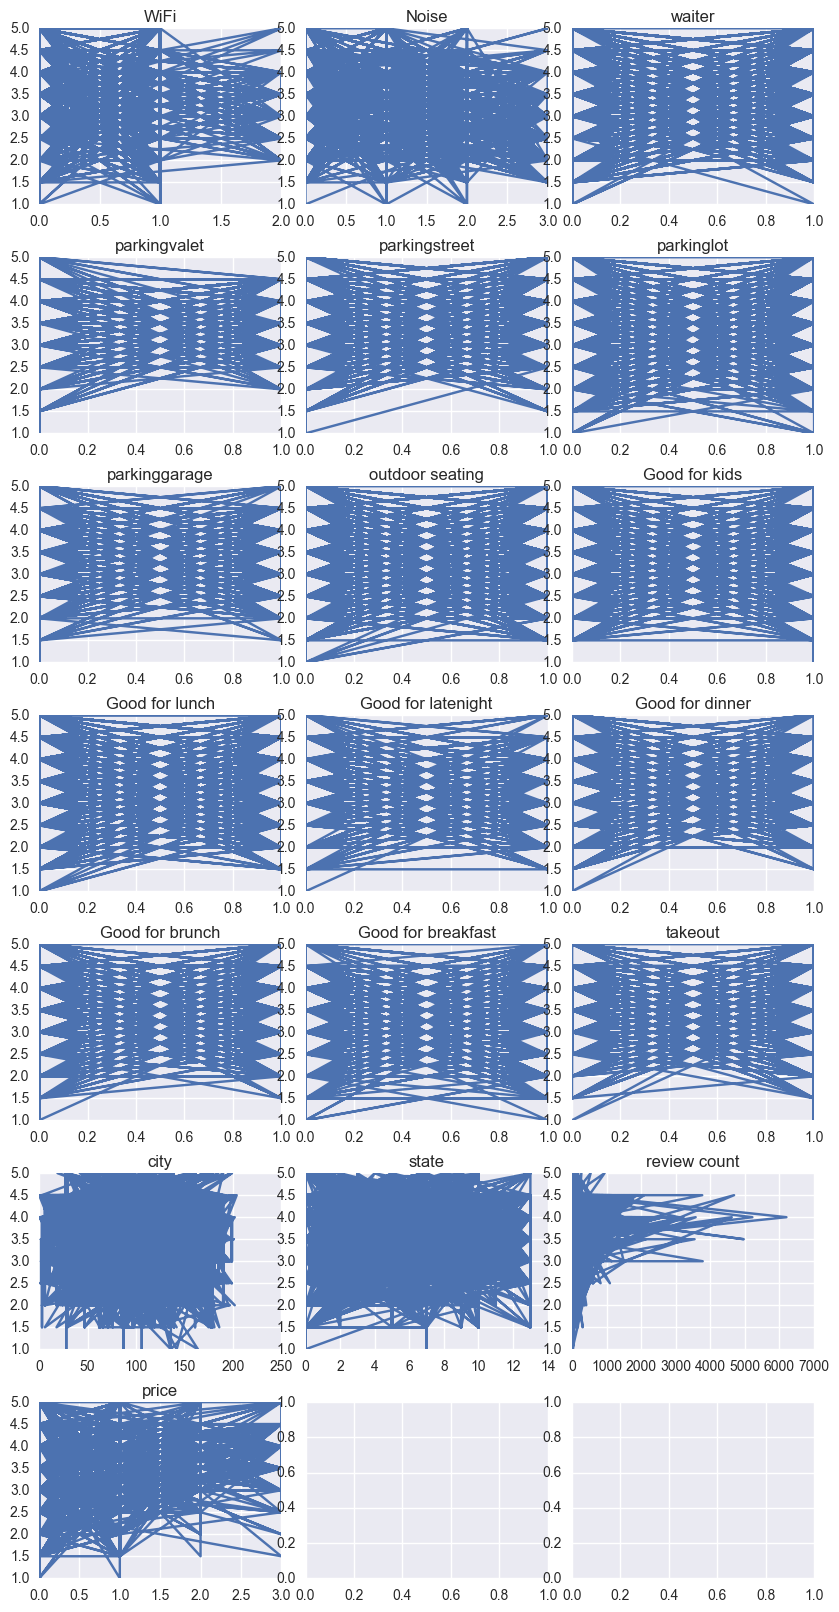

In [64]:
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(7,3, figsize=(10,20), facecolor='w', edgecolor='b')
fig.subplots_adjust(hspace = 0.3, wspace=0.1)

axs = axs.ravel()

x=final['WiFi']
y=df.stars
axs[0].plot(x,y)
axs[0].set_title('WiFi')
x1=final['Noise']
axs[1].plot(x1,y)
axs[1].set_title('Noise')
x2=final['waiter']
axs[2].plot(x2,y)
axs[2].set_title('waiter')
x3=final['parkingvalet']
axs[3].plot(x3,y)
axs[3].set_title('parkingvalet')
x4=final['parkingstreet']
axs[4].plot(x4,y)
axs[4].set_title('parkingstreet')
x5=final['parkinglot']
axs[5].plot(x5,y)
axs[5].set_title('parkinglot')
x6=final['parkinggarage']
axs[6].plot(x6,y)
axs[6].set_title('parkinggarage')
x7=final['outdoor_seating']
axs[7].plot(x7,y)
axs[7].set_title('outdoor seating')
x8=final['Good_for_kids']
axs[8].plot(x8,y)
axs[8].set_title('Good for kids')
x9=final['Good_for_lunch']
axs[9].plot(x9,y)
axs[9].set_title('Good for lunch')
x10=final['Good_for_latenight']
axs[10].set_title('Good for latenight')
axs[10].plot(x10,y)
x11=final['Good_for_dinner']
axs[11].plot(x11,y)
axs[11].set_title('Good for dinner')
x12=final['Good_for_brunch']
axs[12].plot(x12,y)
axs[12].set_title('Good for brunch')
x13=final['Good_for_breakfast']
axs[13].plot(x13,y)
axs[13].set_title('Good for breakfast')
x14=final['takeout']
axs[14].plot(x14,y)
axs[14].set_title('takeout')
x15=final['city']
axs[15].plot(x15,y)
axs[15].set_title('city')
x16=final['state']
axs[16].plot(x16,y)
axs[16].set_title('state')
x17=final['review_count']
axs[17].plot(x17,y)
axs[17].set_title('review count')
x18=final['price']
axs[18].plot(x18,y)
axs[18].set_title('price')


According to plot above, it is easy to see that no feature has a linear connection with dependent variable('star rating') because relationship between linear feature and dependent variable is a straight line. So all features are nonlinear for 'stars'. 

The method to analyse the relationship between nonlinear variable and dependent variable includes 'spearman' and 'kendall' rank correlation coefficient. In statistics, Spearman's rank correlation coefficient or Spearman's rho, named after Charles Spearman and often denoted by the Greek letter\rho  (rho) or as r_{s}. It is a nonparametric measure of rank correlation (statistical dependence between the ranking of two variables). It assesses how well the relationship between two variables can be described using a monotonic(nonlinear) function.

The Spearman correlation between two variables is equal to the Pearson correlation between the ranking values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other. If the correlation coefficient equals to '0', it means there is no nonlinear correlation between nonlinear feature and dependent variable. 

Intuitively, the Spearman correlation between two variables will be high when observations have a similar (or identical for a correlation of 1) rank (i.e. relative position label of the observations within the variable: 1st, 2nd, 3rd, etc.) between the two variables, and low when observations have a dissimilar (or fully opposed for a correlation of -1) rank between the two variables.



Therefore, The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the ranked variables. For a sample of size n, the n raw scores X_{i},Y_{i} are converted to ranks rg_X(i) and rg_Y(i), and r_{s} is computed from below formula:

> Tips: i apply 'mpimg' tool from 'matplotlib.image' tool to scrap the formula below from webiste because this formula is no way to write down in Jupyter notebook directly

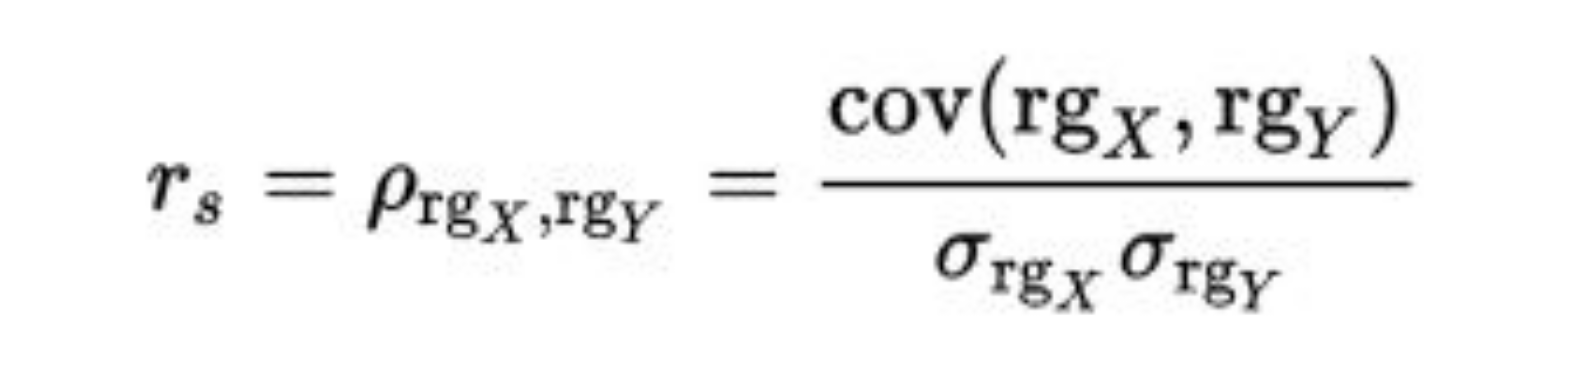

In [303]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(20,10))
lena = mpimg.imread('C:/Users/yifeichongtian/Desktop/DA final report/11.JPG')
plt.imshow(lena)
plt.axis('off')
plt.show()

The formula where:
>
>'p' denotes the usual Pearson correlation coefficient, but applied to the rank variables.
>
>cov(rg_X, rg_Y) is the covariance of the rank variables.
>
>Sigma(rg_X,rg_Y) are the standard deviations of the rank variables.

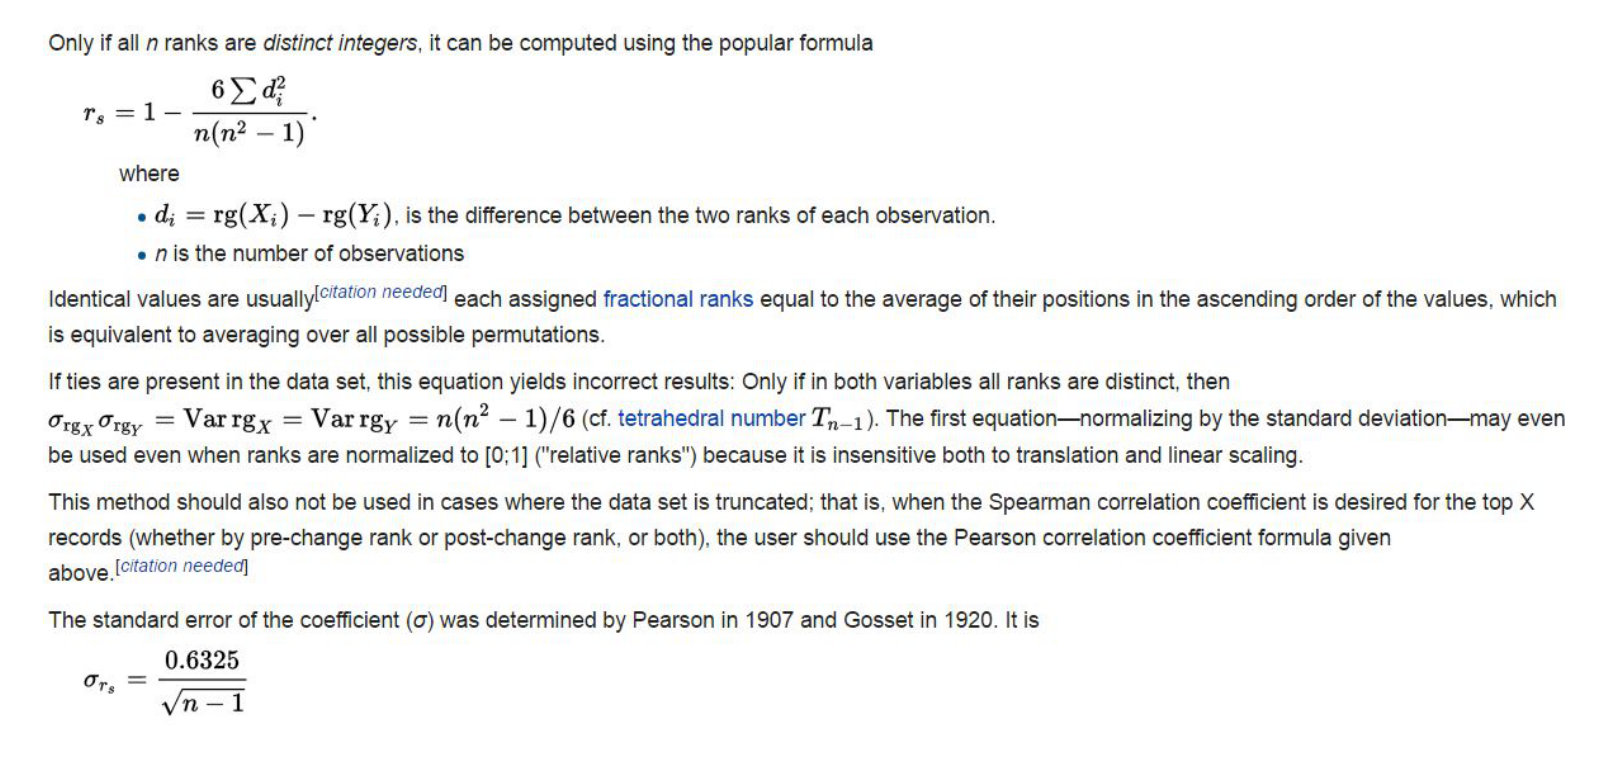

According to computation, the result of Spearman correlation matrix is displayed below:

In [696]:
final=final.sort(['review_count'],ascending=True)
final

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


stars  waiter  parkingvalet  parkingstreet  parkinglot  parkinggarage  \
637      3.0       0             0              0           0              0   
4003     3.0       0             0              0           0              0   
19205    4.0       1             0              0           0              0   
4972     4.5       0             0              0           0              0   
6836     2.5       0             0              0           0              0   
20603    1.5       0             0              0           0              0   
18099    3.0       1             0              0           0              0   
12968    3.5       1             0              0           0              0   
9868     3.0       1             0              0           0              0   
20599    4.5       0             0              0           1              0   
23160    3.5       1             0              0           0              0   
6772     1.5       0             0              0           0              0   
20734    2.5       0             0              0           0              0   
9904     4.0       1             0              0           0              0   
24571    3.5       1             0              0           0              0   
23089    4.5       1             0              0           0              0   
9975     4.5       1             0              0           0              0   
20387    4.0       0             0              0           0              0   
3681     2.5       0             0              0           0              0   
10048    3.5       0             0              0           0              0   
24720    4.0       1             0              0           0              0   
24730    4.5       0             0              0           1              0   
24560    1.5       1             0              0           1              0   
20332    5.0       1             0              0           0              0   
23246    3.5       1             0              0           0              0   
24264    5.0       0             0              0           0              0   
9401     4.5       0             0              0           0              0   
16667    2.5       1             0              0           0              0   
24008    5.0       1             0              0           0              0   
2325     3.5       0             0              0           0              0   
...      ...     ...           ...            ...         ...            ...   
5631     3.5       1             0              0           0              1   
22625    3.5       1             0              0           0              1   
24066    4.0       0             0              0           0              1   
5491     4.0       1             0              0           0              1   
17514    4.5       0             0              1           1              0   
14680    4.0       1             0              0           1              0   
22879    4.5       1             1              0           1              0   
5705     4.5       1             0              0           1              0   
5487     4.0       1             0              0           1              0   
2479     3.5       1             0              0           1              0   
5538     4.0       1             0              0           0              1   
5414     4.0       1             0              0           0              1   
15854    4.0       1             1              0           0              1   
18058    4.0       1             1              0           0              1   
14405    4.0       1             0              0           1              0   
5415     4.0       1             0              0           0              1   
5843     4.0       1             0              0           1              0   
15914    4.0       0             0              0           0              1   
5493   

In [66]:
final.corr(method="spearman")

stars    waiter  parkingvalet  parkingstreet  \
stars               1.000000  0.048076      0.032422       0.145772   
waiter              0.048076  1.000000      0.123105       0.110591   
parkingvalet        0.032422  0.123105      1.000000       0.016141   
parkingstreet       0.145772  0.110591      0.016141       1.000000   
parkinglot          0.039190  0.042366     -0.103100      -0.402486   
parkinggarage      -0.028980  0.094953      0.329509      -0.005944   
outdoor_seating     0.064886  0.029057      0.047782       0.083170   
Good_for_kids      -0.051499 -0.242048     -0.243433      -0.174670   
Good_for_lunch      0.006778 -0.161341     -0.100025      -0.030789   
Good_for_latenight -0.057817  0.033834      0.018055       0.068772   
Good_for_dinner     0.044815  0.320453      0.159131       0.107075   
Good_for_dessert    0.052845  0.018838      0.008984       0.000019   
Good_for_brunch     0.054937  0.015175      0.003012       0.022217   
Good_for_breakfast -0.051531 -0.040342     -0.025688      -0.043124   
Noise              -0.130828  0.040065      0.015972       0.048568   
WiFi                0.033938  0.096703      0.072710       0.069645   
takeout            -0.062763 -0.170120     -0.201663      -0.107142   
parkingvalidated    0.016603  0.042304      0.157094       0.053532   
city                0.029627 -0.009130      0.014293       0.138069   
state               0.049651  0.108506      0.021217       0.284055   
review_count        0.224719  0.258096      0.169469       0.049075   
price               0.044191  0.561450      0.228327       0.135751   

                    parkinglot  parkinggarage  outdoor_seating  Good_for_kids  \
stars                 0.039190      -0.028980         0.064886      -0.051499   
waiter                0.042366       0.094953         0.029057      -0.242048   
parkingvalet         -0.103100       0.329509         0.047782      -0.243433   
parkingstreet        -0.402486      -0.005944         0.083170      -0.174670   
parkinglot            1.000000      -0.277790         0.092433       0.164837   
parkinggarage        -0.277790       1.000000         0.003550      -0.182442   
outdoor_seating       0.092433       0.003550         1.000000      -0.088162   
Good_for_kids         0.164837      -0.182442        -0.088162       1.000000   
Good_for_lunch        0.200066      -0.056510        -0.001432       0.213109   
Good_for_latenight   -0.013548       0.044430         0.014975      -0.223792   
Good_for_dinner       0.078919       0.077046         0.025182      -0.218844   
Good_for_dessert      0.019403       0.023788         0.040473       0.025225   
Good_for_brunch      -0.034004       0.036096         0.039002       0.044018   
Good_for_breakfast    0.044320       0.008761        -0.012120       0.113609   
Noise                -0.036508       0.066852         0.104868      -0.114437   
WiFi                  0.010191       0.074069         0.216777      -0.099256   
takeout               0.186701      -0.160179         0.014993       0.375491   
parkingvalidated     -0.034038       0.174951         0.050424      -0.074548   
city                 -0.049503      -0.040462         0.049088      -0.036931   
state                -0.293231       0.085652        -0.154441      -0.109857   
review_count          0.305174       0.218261         0.160724      -0.099849   
price                -0.062039       0.190666         0.090566      -0.344969   

                    Good_for_lunch  Good_for_latenight    ...     \
stars                     0.006778           -0.057817    ...      
waiter                   -0.161341            0.033834    ...      
parkingvalet             -0.100025            0.018055    ...      
parkingstreet            -0.030789            0.068772    ...      
parkinglot                0.200066           -0.013548    ...      
parkinggarage            -0.056510            0.044430    ...      
outdoor_seating          -0.001432            0.0

In order to be more easy to find the feature which has higher correlation with 'star rating', i set a threahold '0.1' for correlation coefficient in the matrix below:

In [67]:
abs(final.corr(method="spearman"))>0.1

stars waiter parkingvalet parkingstreet parkinglot  \
stars                True  False        False          True      False   
waiter              False   True         True          True      False   
parkingvalet        False   True         True         False       True   
parkingstreet        True   True        False          True       True   
parkinglot          False  False         True          True       True   
parkinggarage       False  False         True         False       True   
outdoor_seating     False  False        False         False      False   
Good_for_kids       False   True         True          True       True   
Good_for_lunch      False   True         True         False       True   
Good_for_latenight  False  False        False         False      False   
Good_for_dinner     False   True         True          True      False   
Good_for_dessert    False  False        False         False      False   
Good_for_brunch     False  False        False         False      False   
Good_for_breakfast  False  False        False         False      False   
Noise                True  False        False         False      False   
WiFi                False  False        False         False      False   
takeout             False   True         True          True       True   
parkingvalidated    False  False         True         False      False   
city                False  False        False          True      False   
state               False   True        False          True       True   
review_count         True   True         True         False       True   
price               False   True         True          True      False   

                   parkinggarage outdoor_seating Good_for_kids Good_for_lunch  \
stars                      False           False         False          False   
waiter                     False           False          True           True   
parkingvalet                True           False          True           True   
parkingstreet              False           False          True          False   
parkinglot                  True           False          True           True   
parkinggarage               True           False          True          False   
outdoor_seating            False            True         False          False   
Good_for_kids               True           False          True           True   
Good_for_lunch             False           False          True           True   
Good_for_latenight         False           False          True           True   
Good_for_dinner            False           False          True           True   
Good_for_dessert           False           False         False           True   
Good_for_brunch            False           False         False           True   
Good_for_breakfast         False           False          True           True   
Noise                      False            True          True          False   
WiFi                       False            True         False           True   
takeout                     True           False          True           True   
parkingvalidated            True           False         False          False   
city                       False           False         False          False   
state                      False            True          True          False   
review_count                True            True         False          False   
price                       True           False          True           True   

                   Good_for_latenight  ...   Good_for_brunch  \
stars                           False  ...             False   
waiter                          False  ...             False   
parkingvalet                    False  ...             False   
parkingstreet                   False  ...             False   
parkinglot                      False  ...             False   
parkinggarage                   False  ...             False   
outdo

Therefore, according to the graph above, only two features, 'parking street' and 'review count' have a relatively higher correlation level compared to other features with dependent variable 'star rating'. The Spearman correlation coefficient for 'parking street' and 'review count' are '0.145772' and '0.224719' separately and hence 'review count' is the most correlated feature with dependent variable 'star rating'. Below is applying 'matplotlib' tool to visualize the result of 'Spearman correlation' above. The nonlinear correlation level between feature and 'star rating' tends to be higher if the color level in each box of any one pair of different features is close to 'Yellow'. In contrast, the nonlinear correlation level between feature and 'star rating' tends to be lower if the color level in each box of any one pair of different features is close to 'deep blue' 

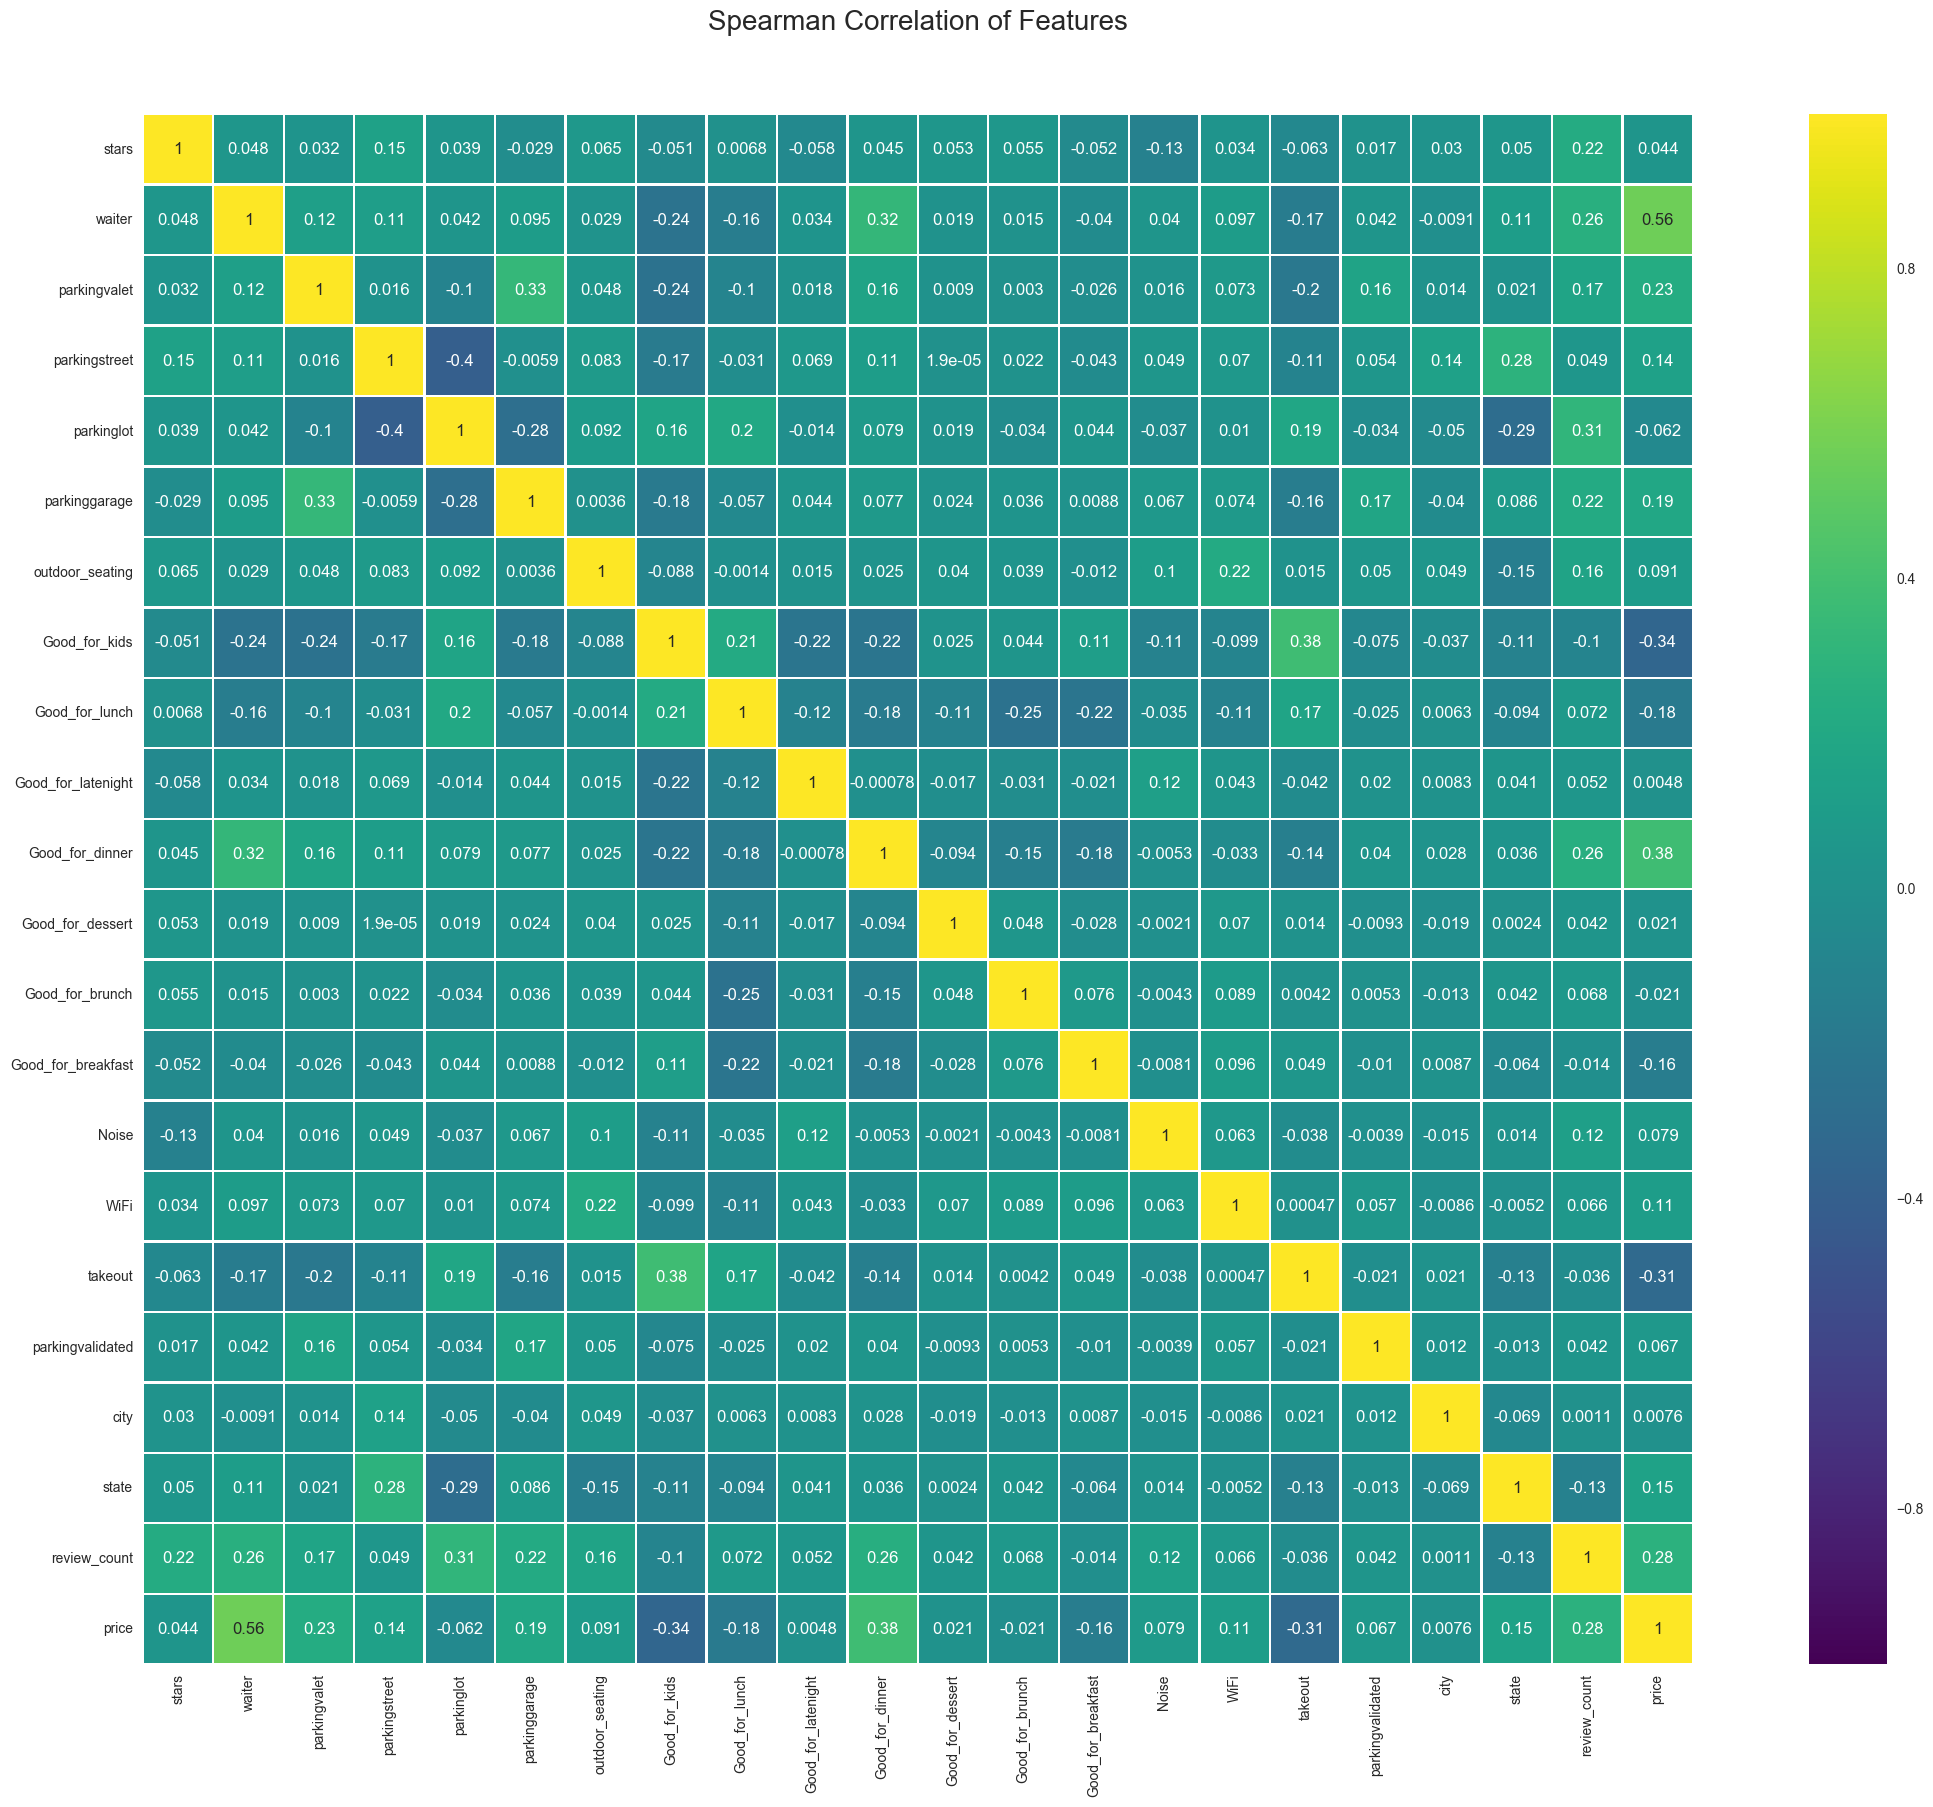

In [307]:
colormap = plt.cm.viridis
fig=plt.figure(figsize=(30,20))
plt.title('Spearman Correlation of Features', y=1.05, size=20)
sns.heatmap(final.corr(method="spearman"),linewidths=1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Besides 'Spearman correlation method', 'Kendall' is also another way to compute the nonlinear relationship between feature and dependent variable. In statistics, the Kendall rank correlation coefficient, commonly referred to as Kendall's tau coefficient is a statistic used to measure the ordinal association between two measured quantities. A tau test is a non-parametric hypothesis test for statistical dependence based on the tau coefficient.

It is a measure of rank correlation: the similarity of the orderings of the data when ranked by each of the quantities. It is named after Maurice Kendall, who developed it in 1938 though Gustav Fechner had proposed a similar measure in the context of time series in 1897.

Intuitively, the Kendall correlation between two variables will be high when observations have a similar (or identical for a correlation of 1) rank (i.e. relative position label of the observations within the variable: 1st, 2nd, 3rd, etc.) between the two variables, and low when observations have a dissimilar (or fully different for a correlation of -1) rank between the two variables. Its formula is shown below:

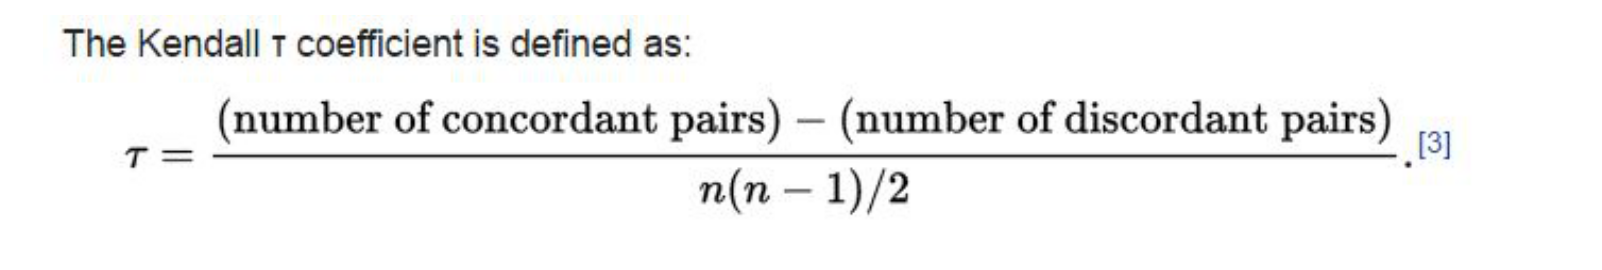

In [308]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(20,10))
lena = mpimg.imread('C:/Users/yifeichongtian/Desktop/DA final report/13.JPG')
plt.imshow(lena)
plt.axis('off')
plt.show()

Let (x1, y1), (x2, y2), …, (xn, yn) be a set of observations of the joint random variables X and Y respectively, such that all the values of x_{i} and y_{i} are unique. Any pair of observations {(x_{i},y_{i})} and {(x_{j},y_{j})} , where 'i' is unequal to 'j', are said to be concordant if the ranks for both elements agree: that is, if both x_{i}>x_{j}; or if both x_{i}<x_{j} and y_{i}<y_{j}. They are said to be discordant, if x_{i}>x_{j} and y_{i}<y_{j}; or if x_{i}<x_{j} and y_{i}>y_{j}. If x_{i}=x_{j} or y_{i}=y_{j}}, the pair is neither concordant nor discordant.

The denominator is the total number of pair combinations, so the coefficient must be in the range −1 ≤ τ ≤ 1.
> If the agreement between the two rankings is perfect (i.e., the two rankings are the same) the coefficient has value 1.
>
> If the disagreement between the two rankings is perfect (i.e., one ranking is the reverse of the other) the coefficient has value −1.
>
> If X and Y are independent, then we would expect the coefficient to be approximately zero.

The result of 'Kendall' is shown below and its summary is simialr to 'Spearman' above. 

In [309]:
final.corr(method='kendall')

stars    waiter  parkingvalet  parkingstreet  \
stars               1.000000  0.043187      0.029125       0.130947   
waiter              0.043187  1.000000      0.123105       0.110591   
parkingvalet        0.029125  0.123105      1.000000       0.016141   
parkingstreet       0.130947  0.110591      0.016141       1.000000   
parkinglot          0.035204  0.042366     -0.103100      -0.402486   
parkinggarage      -0.026033  0.094953      0.329509      -0.005944   
outdoor_seating     0.058287  0.029057      0.047782       0.083170   
Good_for_kids      -0.046262 -0.242048     -0.243433      -0.174670   
Good_for_lunch      0.006089 -0.161341     -0.100025      -0.030789   
Good_for_latenight -0.051938  0.033834      0.018055       0.068772   
Good_for_dinner     0.040258  0.320453      0.159131       0.107075   
Good_for_dessert    0.047471  0.018838      0.008984       0.000019   
Good_for_brunch     0.049350  0.015175      0.003012       0.022217   
Good_for_breakfast -0.046290 -0.040342     -0.025688      -0.043124   
Noise              -0.114781  0.038752      0.015449       0.046976   
WiFi                0.030393  0.096359      0.072451       0.069397   
takeout            -0.056380 -0.170120     -0.201663      -0.107142   
parkingvalidated    0.014915  0.042304      0.157094       0.053532   
city                0.022304 -0.007754      0.012139       0.117259   
state               0.040174  0.097756      0.019115       0.255911   
review_count        0.171207  0.211472      0.138855       0.040210   
price               0.039704  0.547432      0.222626       0.132362   

                    parkinglot  parkinggarage  outdoor_seating  Good_for_kids  \
stars                 0.035204      -0.026033         0.058287      -0.046262   
waiter                0.042366       0.094953         0.029057      -0.242048   
parkingvalet         -0.103100       0.329509         0.047782      -0.243433   
parkingstreet        -0.402486      -0.005944         0.083170      -0.174670   
parkinglot            1.000000      -0.277790         0.092433       0.164837   
parkinggarage        -0.277790       1.000000         0.003550      -0.182442   
outdoor_seating       0.092433       0.003550         1.000000      -0.088162   
Good_for_kids         0.164837      -0.182442        -0.088162       1.000000   
Good_for_lunch        0.200066      -0.056510        -0.001432       0.213109   
Good_for_latenight   -0.013548       0.044430         0.014975      -0.223792   
Good_for_dinner       0.078919       0.077046         0.025182      -0.218844   
Good_for_dessert      0.019403       0.023788         0.040473       0.025225   
Good_for_brunch      -0.034004       0.036096         0.039002       0.044018   
Good_for_breakfast    0.044320       0.008761        -0.012120       0.113609   
Noise                -0.035312       0.064660         0.101431      -0.110686   
WiFi                  0.010154       0.073806         0.216006      -0.098903   
takeout               0.186701      -0.160179         0.014993       0.375491   
parkingvalidated     -0.034038       0.174951         0.050424      -0.074548   
city                 -0.042042      -0.034364         0.041689      -0.031364   
state                -0.264178       0.077165        -0.139139      -0.098972   
review_count          0.250046       0.178834         0.131690      -0.081812   
price                -0.060490       0.185905         0.088305      -0.336356   

                    Good_for_lunch  Good_for_latenight    ...     \
stars                     0.006089           -0.051938    ...      
waiter                   -0.161341            0.033834    ...      
parkingvalet             -0.100025            0.018055    ...      
parkingstreet            -0.030789            0.068772    ...      
parkinglot                0.200066           -0.013548    ...      
parkinggarage            -0.056510            0.044430    ...      
outdoor_seating          -0.001432            0.0

According to set threshold (>0.1) for correlation of each pair of feature below, we find that only 'parkingstreet' and 'review count' have a higher correlation with dependent variable 'star rating'. The correlation level for 'parkingstreet' and 'review count' are '0.130947' and '0.171207' which are slightly lower than results from "speaman" above ('0.145772' and '0.224719').

In [68]:
abs(final.corr(method='kendall'))>0.1

stars waiter parkingvalet parkingstreet parkinglot  \
stars                True  False        False          True      False   
waiter              False   True         True          True      False   
parkingvalet        False   True         True         False       True   
parkingstreet        True   True        False          True       True   
parkinglot          False  False         True          True       True   
parkinggarage       False  False         True         False       True   
outdoor_seating     False  False        False         False      False   
Good_for_kids       False   True         True          True       True   
Good_for_lunch      False   True         True         False       True   
Good_for_latenight  False  False        False         False      False   
Good_for_dinner     False   True         True          True      False   
Good_for_dessert    False  False        False         False      False   
Good_for_brunch     False  False        False         False      False   
Good_for_breakfast  False  False        False         False      False   
Noise                True  False        False         False      False   
WiFi                False  False        False         False      False   
takeout             False   True         True          True       True   
parkingvalidated    False  False         True         False      False   
city                False  False        False          True      False   
state               False  False        False          True       True   
review_count         True   True         True         False       True   
price               False   True         True          True      False   

                   parkinggarage outdoor_seating Good_for_kids Good_for_lunch  \
stars                      False           False         False          False   
waiter                     False           False          True           True   
parkingvalet                True           False          True           True   
parkingstreet              False           False          True          False   
parkinglot                  True           False          True           True   
parkinggarage               True           False          True          False   
outdoor_seating            False            True         False          False   
Good_for_kids               True           False          True           True   
Good_for_lunch             False           False          True           True   
Good_for_latenight         False           False          True           True   
Good_for_dinner            False           False          True           True   
Good_for_dessert           False           False         False           True   
Good_for_brunch            False           False         False           True   
Good_for_breakfast         False           False          True           True   
Noise                      False            True          True          False   
WiFi                       False            True         False           True   
takeout                     True           False          True           True   
parkingvalidated            True           False         False          False   
city                       False           False         False          False   
state                      False            True         False          False   
review_count                True            True         False          False   
price                       True           False          True           True   

                   Good_for_latenight  ...   Good_for_brunch  \
stars                           False  ...             False   
waiter                          False  ...             False   
parkingvalet                    False  ...             False   
parkingstreet                   False  ...             False   
parkinglot                      False  ...             False   
parkinggarage                   False  ...             False   
outdo

Same to "Spearman" above, applying 'matplotlib' tool to visualize the result of 'Kendall correlation' above. The nonlinear correlation level between feature and 'star rating' tends to be higher if the color level in each box of any one pair of different features is close to 'Yellow'. In contrast, the nonlinear correlation level between feature and 'star rating' tends to be lower if the color level in each box of any one pair of different features is close to 'deep blue' 

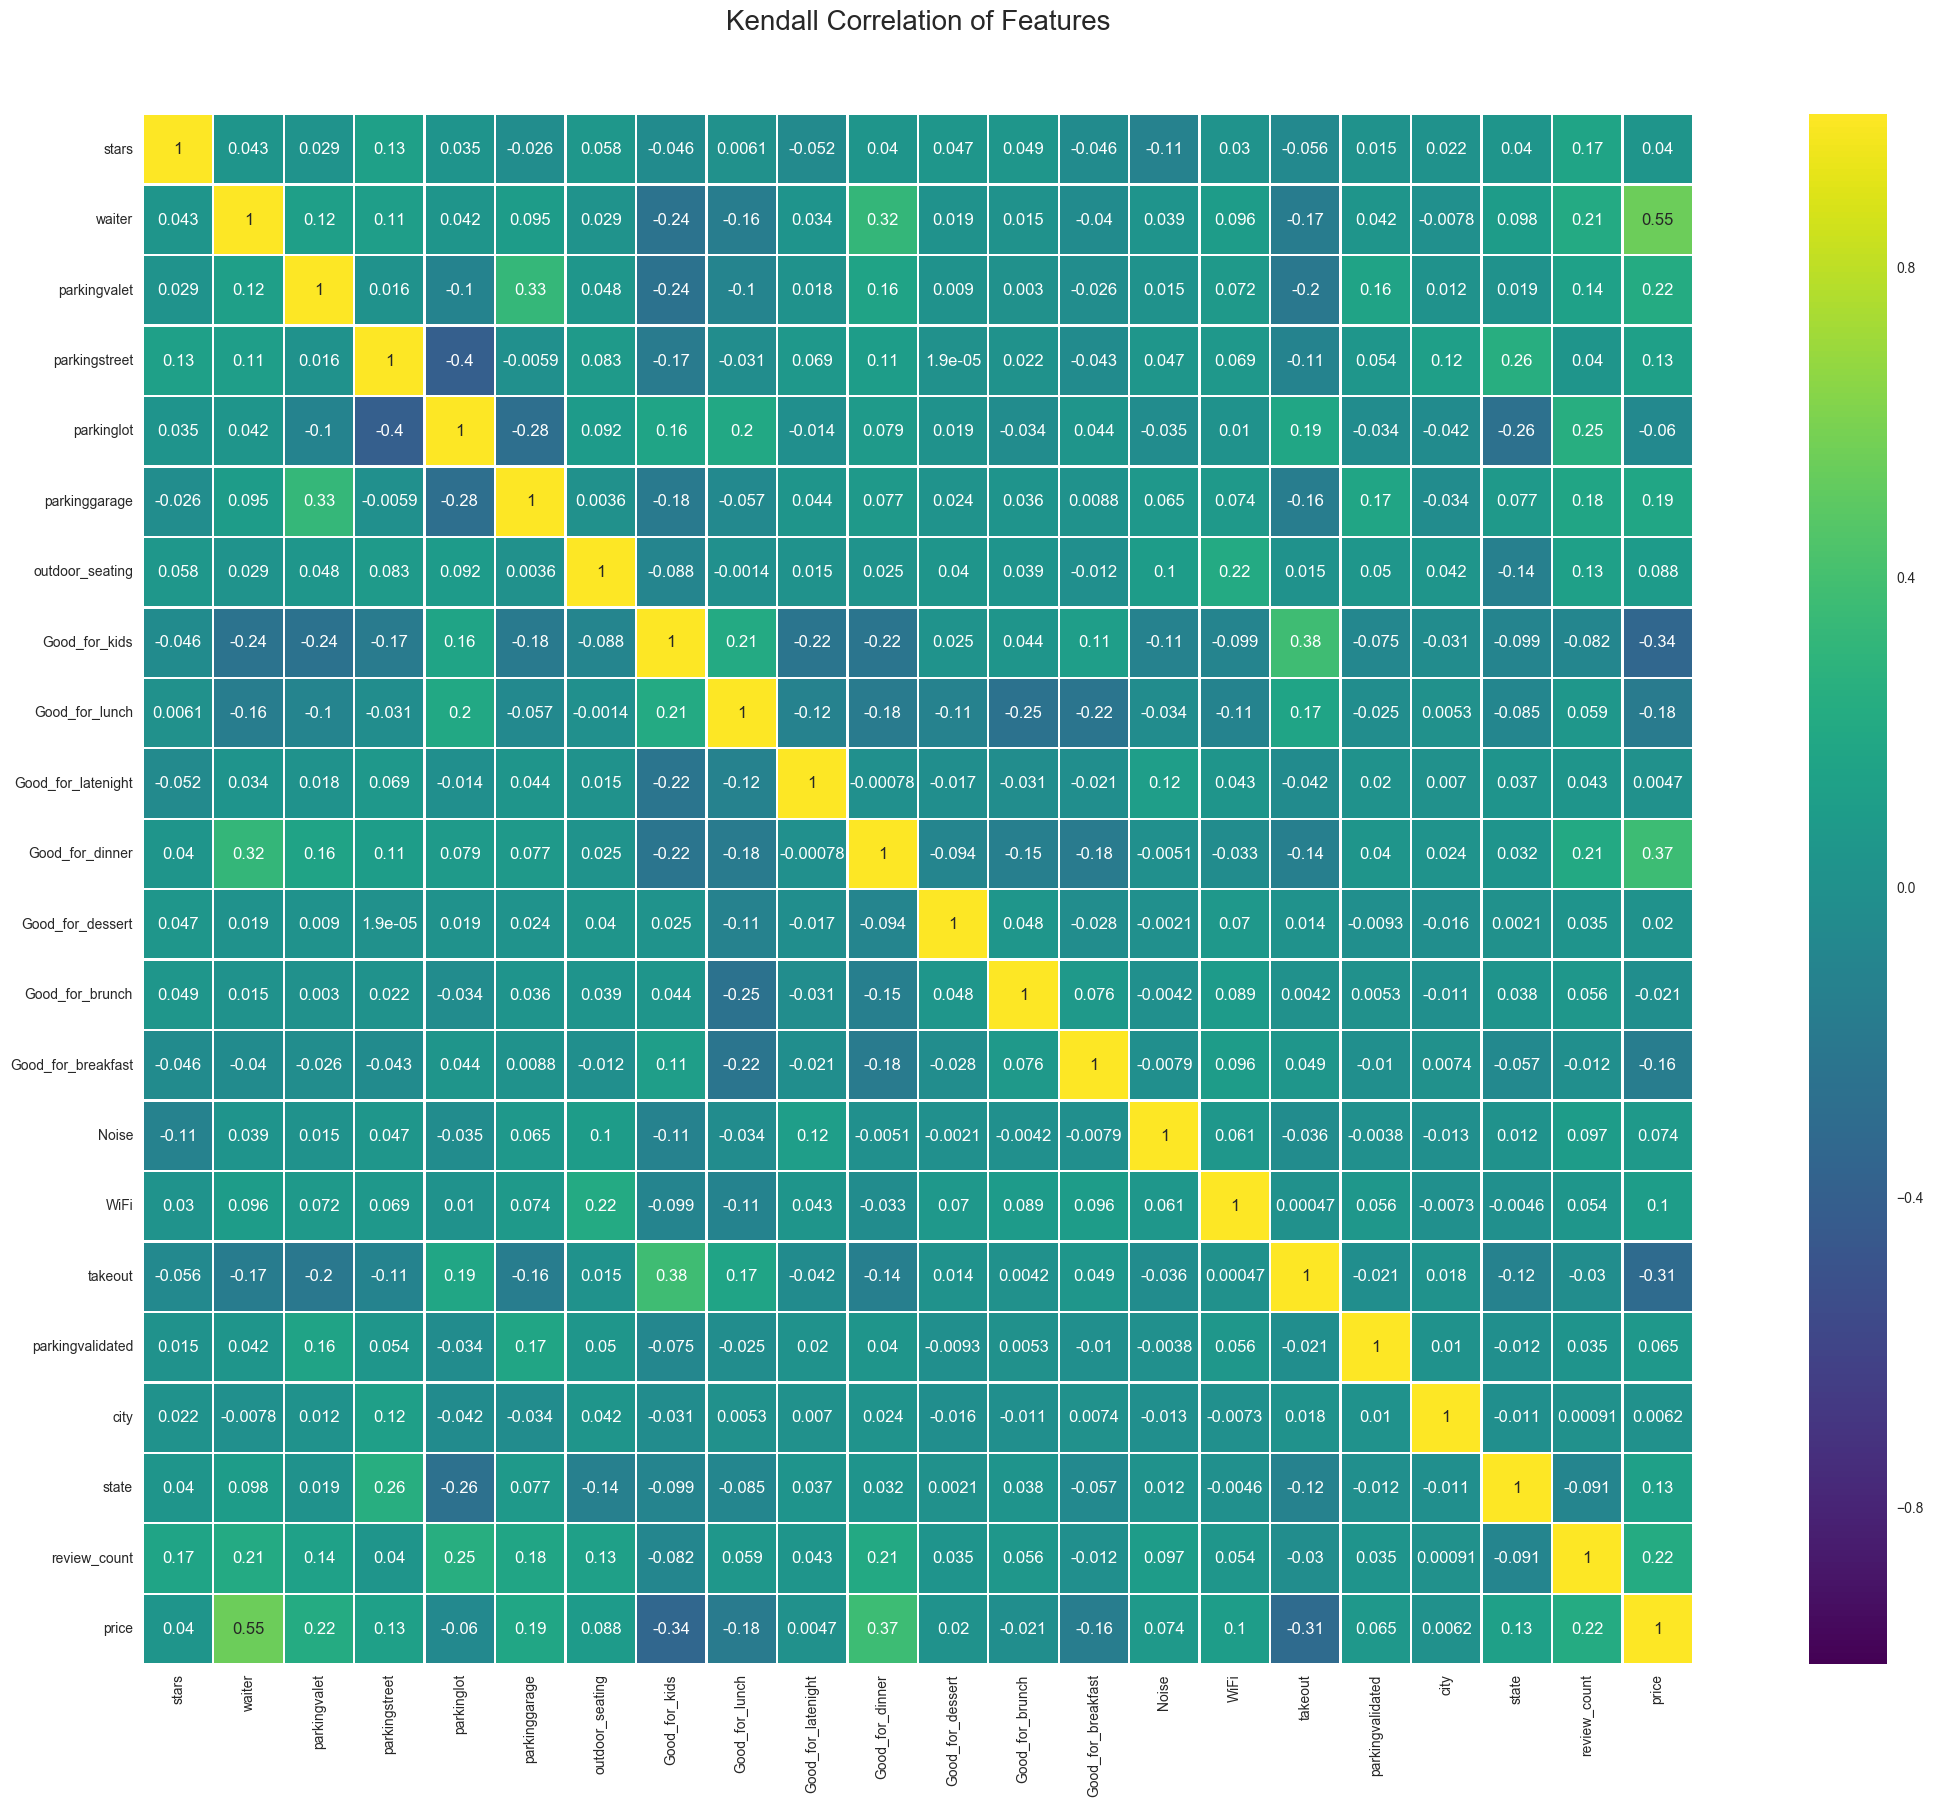

In [311]:
colormap = plt.cm.viridis
fig=plt.figure(figsize=(30,20))
plt.title('Kendall Correlation of Features', y=1.05, size=20)
sns.heatmap(final.corr(method="kendall"),linewidths=1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Besides above findings from the above 'Spearman' and 'Kendall' measurement, it also finds that the correlation for 'city' is very low with 'star rating'. For instance, in 'Spearman', its correlation ratio is 0.029627. In 'Kendall', its correlation ratio is also below 0.03 (0.022). In other words, the different city has a lower impact on the high/low star rating and the distribution of star rating of different city will tend to be similar. In order to confim this initial guess, i will plot the distribution for star rating in these three cities which shown below and then compute the statistical properties including mean, standard deviation, min, max, skewness and kurtosis for star rating in chosen three cities ('Edinburgh', 'Las vegas' and Montreal') and try to make a comparison.

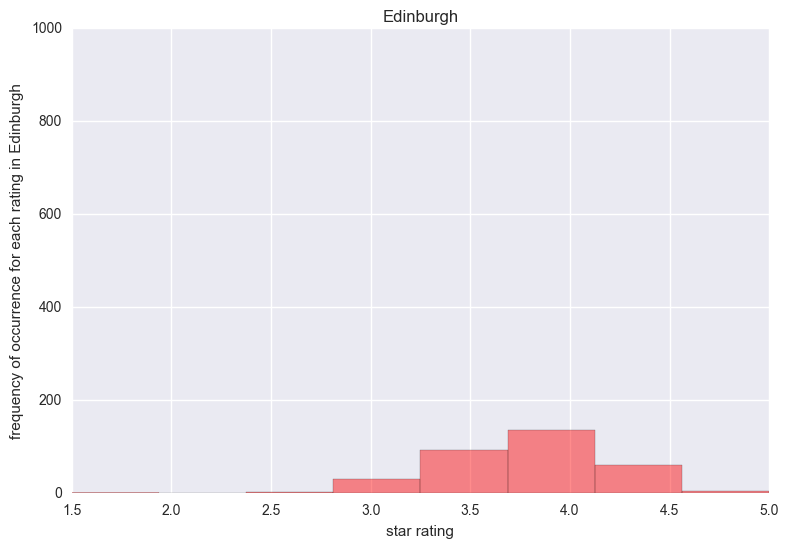

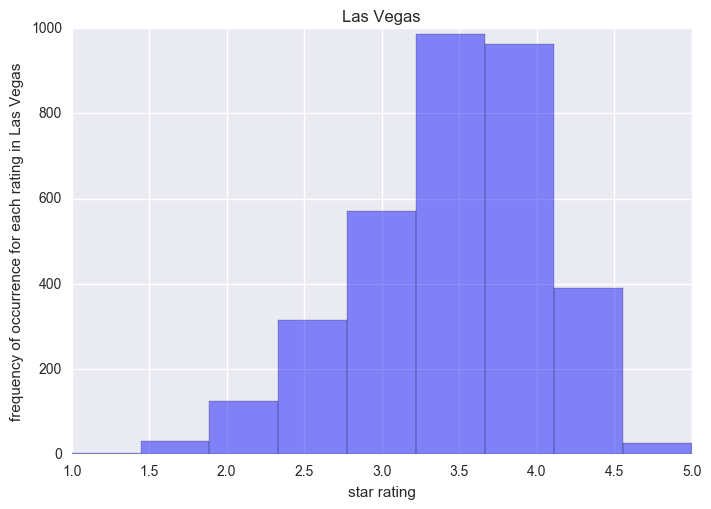

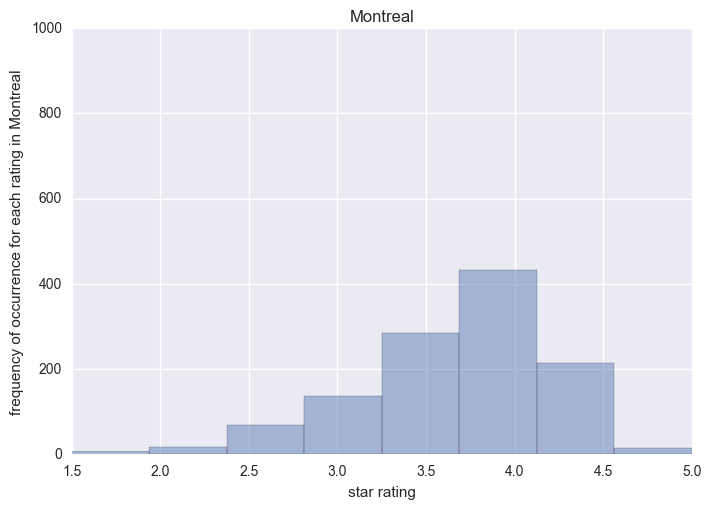

In [30]:
fig = plt.figure(figsize = (9,6))
df_Edinburgh = df[df.city == 'Edinburgh']
df_Edinburgh_stars = df_Edinburgh.stars
plt.hist(df_Edinburgh_stars, bins = len(df_Edinburgh.stars.value_counts()), color='r', alpha = 0.45)
plt.xlabel('star rating')
plt.ylabel('frequency of occurrence for each rating in Edinburgh')
plt.title('Edinburgh')
plt.ylim(0,1000)
plt.figure()

df_Las_Vegas = df[df.city == 'Las Vegas']
df_Las_stars = df_Las_Vegas.stars
plt.hist(df_Las_stars, bins = len(df_Las_Vegas.stars.value_counts()), color='blue', alpha = 0.45)
plt.xlabel('star rating')
plt.ylabel('frequency of occurrence for each rating in Las Vegas')
plt.title('Las Vegas')

plt.figure()

df_Montreal = df[df.city == 'Montr茅al']
df_Montreal_stars = df_Montreal.stars
plt.hist(df_Montreal_stars, bins = len(df_Montreal.stars.value_counts()), alpha = 0.45)
plt.xlabel('star rating')
plt.ylabel('frequency of occurrence for each rating in Montreal')
plt.ylim(0,1000)
plt.title('Montreal')


plt.show()

According to the above graph, although the Y-axis value for each distribution is different, but the fluctuation and shape for the distribution in each city is very similar. 

Afterwards, in order to compute the statistical values like mean, standard deviation, min and max more quickly, i apply 'df=df.describe()' to get the relevant value for 'star rating' in each city. In addition, i write a code program to compute the 'skewnss' and 'Kurtosis' individually. Afterwards, creating a DataFrame 'A' for "skewness' and 'Kurtosis'.  

The formula of 'skewness':

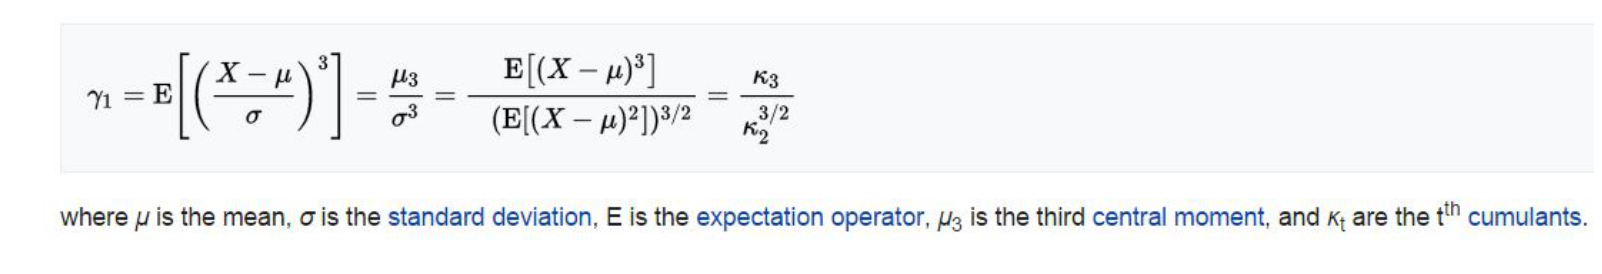

In [314]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(20,10))
lena = mpimg.imread('C:/Users/yifeichongtian/Desktop/DA final report/15.JPG')
plt.imshow(lena)
plt.axis('off')
plt.show()

The formula of 'Kurtosis':

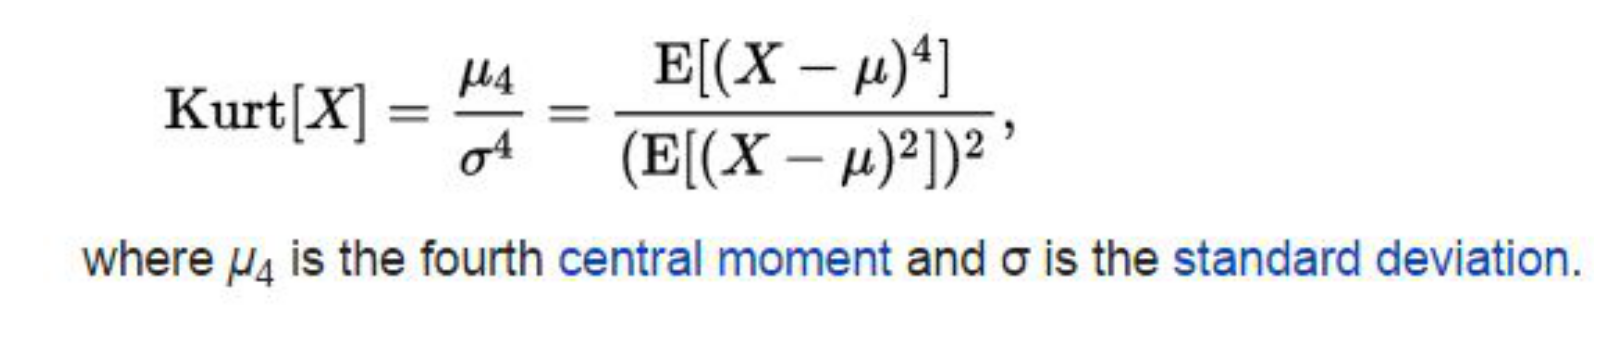

In [315]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(20,10))
lena = mpimg.imread('C:/Users/yifeichongtian/Desktop/DA final report/16.JPG')
plt.imshow(lena)
plt.axis('off')
plt.show()

In [313]:
Total=pd.concat([df_Montreal.stars.describe(), df_Las_Vegas.stars.describe(),df_Edinburgh.stars.describe()],axis=1)
Total.columns=['Montreal','Las Vegas', 'Edinburgh']
print(pd.DataFrame(Total))

def skewness(data):
    a=(data-data.mean())**3
    E3=a.mean()
    sigma3=data.std()**3
    return E3/sigma3

def kurtosis(data):
    a=(data-data.mean())**4
    E4=a.mean()
    sigma4=data.std()**4
    return E4/sigma4

skewness=[skewness(df_Montreal.stars), skewness(df_Las_Vegas.stars), skewness(df_Edinburgh.stars),-0.6787756195176361]
Kurtosis=[kurtosis(df_Montreal.stars), kurtosis(df_Las_Vegas.stars), kurtosis(df_Edinburgh.stars), 3.8377679646864777]

A = pd.DataFrame([skewness,Kurtosis],index=['skewness','Kurtosis'],columns=['Montreal',  'Las Vegas',  'Edinburgh','mean'])
A

          Montreal    Las Vegas   Edinburgh
count  1176.000000  3410.000000  332.000000
mean      3.734269     3.514370    3.840361
std       0.628209     0.679994    0.521557
min       1.500000     1.000000    1.500000
25%       3.500000     3.000000    3.500000
50%       4.000000     3.500000    4.000000
75%       4.000000     4.000000    4.000000
max       5.000000     5.000000    5.000000


Montreal  Las Vegas  Edinburgh      mean
skewness -0.768786  -0.545112  -0.722429 -0.678776
Kurtosis  3.561780   3.060209   4.891315  3.837768

Therefore, according to above computation of relevant statistic properties, it is easy to find that the largest difference of mean, standard deviation, min and max between these three cities are very small (mean : 0.1, std: 0.15, min:0.5, max:0). Besides, the value of skewness and Kurtosis in each city is also very close to their mean separately. In details, the Edinburgh has the highest Kurtosis value and Montreal has the lowest skewness value. So the graph of distribution for star raing in Edinbugh will have a highest peak compared to other two cities and the graph of distribution for star raing in Montreal will have the narrowest two-side, which can also be confirmed in the below graph.

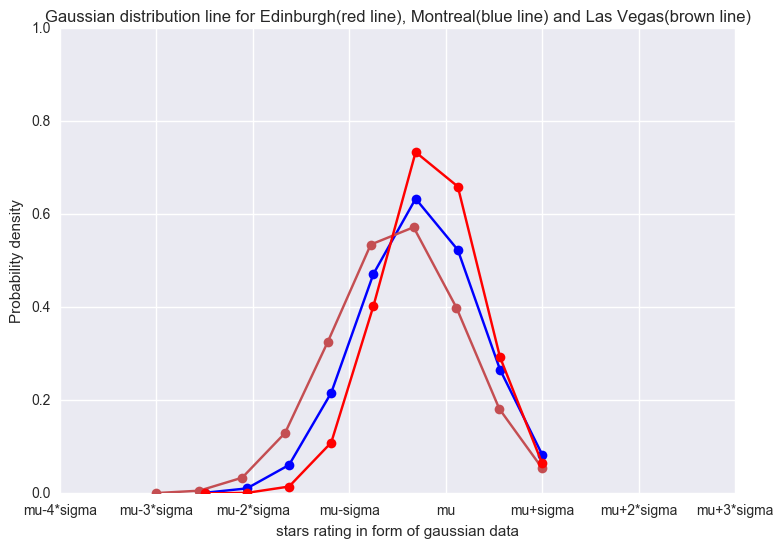

In [316]:
from scipy.stats import norm
from scipy import stats

fig=plt.figure(figsize=(9,6))

x_axis_points=(0,1,2,3,4,5,6,7)
x_axis_gaussian_data=('mu-4*sigma','mu-3*sigma', 'mu-2*sigma', 'mu-sigma', 'mu', 'mu+sigma', 'mu+2*sigma', 'mu+3*sigma')

# add a 'best fit' line for Montreal
x_Montreal=np.float64(df_Montreal.stars)
bins=len(df_Montreal.stars.value_counts())
n, bins, patches=plt.hist(x_Montreal, bins, normed=1, facecolor='red', alpha=0)
mu,std = norm.fit(x_Montreal)

y_Montreal = mlab.normpdf(bins, mu, std)   
plt.plot(bins,y_Montreal,'bo-')

# add a 'best fit' line for Las Vegas
x_Las_Vegas=np.float64(df_Las_Vegas.stars)
bins=len(df_Las_Vegas.stars.value_counts())
n, bins, patches=plt.hist(x_Las_Vegas, bins, normed=1, facecolor='blue', alpha=0)
mu,std = norm.fit(x_Las_Vegas)

y_Las_Vegas = mlab.normpdf(bins, mu, std)   
plt.plot(bins,y_Las_Vegas,'o-')

# add a 'best fit' line for Edinburgh
x_Edinburgh=np.float64(df_Edinburgh.stars)
bins=len(df_Edinburgh.stars.value_counts())
n, bins, patches=plt.hist(x_Edinburgh, bins, normed=1, facecolor='brown', alpha=0)
mu,std = norm.fit(x_Edinburgh)

y_Edinburgh = mlab.normpdf(bins, mu, std)    
plt.plot(bins, y_Edinburgh, 'ro-')   
plt.xlabel('stars rating in form of gaussian data')    
plt.ylabel('Probability density') 

plt.xticks(x_axis_points, x_axis_gaussian_data)
plt.title('Gaussian distribution line for Edinburgh(red line), Montreal(blue line) and Las Vegas(brown line)') 


# Tweak spacing to prevent clipping of ylabel    
plt.subplots_adjust(left=0.15)    
plt.show()  

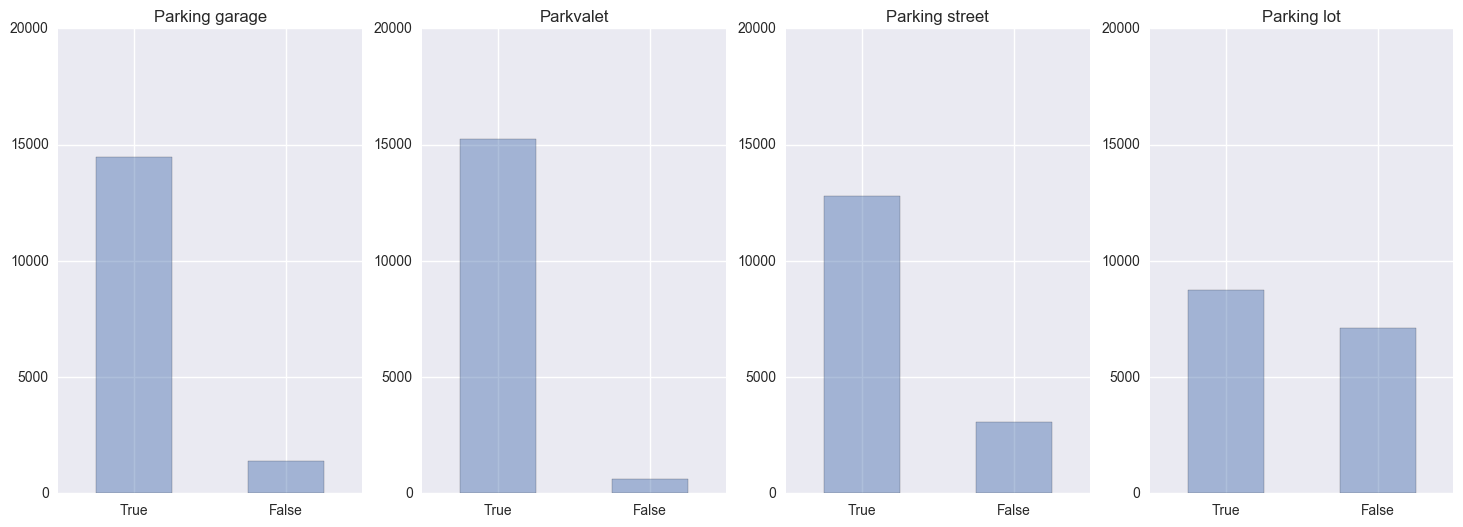

In [38]:
fig=plt.figure(figsize=(18,6),dpi=1600)
ax1=fig.add_subplot(141)
df['attributes.Parking.garage'].value_counts().plot(kind='bar', label='Parking garage', alpha=0.45)
labels=["True","False"]
ax1.set_xticklabels(labels,rotation=0)
ax1.set_ylim(0, 20000)
ax1.set_title("Parking garage")

ax2=fig.add_subplot(142)
df['attributes.Parking.valet'].value_counts().plot(kind='bar', label='Parking valet', alpha=0.45)
labels=["True","False"]
ax2.set_xticklabels(labels,rotation=0)
ax2.set_ylim(0, 20000)
ax2.set_title("Parkvalet")

ax3=fig.add_subplot(143)
df['attributes.Parking.street'].value_counts().plot(kind='bar', label='Parking street', alpha=0.45)
labels=["True","False"]
ax3.set_xticklabels(labels,rotation=0)
ax3.set_ylim(0, 20000)
ax3.set_title("Parking street")

ax4=fig.add_subplot(144)
df['attributes.Parking.lot'].value_counts().plot(kind='bar', label='Parking lot', alpha=0.45)
labels=["True","False"]
ax4.set_xticklabels(labels,rotation=0)
ax4.set_ylim(0, 20000)
ax4.set_title("Parking lot")



As we see above, most restaurants have a bigger difference between 'True' and 'False" in 'Parking garage','Parking Valet' and 'Parking street' but not for 'Parking lot'. In other words, most restaurants have service of 'Parking garage','Parking Valet' and 'Parking street'. In contrast, around half of restaurant don't have a service of 'Parking lot'.

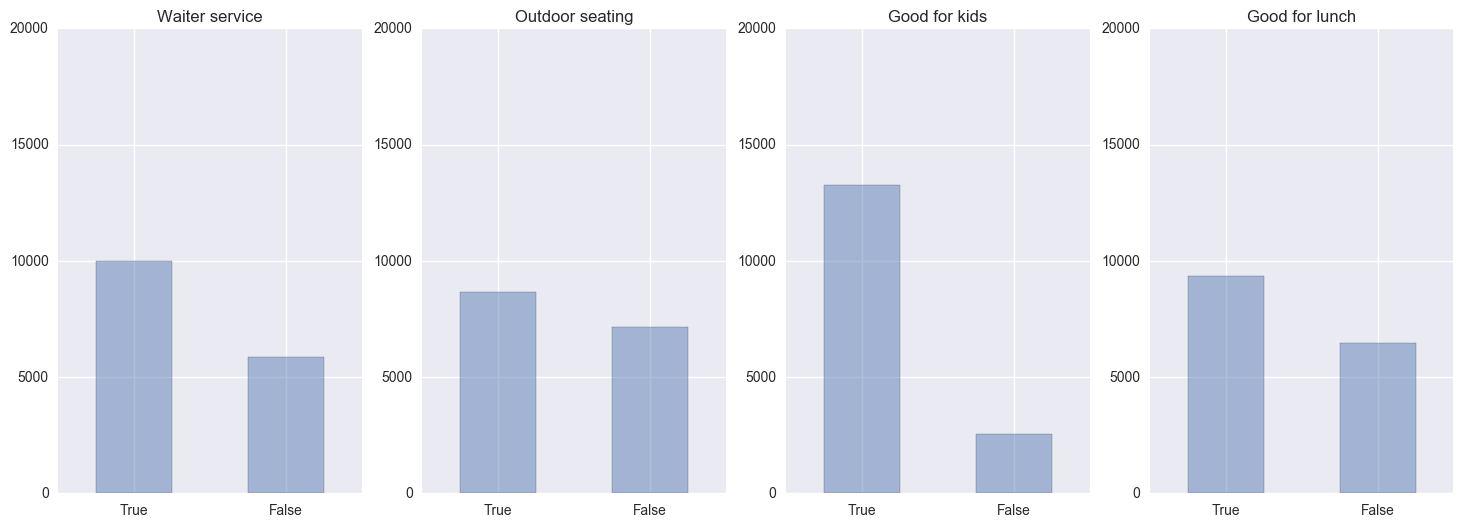

In [39]:
fig=plt.figure(figsize=(18,6),dpi=1600)
ax1=fig.add_subplot(141)

df['attributes.Waiter Service'].value_counts().plot(kind='bar', label='Waiter service', alpha=0.45)
labels=["True","False"]
ax1.set_xticklabels(labels,rotation=0)
ax1.set_ylim(0, 20000)
ax1.set_title("Waiter service")

ax2=fig.add_subplot(142)
df['attributes.Outdoor Seating'].value_counts().plot(kind='bar', label='Outdoor seating', alpha=0.45)
labels=["True","False"]
ax2.set_xticklabels(labels,rotation=0)
ax2.set_ylim(0, 20000)
ax2.set_title("Outdoor seating")

ax3=fig.add_subplot(143)
df['attributes.Good for Kids'].value_counts().plot(kind='bar', label='Good for kids', alpha=0.45)
labels=["True","False"]
ax3.set_xticklabels(labels,rotation=0)
ax3.set_ylim(0, 20000)
ax3.set_title("Good for kids")

ax4=fig.add_subplot(144)
df['attributes.Good For.lunch'].value_counts().plot(kind='bar', label='Good for lunch', alpha=0.45)
labels=["True","False"]
ax4.set_xticklabels(labels,rotation=0)
ax4.set_ylim(0, 20000)
ax4.set_title("Good for lunch")

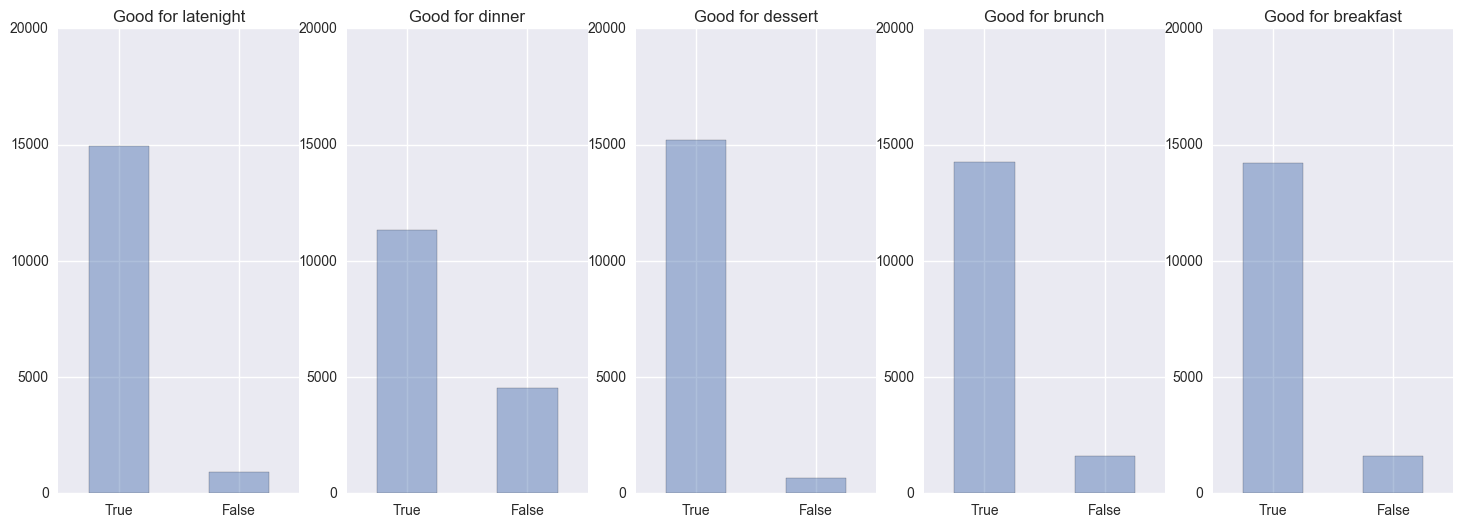

In [40]:
fig=plt.figure(figsize=(18,6),dpi=1600)
ax1=fig.add_subplot(151)
df['attributes.Good For.latenight'].value_counts().plot(kind='bar', label='Good for latenight', alpha=0.45)
labels=["True","False"]
ax1.set_xticklabels(labels,rotation=0)
ax1.set_ylim(0, 20000)
ax1.set_title("Good for latenight")

ax2=fig.add_subplot(152)
df['attributes.Good For.dinner'].value_counts().plot(kind='bar', label='Good for dinner', alpha=0.45)
labels=["True","False"]
ax2.set_xticklabels(labels,rotation=0)
ax2.set_ylim(0, 20000)
ax2.set_title("Good for dinner")

ax3=fig.add_subplot(153)
df['attributes.Good For.dessert'].value_counts().plot(kind='bar', label='Good for dessert', alpha=0.45)
labels=["True","False"]
ax3.set_xticklabels(labels,rotation=0)
ax3.set_ylim(0, 20000)
ax3.set_title("Good for dessert")

ax4=fig.add_subplot(154)
df['attributes.Good For.brunch'].value_counts().plot(kind='bar', label='Good for brunch', alpha=0.45)
labels=["True","False"]
ax4.set_xticklabels(labels,rotation=0)
ax4.set_ylim(0, 20000)
ax4.set_title("Good for brunch")

ax5=fig.add_subplot(155)
df['attributes.Good For.breakfast'].value_counts().plot(kind='bar', label='Good for breakfast', alpha=0.45)
labels=["True","False"]
ax5.set_xticklabels(labels,rotation=0)
ax5.set_ylim(0, 20000)
ax5.set_title("Good for breakfast")

According to above graph, among the type of Good the restaurant offered, only 'Good for dinner' and 'Good for lunch' have a fewer difference between "True" and "False" compared to other Goods. Therefore, the fewer number of restaurant offer "Dinner" and "Lunch" compared to other goods.

In addition to 'Spearman' and 'Kendall' method above, Random forest and Logistic regression will also be useful to analyse the importance of each feature to dependent variable (star rating). Firstly, i will apply random forest and logistic regression on the whole dataset without deleting the city for purpose of comparing the results with 'Spearman and Kendall' correlation coefficient. 

### Part 1 Algorithmic analysis for whole dataset

The first step for random forest is set value for independent variable (x) and dependent variable (y). 'Star rating' is dependent variable and others are independent feature. 

In [317]:
features=final.drop(['stars'],axis=1).columns
x=final[features]
y=df.stars

For random forest analysis, it is better to analyse if we set 'y' as a binary feature.

In [318]:
y=y>3
print (y.value_counts())

True     11290
False     4559
Name: stars, dtype: int64


Initialize the random forest model, fit the model and finally train the model.

In [319]:
rf_model=RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)
rf_model=rf_model.fit(x,y)
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

### Parameters of random forest classifier:	

1. n_estimators : integer, optional (default=10)
The number of trees in the forest.
2. criterion : string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
3. max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:
If int, then consider max_features features at each split.
If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
4. max_depth : integer or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than  min_samples_split samples.
5. min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
Changed in version 0.18: Added float values for percentages.
6. min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
Changed in version 0.18: Added float values for percentages.
7. min_weight_fraction_leaf : float, optional (default=0.)
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
8. max_leaf_nodes : int or None, optional (default=None)
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
9. min_impurity_split : float, optional (default=1e-7)
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
New in version 0.18.
10. bootstrap : boolean, optional (default=True)
Whether bootstrap samples are used when building trees.
11. oob_score : bool (default=False)
Whether to use out-of-bag samples to estimate the generalization accuracy.
12. n_jobs : integer, optional (default=1)
The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.
13. random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
14. verbose : int, optional (default=0)
Controls the verbosity of the tree building process.
15. warm_start : bool, optional (default=False)
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
16. class_weight : dict, list of dicts, “balanced”,
“balanced_subsample” or None, optional (default=None) Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.
For multi-output, the weights of each column of y will be multiplied.
Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

### Attributes:	
1. estimators_ : list of DecisionTreeClassifier
The collection of fitted sub-estimators.
2. classes_ : array of shape = [n_classes] or a list of such arrays
The classes labels (single output problem), or a list of arrays of class labels (multi-output problem).
3. n_classes_ : int or list
The number of classes (single output problem), or a list containing the number of classes for each output (multi-output problem).
4. n_features_ : int
The number of features when fit is performed.
5. n_outputs_ : int
The number of outputs when fit is performed.
6. feature_importances_ : array of shape = [n_features]
The feature importances (the higher, the more important the feature).
7. oob_score_ : float
Score of the training dataset obtained using an out-of-bag estimate.
8. oob_decision_function_ : array of shape = [n_samples, n_classes]
Decision function computed with out-of-bag estimate on the training set. If n_estimators is small it might be possible that a data point was never left out during the bootstrap. In this case, oob_decision_function_ might contain NaN.

After train the model, we get the accuracy of model on the out of bag, the accuracy is 0.7 which is a good score because if if the accuracy is too high, there will be a problem of overfitting. 

In [58]:
rf_model.oob_score_

0.7057227585336614

Printing the importance value of each feature to 'star raing'out, at the same time, set a threshold (importance > 0.1) to get the features for logistic regssion analysis.

In [59]:
logistic_feature=[]
plot_features=[]
for features,importance in zip(features, rf_model.feature_importances_):
    if importance>0.1:
        logistic_feature.append(features)
    if abs(importance)>0:
        plot_features.append(features)
    print (features, ":", importance)

waiter : 0.0226590229955
parkingvalet : 0.00558340167678
parkingstreet : 0.0209497259901
parkinglot : 0.0230161832467
parkinggarage : 0.011373073646
outdoor_seating : 0.0255440487443
Good_for_kids : 0.016617472662
Good_for_lunch : 0.0243747654801
Good_for_latenight : 0.0116437465644
Good_for_dinner : 0.0184898967315
Good_for_dessert : 0.00878438896677
Good_for_brunch : 0.013400204521
Good_for_breakfast : 0.0137559746057
Noise : 0.061602134106
WiFi : 0.0366275614832
takeout : 0.0104608415233
parkingvalidated : 0.00171794377512
city : 0.148593280036
state : 0.0679955986621
review_count : 0.420583555447
price : 0.036227179136


Plotting a bar chart for each feature importance and sort them in a True ascending

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


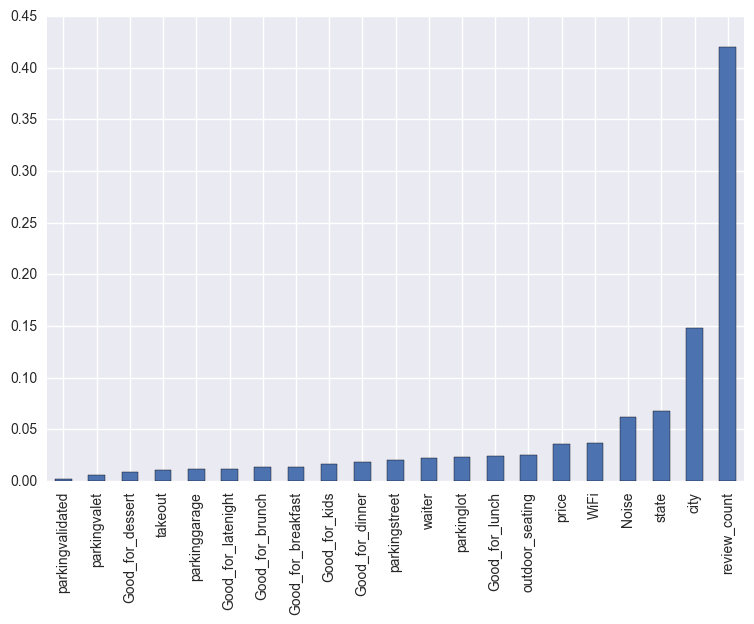

In [60]:
feature_importance=pd.DataFrame(rf_model.feature_importances_)
feature_importance.columns=['feature_importance']

plot_features=pd.DataFrame(plot_features)
plot_features.columns=['features']
pltt=pd.concat([feature_importance, plot_features],axis=1)
pltt=pltt.sort(["feature_importance"], ascending=True)

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(111)
label=['parkingvalidated', 'parkingvalet', 'Good_for_dessert', 'takeout', 'parkinggarage', 'Good_for_latenight',
       'Good_for_brunch', 'Good_for_breakfast', 'Good_for_kids', 'Good_for_dinner', 'parkingstreet', 'waiter',  
       'parkinglot', 'Good_for_lunch','outdoor_seating', 'price', 'WiFi', 'Noise', 'state','city', 'review_count']

pltt['feature_importance'].plot(kind='bar')
ax1.set_xticklabels(label,rotation=90)


According to the above graph, 'review_count' has the highest importance (0.42) over all independent variables which match with the result from the "Spearman" and "Kendall". Besides, 'city' is the second most important feature to 'star rating' with only 0.148. Other remaining features all have a slight importance on 'star rating' because their importance values are all below 0.1.

Afterwards, getting the logistic features for Logistic regression analysis

In [61]:
logistic_feature

['city', 'review_count']

As same as Random forest classifier, set the value for the independent variable (x) except for 'star' feature and dependent variable (y : star rating). 

In [63]:
final['intercept']=1
feature=['city','review_count','intercept']
X=final[feature]
y.value_counts()

True     11290
False     4559
Name: stars, dtype: int64

Fit and train the logistic regression model, then get the result summary of logistic regression. As a result, the odds ratio of each feature is over '1'. The odds ratio of city equals to 1.000666 and review_count's odds ratio is 1.005872. Therefore, based on the rule of odds ratio, if it is over '1', there is positive relationship between feature and dependent variable. So more review_counts means higher star rating. 

In [64]:
logit=sm.Logit(y,X)
result=logit.fit()
print(result.summary())
print (np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.573167
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  stars   No. Observations:                15849
Model:                          Logit   Df Residuals:                    15846
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 Mar 2017   Pseudo R-squ.:                 0.04478
Time:                        10:51:49   Log-Likelihood:                -9084.1
converged:                       True   LL-Null:                       -9510.0
                                        LLR p-value:                1.133e-185
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
city             0.0007      0.000      1.669      0.095        -0.000     0.001
review_count     0.0059

Secondly, applying random forest model to compute the feature importance in only one city separately and make a result comparison between city 'Las Vegas', 'Montreal' and 'Edinburgh'.  

## Part 2 Algoirthmic analysis for Las Vegas

The first step is to find the number of Las Vegas in dataset because the name of city has been transformed to numerical value. So the city "Las vegas" has the most frequency over all cities, so the numerical value of 'Las vegas' is '87'.

In [324]:
final.city.value_counts()

87     3410
136    2025
29     1231
115    1176
139     938
161     851
106     635
179     561
97      532
71      466
28      459
63      348
47      332
62      283
134     181
127     161
27      134
177     117
190     107
66       98
99       87
6        87
79       86
81       81
90       68
142      66
56       59
185      58
24       52
31       51
       ... 
68        1
60        1
123       1
44        1
155       1
163       1
12        1
162       1
204       1
38        1
101       1
189       1
165       1
157       1
4         1
10        1
125       1
26        1
117       1
50        1
130       1
58        1
93        1
77        1
82        1
45        1
37        1
114       1
5         1
195       1
Name: city, dtype: int64

Get the head of feature information in city 'Las vegas' only. The filename is 'Las'.

In [97]:
# 通过对比，'87'就是‘Las Vegas’
Las=final[final.city==87]
Las.head()

stars  waiter  parkingvalet  parkingstreet  parkinglot  parkinggarage  \
2392    3.5       1             0              0           1              0   
2409    3.0       0             0              0           0              1   
2478    3.0       1             0              0           1              0   
2479    3.5       1             0              0           1              0   
2480    3.5       1             0              0           1              0   

      outdoor_seating  Good_for_kids  Good_for_lunch  Good_for_latenight  \
2392                0              1               1                   0   
2409                0              1               1                   1   
2478                0              1               1                   0   
2479                0              1               0                   1   
2480                0              1               1                   0   

      ...    Good_for_brunch  Good_for_breakfast  Noise  WiFi  takeout  \
2392  ...                  0                   0      1     0        1   
2409  ...                  0                   0      1     0        1   
2478  ...                  0                   0      1     0        1   
2479  ...                  0                   0      1     0        1   
2480  ...                  0                   0      3     0        1   

      parkingvalidated  city  state  review_count  price  
2392                 0    87      7          26.0      0  
2409                 0    87      7          12.0      1  
2478                 0    87      7         206.0      0  
2479                 0    87      7        2142.0      1  
2480                 0    87      7          68.0      1  

[5 rows x 22 columns]

Below is the result of 'Spearman' method on feature in city 'Las vegas'. It finds that 'attributes.Good For.dessert','attributes.Parking.lot', 'attributes.Waiter Service' and 'review_count' are relatively higher correlated with 'star rating' by setting a threshold (correlation coefficient > 0.1).

In [73]:
Las.corr(method='spearman')

stars    waiter  parkingvalet  parkingstreet  \
stars               1.000000  0.145911      0.041750       0.090151   
waiter              0.145911  1.000000      0.176324      -0.007138   
parkingvalet        0.041750  0.176324      1.000000       0.045547   
parkingstreet       0.090151 -0.007138      0.045547       1.000000   
parkinglot          0.184678  0.053702     -0.226213      -0.108623   
parkinggarage      -0.059142  0.203755      0.419056      -0.015783   
outdoor_seating     0.096888 -0.069059      0.041191       0.130991   
Good_for_kids      -0.066012 -0.294090     -0.324505      -0.002971   
Good_for_lunch      0.002448 -0.156015     -0.120100      -0.018612   
Good_for_latenight -0.051680  0.043002     -0.003450       0.035248   
Good_for_dinner     0.071246  0.341553      0.270640      -0.030024   
Good_for_dessert    0.110930  0.040184     -0.011506       0.038260   
Good_for_brunch     0.049918  0.019943     -0.040154       0.074289   
Good_for_breakfast -0.113465 -0.022171     -0.035635      -0.012757   
Noise              -0.121980 -0.020194      0.037693      -0.005144   
WiFi                0.097386  0.148178      0.063534       0.084460   
takeout            -0.049109 -0.208759     -0.316918       0.037856   
parkingvalidated    0.025403  0.025143      0.098789       0.059013   
city                     NaN       NaN           NaN            NaN   
state               0.016874 -0.013712      0.005012      -0.075954   
review_count        0.302242  0.383934      0.208287       0.033990   
price               0.098416  0.546995      0.338451       0.023995   

                    parkinglot  parkinggarage  outdoor_seating  Good_for_kids  \
stars                 0.184678      -0.059142         0.096888      -0.066012   
waiter                0.053702       0.203755        -0.069059      -0.294090   
parkingvalet         -0.226213       0.419056         0.041191      -0.324505   
parkingstreet        -0.108623      -0.015783         0.130991      -0.002971   
parkinglot            1.000000      -0.540884         0.060167       0.163472   
parkinggarage        -0.540884       1.000000        -0.004915      -0.284330   
outdoor_seating       0.060167      -0.004915         1.000000      -0.012807   
Good_for_kids         0.163472      -0.284330        -0.012807       1.000000   
Good_for_lunch        0.225324      -0.102334         0.029913       0.228523   
Good_for_latenight    0.032810       0.015848         0.008038      -0.225188   
Good_for_dinner       0.018271       0.202137        -0.010128      -0.295900   
Good_for_dessert      0.042609      -0.016747         0.045903       0.065551   
Good_for_brunch      -0.057826       0.003379         0.047798       0.099567   
Good_for_breakfast   -0.003388       0.029328        -0.010907       0.083815   
Noise                -0.095501       0.137205         0.054172      -0.090065   
WiFi                  0.020195       0.047816         0.164672      -0.098836   
takeout               0.223927      -0.354656         0.055072       0.418736   
parkingvalidated     -0.021334       0.089378         0.035918      -0.076722   
city                       NaN            NaN              NaN            NaN   
state                 0.020485       0.009009         0.010651      -0.007608   
review_count          0.129675       0.327269         0.126645      -0.161109   
price                -0.129226       0.391064         0.014703      -0.429455   

                    Good_for_lunch  Good_for_latenight    ...     \
stars                     0.002448           -0.051680    ...      
waiter                   -0.156015            0.043002    ...      
parkingvalet             -0.120100           -0.003450    ...      
parkingstreet            -0.018612            0.035248    ...      
parkinglot                0.225324            0.032810    ...      
parkinggarage            -0.102334            0.015848    ...      
outdoor_seating           0.029913            0.0

Compared to 'spearman', 'Kendall' method gets a slightly different result with 'spearman'. There are only the correlation coefficient of 'attributes.Parking.lot', 'attributes.Waiter Service' and 'review_count' are over 0.1

In [74]:
Las.corr(method='kendall')

stars    waiter  parkingvalet  parkingstreet  \
stars               1.000000  0.130745      0.037411       0.080781   
waiter              0.130745  1.000000      0.176324      -0.007138   
parkingvalet        0.037411  0.176324      1.000000       0.045547   
parkingstreet       0.080781 -0.007138      0.045547       1.000000   
parkinglot          0.165482  0.053702     -0.226213      -0.108623   
parkinggarage      -0.052995  0.203755      0.419056      -0.015783   
outdoor_seating     0.086817 -0.069059      0.041191       0.130991   
Good_for_kids      -0.059151 -0.294090     -0.324505      -0.002971   
Good_for_lunch      0.002193 -0.156015     -0.120100      -0.018612   
Good_for_latenight -0.046309  0.043002     -0.003450       0.035248   
Good_for_dinner     0.063841  0.341553      0.270640      -0.030024   
Good_for_dessert    0.099400  0.040184     -0.011506       0.038260   
Good_for_brunch     0.044729  0.019943     -0.040154       0.074289   
Good_for_breakfast -0.101671 -0.022171     -0.035635      -0.012757   
Noise              -0.107174 -0.019623      0.036627      -0.004998   
WiFi                0.086817  0.147368      0.063187       0.083999   
takeout            -0.044004 -0.208759     -0.316918       0.037856   
parkingvalidated    0.022762  0.025143      0.098789       0.059013   
city                     NaN       NaN           NaN            NaN   
state               0.015120 -0.013712      0.005012      -0.075954   
review_count        0.227077  0.314203      0.170458       0.027817   
price               0.086686  0.529768      0.327792       0.023239   

                    parkinglot  parkinggarage  outdoor_seating  Good_for_kids  \
stars                 0.165482      -0.052995         0.086817      -0.059151   
waiter                0.053702       0.203755        -0.069059      -0.294090   
parkingvalet         -0.226213       0.419056         0.041191      -0.324505   
parkingstreet        -0.108623      -0.015783         0.130991      -0.002971   
parkinglot            1.000000      -0.540884         0.060167       0.163472   
parkinggarage        -0.540884       1.000000        -0.004915      -0.284330   
outdoor_seating       0.060167      -0.004915         1.000000      -0.012807   
Good_for_kids         0.163472      -0.284330        -0.012807       1.000000   
Good_for_lunch        0.225324      -0.102334         0.029913       0.228523   
Good_for_latenight    0.032810       0.015848         0.008038      -0.225188   
Good_for_dinner       0.018271       0.202137        -0.010128      -0.295900   
Good_for_dessert      0.042609      -0.016747         0.045903       0.065551   
Good_for_brunch      -0.057826       0.003379         0.047798       0.099567   
Good_for_breakfast   -0.003388       0.029328        -0.010907       0.083815   
Noise                -0.092802       0.133327         0.052641      -0.087519   
WiFi                  0.020084       0.047554         0.163773      -0.098296   
takeout               0.223927      -0.354656         0.055072       0.418736   
parkingvalidated     -0.021334       0.089378         0.035918      -0.076722   
city                       NaN            NaN              NaN            NaN   
state                 0.020485       0.009009         0.010651      -0.007608   
review_count          0.106123       0.267830         0.103644      -0.131848   
price                -0.125156       0.378747         0.014240      -0.415929   

                    Good_for_lunch  Good_for_latenight    ...     \
stars                     0.002193           -0.046309    ...      
waiter                   -0.156015            0.043002    ...      
parkingvalet             -0.120100           -0.003450    ...      
parkingstreet            -0.018612            0.035248    ...      
parkinglot                0.225324            0.032810    ...      
parkinggarage            -0.102334            0.015848    ...      
outdoor_seating           0.029913            0.0

Set the value for dependent variable (y:star rating) and independent variable(x) with no 'stars' and 'intercept'. Afterwards, initialize, fit and train the random forest model.

In [98]:
# Initialize the Random forest classifier
features=Las.drop(['stars'],axis=1).columns
X_Las=Las[features]
y=final[final.city==87].stars
y=y>3
rf_model=RandomForestClassifier(n_estimators=1000, oob_score=True, max_features=2)
rf_model=rf_model.fit(X_Las,y)
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

The accuracy of random forest model on out of bag is 0.69 which is a good score and has no problem of over fitting on the train dataset.

In [99]:
print(rf_model.oob_score_)

0.692082111437


Printing out each feature importance in Las vegas city and set a threshold (importance>0.1) to get the most importance feature.

In [100]:
Las_logistic_feature=[]
Las_plot_features=[]
for features,importance in zip(features, rf_model.feature_importances_):
    if importance>0.1:
        Las_logistic_feature.append(features)
    if abs(importance)>=0:
        Las_plot_features.append(features)
    print (features,":",importance)

waiter : 0.033612068874
parkingvalet : 0.01102348873
parkingstreet : 0.011694447328
parkinglot : 0.0390755517734
parkinggarage : 0.0218594786919
outdoor_seating : 0.0319265780056
Good_for_kids : 0.0205166651941
Good_for_lunch : 0.0301490402376
Good_for_latenight : 0.0184551004789
Good_for_dinner : 0.0220529389207
Good_for_dessert : 0.0132270412707
Good_for_brunch : 0.0215297256978
Good_for_breakfast : 0.0228001605286
Noise : 0.0668282315796
WiFi : 0.0423250466722
takeout : 0.0159383985447
parkingvalidated : 0.00160672878558
city : 0.0
state : 0.000396534181017
review_count : 0.531651016625
price : 0.0433317578805


As a result, only 'review_count' get a 0.53 importance level and others are all below 0.1.

Plotting out the bar chart for the importance of each feature in city 'Las vegas'.

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


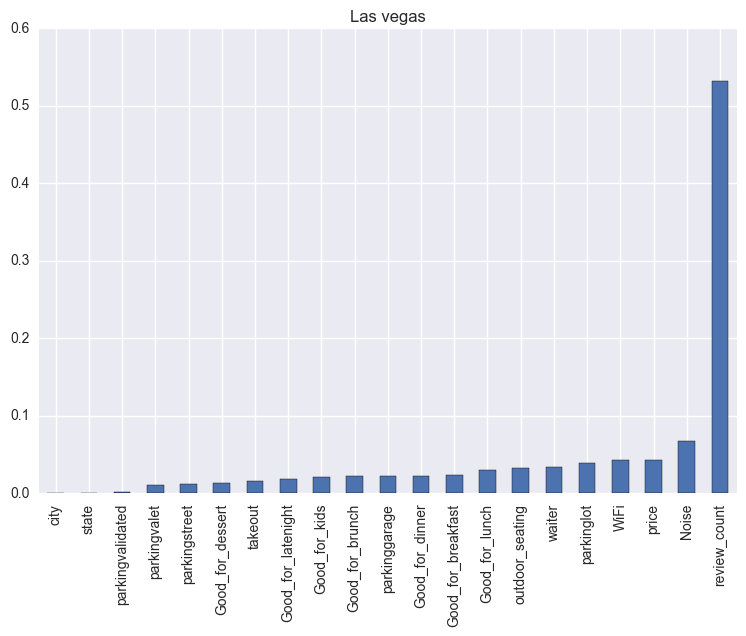

In [101]:
feature_importance_Las=pd.DataFrame(rf_model.feature_importances_)
feature_importance_Las.columns=['Las_feature_importance']
Las_plot_features=pd.DataFrame(Las_plot_features)
Las_plot_features.columns=['features']
Las_pltt=pd.concat([feature_importance_Las, Las_plot_features],axis=1)
Las_pltt=Las_pltt.sort(['Las_feature_importance'],ascending=True)

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(111)
label=['city', 'state', 'parkingvalidated', 'parkingvalet', 'parkingstreet', 'Good_for_dessert', 'takeout', 'Good_for_latenight',
       'Good_for_kids', 'Good_for_brunch', 'parkinggarage', 'Good_for_dinner', 'Good_for_breakfast','Good_for_lunch', 'outdoor_seating', 
       'waiter', 'parkinglot', 'WiFi', 'price', 'Noise','review_count']

Las_pltt['Las_feature_importance'].plot(kind='bar')
ax1.set_xticklabels(label,rotation=90)
ax1.set_title('Las vegas')

According to the above, the importance level of 'review_count' (0.53) is even higher than the sum of importance of other independent variables (0.4684). The sum of feature importance for all 'Goods' including 'Goods for kids', 'Goods for lunch', 'Good for latenight, 'Good for dinner', 'Good for dessert', 'Good for brunch' and 'Good for breakfast' equals to 0.1474. The first five most importance features are 'review count','Noise','price','Wifi' and 'parkinglot'. 

The following step is to applying logistic regression to test the relationship between logistic feature selected from random forest and make a further analysis

In [331]:
Las_logistic_feature

['review_count']

Set the value for Las vegas's feature(X) and dependent variable (y)

In [761]:
Las['intercept']=1
feature=['review_count','intercept']
X=Las[feature]
y=Las.stars>3

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Train the logistic regression model and print the result and odds ratio.

In [762]:
logit=sm.Logit(y,X)
result=logit.fit()
print(result.summary())
print (np.exp(result.params)) # odds ratio

Optimization terminated successfully.
         Current function value: 0.585709
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  stars   No. Observations:                 3410
Model:                          Logit   Df Residuals:                     3408
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Mar 2017   Pseudo R-squ.:                 0.05027
Time:                        21:05:07   Log-Likelihood:                -1997.3
converged:                       True   LL-Null:                       -2103.0
                                        LLR p-value:                 6.703e-48
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
review_count     0.0033      0.000     11.130      0.000         0.003     0.004
intercept        0.3643

Based on above result, the odds ratio for 'review_count' is 1.00335 which is over '1', which means 'review count' has a positive relationship with 'Star' in Las vegas.

## part 3 Algorithmic analysis for Montreal 

In [77]:
final.columns

Index(['stars', 'waiter', 'parkingvalet', 'parkingstreet', 'parkinglot',
       'parkinggarage', 'outdoor_seating', 'Good_for_kids', 'Good_for_lunch',
       'Good_for_latenight', 'Good_for_dinner', 'Good_for_dessert',
       'Good_for_brunch', 'Good_for_breakfast', 'Noise', 'WiFi', 'takeout',
       'parkingvalidated', 'city', 'state', 'review_count', 'price'],
      dtype='object')

After training the random forest model on city 'Las vegas', now is began to find the importance feature on city 'Montrea'. Due the numerical trasnformation before, it is necessary to find the correct numerical number for city 'Montreal' by comparing the 'df' and 'final' files. As we see below, the number for city 'Montreal' and 'Edinburgh' is '1176' and '332' separately. 

In [78]:
print (df.city.value_counts()['Montr茅al'])
print (df.city.value_counts()['Edinburgh'])


1176
332


In [79]:
print (final.city.value_counts()[115])
print (final.city.value_counts()[47])

1176
332


In [80]:
Montreal=final[final.city==115]
Edinburgh=final[final.city==47]

Below is the result of 'Spearman' method on feature in city 'Montreal'. It finds that 'parkingstreet' and 'review_count' are relatively higher correlated with 'star rating' by setting a threshold (correlation coefficient > 0.1).

In [734]:
Montreal.corr(method='spearman')

stars    waiter  parkingvalet  parkingstreet  \
stars               1.000000 -0.077288     -0.041143       0.140021   
waiter             -0.077288  1.000000      0.052638       0.112420   
parkingvalet       -0.041143  0.052638      1.000000       0.004566   
parkingstreet       0.140021  0.112420      0.004566       1.000000   
parkinglot         -0.018497  0.030560      0.034106      -0.064338   
parkinggarage      -0.017901  0.027511      0.153563       0.048297   
outdoor_seating    -0.017595  0.079795      0.064585       0.127084   
Good_for_kids      -0.045214 -0.163810     -0.154729      -0.101090   
Good_for_lunch     -0.004572 -0.128481     -0.041108       0.133349   
Good_for_latenight -0.002561  0.011088      0.006473       0.099702   
Good_for_dinner     0.035270  0.236220      0.027096       0.297870   
Good_for_dessert    0.067048 -0.007305     -0.028363       0.054423   
Good_for_brunch     0.085212  0.063666      0.016883       0.026791   
Good_for_breakfast  0.020835 -0.120836      0.026506       0.070066   
Noise              -0.113192  0.072190     -0.008479       0.096206   
WiFi                0.056801 -0.022590      0.114052       0.057761   
takeout            -0.006968 -0.217865     -0.145774      -0.082918   
parkingvalidated   -0.028751  0.033098      0.072189       0.006163   
city                     NaN       NaN           NaN            NaN   
state                    NaN       NaN           NaN            NaN   
review_count        0.157646  0.148969      0.012800       0.507043   
price              -0.054059  0.429630      0.189178       0.120722   
intercept                NaN       NaN           NaN            NaN   

                    parkinglot  parkinggarage  outdoor_seating  Good_for_kids  \
stars                -0.018497      -0.017901        -0.017595      -0.045214   
waiter                0.030560       0.027511         0.079795      -0.163810   
parkingvalet          0.034106       0.153563         0.064585      -0.154729   
parkingstreet        -0.064338       0.048297         0.127084      -0.101090   
parkinglot            1.000000       0.022734         0.062266      -0.007163   
parkinggarage         0.022734       1.000000         0.057524      -0.077154   
outdoor_seating       0.062266       0.057524         1.000000      -0.109387   
Good_for_kids        -0.007163      -0.077154        -0.109387       1.000000   
Good_for_lunch       -0.013542      -0.002027        -0.096835       0.261688   
Good_for_latenight    0.036464       0.035473         0.045524      -0.214487   
Good_for_dinner       0.004596       0.015935        -0.009946      -0.143030   
Good_for_dessert      0.035748      -0.020347         0.029808       0.040572   
Good_for_brunch       0.010154       0.010126         0.078857       0.063984   
Good_for_breakfast    0.047494       0.057346         0.003406       0.060729   
Noise                 0.054372       0.007887         0.088502      -0.186914   
WiFi                  0.058670       0.087944         0.188762      -0.086772   
takeout               0.029522      -0.040036        -0.087854       0.517409   
parkingvalidated      0.049639       0.106579         0.011092      -0.007549   
city                       NaN            NaN              NaN            NaN   
state                      NaN            NaN              NaN            NaN   
review_count         -0.007702      -0.014760         0.053497      -0.143283   
price                 0.077208       0.059040         0.051806      -0.410861   
intercept                  NaN            NaN              NaN            NaN   

                    Good_for_lunch  Good_for_latenight    ...      \
stars                    -0.004572           -0.002561    ...       
waiter                   -0.128481            0.011088    ...       
parkingvalet             -0.041108            0.006473    ...       
parkingstreet             0.133349            0.099702    ...       
parkinglot               -0.

Compared to 'spearman', 'Kendall' method gets similar result with 'spearman'. There are only the correlation coefficient of 'parkingstreet' and 'review_count' are over 0.1


In [736]:
Montreal.corr(method='kendall')

stars    waiter  parkingvalet  parkingstreet  \
stars               1.000000 -0.069932     -0.037227       0.126693   
waiter             -0.069932  1.000000      0.052638       0.112420   
parkingvalet       -0.037227  0.052638      1.000000       0.004566   
parkingstreet       0.126693  0.112420      0.004566       1.000000   
parkinglot         -0.016736  0.030560      0.034106      -0.064338   
parkinggarage      -0.016197  0.027511      0.153563       0.048297   
outdoor_seating    -0.015921  0.079795      0.064585       0.127084   
Good_for_kids      -0.040910 -0.163810     -0.154729      -0.101090   
Good_for_lunch     -0.004137 -0.128481     -0.041108       0.133349   
Good_for_latenight -0.002317  0.011088      0.006473       0.099702   
Good_for_dinner     0.031913  0.236220      0.027096       0.297870   
Good_for_dessert    0.060666 -0.007305     -0.028363       0.054423   
Good_for_brunch     0.077102  0.063666      0.016883       0.026791   
Good_for_breakfast  0.018852 -0.120836      0.026506       0.070066   
Noise              -0.099188  0.068840     -0.008086       0.091743   
WiFi                0.051228 -0.022525      0.113720       0.057593   
takeout            -0.006305 -0.217865     -0.145774      -0.082918   
parkingvalidated   -0.026015  0.033098      0.072189       0.006163   
city                     NaN       NaN           NaN            NaN   
state                    NaN       NaN           NaN            NaN   
review_count        0.120505  0.122618      0.010536       0.417352   
price              -0.046686  0.409238      0.180199       0.114992   
intercept                NaN       NaN           NaN            NaN   

                    parkinglot  parkinggarage  outdoor_seating  Good_for_kids  \
stars                -0.016736      -0.016197        -0.015921      -0.040910   
waiter                0.030560       0.027511         0.079795      -0.163810   
parkingvalet          0.034106       0.153563         0.064585      -0.154729   
parkingstreet        -0.064338       0.048297         0.127084      -0.101090   
parkinglot            1.000000       0.022734         0.062266      -0.007163   
parkinggarage         0.022734       1.000000         0.057524      -0.077154   
outdoor_seating       0.062266       0.057524         1.000000      -0.109387   
Good_for_kids        -0.007163      -0.077154        -0.109387       1.000000   
Good_for_lunch       -0.013542      -0.002027        -0.096835       0.261688   
Good_for_latenight    0.036464       0.035473         0.045524      -0.214487   
Good_for_dinner       0.004596       0.015935        -0.009946      -0.143030   
Good_for_dessert      0.035748      -0.020347         0.029808       0.040572   
Good_for_brunch       0.010154       0.010126         0.078857       0.063984   
Good_for_breakfast    0.047494       0.057346         0.003406       0.060729   
Noise                 0.051850       0.007521         0.084396      -0.178241   
WiFi                  0.058499       0.087688         0.188212      -0.086520   
takeout               0.029522      -0.040036        -0.087854       0.517409   
parkingvalidated      0.049639       0.106579         0.011092      -0.007549   
city                       NaN            NaN              NaN            NaN   
state                      NaN            NaN              NaN            NaN   
review_count         -0.006339      -0.012149         0.044034      -0.117938   
price                 0.073543       0.056237         0.049347      -0.391360   
intercept                  NaN            NaN              NaN            NaN   

                    Good_for_lunch  Good_for_latenight    ...      \
stars                    -0.004137           -0.002317    ...       
waiter                   -0.128481            0.011088    ...       
parkingvalet             -0.041108            0.006473    ...       
parkingstreet             0.133349            0.099702    ...       
parkinglot               -0.

The following way is to set the value for the independent feature(x_Montreal, x_Edinburgh) without feature 'stars' and 'intercept'. Set a threshold(y_Montreal>y_Montreal.mean(),y_Edinburgh>y_Edinburgh.mean()) for the value of dependent variable(y_Montreal, y_Edinburgh) of 'city' Montreal and Edinburgh. Afterwards, initialize, fit and train the random forest model on city 'Montreal'.

In [85]:
# Montreal
features=Montreal.drop(['stars'],axis=1).columns
x_Montreal=Montreal[features]
features_Edinburgh=Edinburgh.drop(['stars'],axis=1).columns
x_Edinburgh=Edinburgh[features_Edinburgh]

y_Montreal=Montreal.stars
y_Montreal=y_Montreal>y_Montreal.mean()
y_Edinburgh=Edinburgh.stars
y_Edinburgh=y_Edinburgh>y_Edinburgh.mean()

# initialize the random forest classifier
rf_model=RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)
rf_model=rf_model.fit(x_Montreal,y_Montreal)
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

After training the model in city 'Montreal', the accuracy of random forest model on out of bag is 0.6 which is not a bad score and no problem of over-fitting existed. 

In [86]:
print (rf_model.oob_score_)

0.599489795918


Printing out each feature importance and set a threshold(importance>0.1) to find the most importance feature.

In [87]:
Montreal_logit_feature=[]
Montreal_plot_feature=[]
for features, importances in zip(features, rf_model.feature_importances_):
    if importances > 0.1:
        Montreal_logit_feature.append(features)
    if abs(importances)>=0:
        Montreal_plot_feature.append(features)
    print (features,":",importances)

waiter : 0.0258886290382
parkingvalet : 0.0083190912439
parkingstreet : 0.0413409253537
parkinglot : 0.0134394046042
parkinggarage : 0.00448023776432
outdoor_seating : 0.045730342779
Good_for_kids : 0.0321271086564
Good_for_lunch : 0.0295708417196
Good_for_latenight : 0.016866855728
Good_for_dinner : 0.0305992949838
Good_for_dessert : 0.0131511330619
Good_for_brunch : 0.0205056006202
Good_for_breakfast : 0.0117032602935
Noise : 0.0975250079734
WiFi : 0.0461648828527
takeout : 0.0275439959224
parkingvalidated : 0.00240468354269
city : 0.0
state : 0.0
review_count : 0.459114089012
price : 0.0735246148497


The most importance feature in city 'Montreal' is 'review count'.

In [88]:
Montreal_logit_feature

['review_count']

Plotting a bar chart for feature importance in city 'Montreal' by sorting the feature importance level in True ascending. 

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


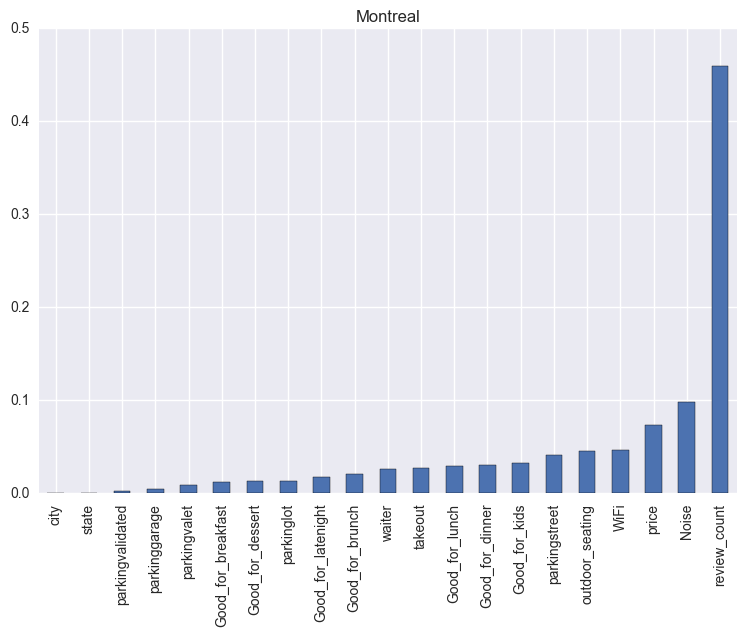

In [89]:
feature_importance_Montreal=pd.DataFrame(rf_model.feature_importances_)
feature_importance_Montreal.columns=['Montreal_feature_importance']
Montreal_plot_features=pd.DataFrame(Montreal_plot_feature)
Montreal_plot_features.columns=['features']
Montreal_pltt=pd.concat([feature_importance_Montreal, Montreal_plot_features],axis=1)
Montreal_pltt=Montreal_pltt.sort(['Montreal_feature_importance'], ascending=True)

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(111)
label=['city', 'state', 'parkingvalidated', 'parkinggarage', 'parkingvalet', 'Good_for_breakfast', 
       'Good_for_dessert', 'parkinglot', 'Good_for_latenight', 'Good_for_brunch', 'waiter', 'takeout',  'Good_for_lunch', 
        'Good_for_dinner', 'Good_for_kids', 'parkingstreet', 'outdoor_seating',  'WiFi', 'price', 'Noise','review_count']

Montreal_pltt['Montreal_feature_importance'].plot(kind='bar')
ax1.set_xticklabels(label,rotation=90)
ax1.set_title('Montreal')

As we see above, the most importance feature is still 'review_count' (0.46). The sum of feature importance for all 'Goods' including 'Goods for kids', 'Goods for lunch', 'Good for latenight, 'Good for dinner', 'Good for dessert', 'Good for brunch' and 'Good for breakfast' equals to 0.154. The first five most importance features are 'review count','Noise','price','Wifi' and 'outdoor seating'. 

Next is to applying logistic regression to test the relationship between selected logistic feature from random forest and 'star' further. Firstly, set the value for Montreal's feature(X) and dependent variable(y))

In [763]:
Montreal['intercept']=1
feature=['review_count','intercept']
X=Montreal[feature]
y=Montreal.stars>3

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Train the logistic regression model and print the odds ratio out.

In [765]:
logit=sm.Logit(y,X)
result=logit.fit()
print(result.summary())
print (np.exp(result.params)) # odds ratio

Optimization terminated successfully.
         Current function value: 0.470439
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  stars   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1174
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Mar 2017   Pseudo R-squ.:                 0.04810
Time:                        21:08:52   Log-Likelihood:                -553.24
converged:                       True   LL-Null:                       -581.19
                                        LLR p-value:                 7.582e-14
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
review_count     0.0197      0.003      5.693      0.000         0.013     0.026
intercept        0.8190

Based on above result, the odds ratio for 'review_count' is 1.020 which is over '1', which means 'review count' has a positive relationship with 'Star' in Montreal.

## Part 4 Algorithmic analysis for Edinburgh

After training the random forest model on city 'Montreal' and 'Las vegas', it is started to train model on city 'Edinburgh'. As we calculated before, the number of Edinburgh is '47' which is also confirmed by 'Assertation' below in the following line.

In [90]:
assert df.city.value_counts()['Edinburgh']==final.city.value_counts()[47]

In addition, set the value for independent variable (x_Edinburgh) with removing feature 'stars' and 'intercept' and dependent variable (y_Edinburgh) with a threshold over 'y_Edinburgh.mean()' in city 'Edinburgh'.

In [91]:
features_Edinburgh=Edinburgh.drop(['stars'],axis=1).columns
x_Edinburgh=Edinburgh[features_Edinburgh]

y_Edinburgh=Edinburgh.stars
y_Edinburgh=y_Edinburgh>y_Edinburgh.mean()

Initialize, fit and train the random forest model on 'x_Edinburgh' and 'y_Edinburgh'.

In [92]:
# initialize the random forest classifier
rf_model=RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)
rf_model=rf_model.fit(x_Edinburgh,y_Edinburgh)
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

The accuracy of random forest model on out of bag is 0.62 which is a good accurating rate and no error of over fitting existed.

In [93]:
print (rf_model.oob_score_)

0.626506024096


Printing out the feature importance for each independent variable and only 'review count' is over 0.1 importance level again.

In [95]:
Edinburgh_plot_features=[]
Edinburgh_logistic_feature=[]
for features, importances in zip(features_Edinburgh, rf_model.feature_importances_):
    if importances>=0:
        Edinburgh_plot_features.append(features)
    if importances>0.1:
        Edinburgh_logistic_feature.append(features)
    print (features,":",importances)

waiter : 0.039734343817
parkingvalet : 0.0
parkingstreet : 0.0483185322146
parkinglot : 0.00595541211347
parkinggarage : 0.00194669628484
outdoor_seating : 0.0467196007617
Good_for_kids : 0.0407015794534
Good_for_lunch : 0.0538188320194
Good_for_latenight : 0.0214643433899
Good_for_dinner : 0.040968139453
Good_for_dessert : 0.0126657940194
Good_for_brunch : 0.025819320395
Good_for_breakfast : 0.0104760641395
Noise : 0.104992437266
WiFi : 0.0753598011111
takeout : 0.0380819442166
parkingvalidated : 0.0
city : 0.0
state : 0.0187144529626
review_count : 0.336054460429
price : 0.0782082459533


Plotting the feature importance of each independent variable by sorting them in a True ascending.

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


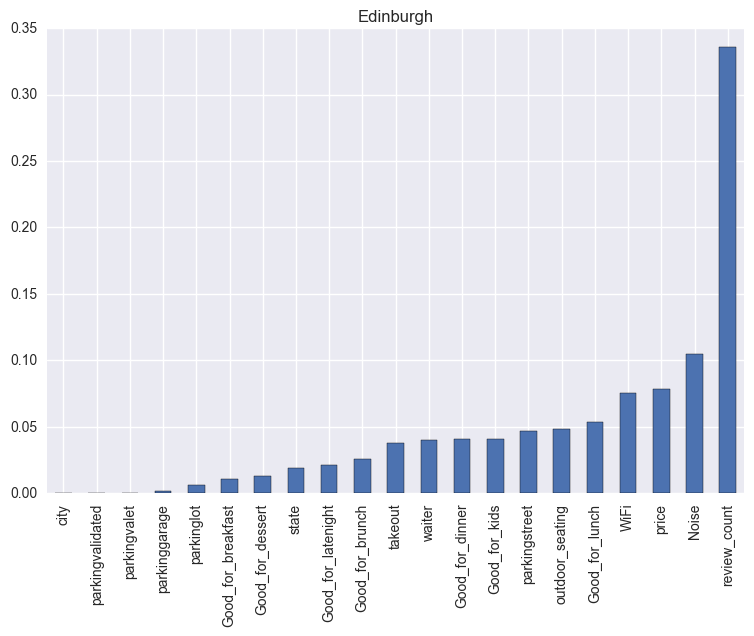

In [96]:
feature_importance_Edinburgh=pd.DataFrame(rf_model.feature_importances_)
feature_importance_Edinburgh.columns=['Edinburgh_feature_importance']
Edinburgh_plot_features=pd.DataFrame(Edinburgh_plot_features)
Edinburgh_plot_features.columns=['features']
Edinburgh_pltt=pd.concat([feature_importance_Edinburgh, Edinburgh_plot_features],axis=1)
Edinburgh_pltt=Edinburgh_pltt.sort(['Edinburgh_feature_importance'], ascending=True)

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(111)
label=['city', 'parkingvalidated', 'parkingvalet', 'parkinggarage',  'parkinglot', 'Good_for_breakfast', 
       'Good_for_dessert', 'state', 'Good_for_latenight', 'Good_for_brunch', 'takeout', 'waiter', 'Good_for_dinner', 
       'Good_for_kids', 'parkingstreet',  'outdoor_seating', 'Good_for_lunch', 'WiFi', 'price', 'Noise','review_count']

Edinburgh_pltt['Edinburgh_feature_importance'].plot(kind='bar')
ax1.set_xticklabels(label,rotation=90)
ax1.set_title('Edinburgh')

As we see above, the most importance feature is still 'review_count' (0.33) but it is obviously lower than other two cities (Montreal : 0.45, Las vegas : 0.53). The sum of feature importance for all 'Goods' including 'Goods for kids', 'Goods for lunch', 'Good for latenight, 'Good for dinner', 'Good for dessert', 'Good for brunch' and 'Good for breakfast' equals to 0.212 which is also obviously higher than other two cities (Montreal:0.154, Las vegas: 0.1474). The first five most importance features are 'review count','Noise','price','Wifi' and 'Good_for_lunch'. 

The following step is using logistic regression to test the relationship between selected logistic feature and 'star rating'.

In [770]:
Edinburgh['intercept']=1
feature=['review_count','Noise', 'intercept']
X=Edinburgh[feature]
y=Edinburgh.stars>3

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [771]:
logit=sm.Logit(y,X)
result=logit.fit()
print(result.summary())
print (np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.337871
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  stars   No. Observations:                  332
Model:                          Logit   Df Residuals:                      329
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Mar 2017   Pseudo R-squ.:                 0.03335
Time:                        21:12:04   Log-Likelihood:                -112.17
converged:                       True   LL-Null:                       -116.04
                                        LLR p-value:                   0.02086
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
review_count     0.0124      0.008      1.526      0.127        -0.004     0.028
Noise           -0.6439

Based on above result, the odds ratio for 'review_count'is 1.012 which  over '1', it means 'review count' has a positive relationship with 'Star' in Montreal. However, the odds ratio for 'Noise' is '0.53' which means it has a negative relationship with 'star rating' in Edinburgh.

Below is the result of 'Spearman' method on feature in city 'Montreal'. It finds that 'parkingstreet', 'state' and 'review_count' are relatively higher correlated with 'star rating' by setting a threshold (correlation coefficient > 0.1).

In [69]:
final['WiFi'].value_counts()

0    9312
1    6421
2     116
Name: WiFi, dtype: int64

In [738]:
Edinburgh.corr(method='spearman')

stars    waiter  parkingvalet  parkingstreet  \
stars               1.000000  0.055692           NaN       0.120763   
waiter              0.055692  1.000000           NaN       0.205253   
parkingvalet             NaN       NaN           NaN            NaN   
parkingstreet       0.120763  0.205253           NaN       1.000000   
parkinglot         -0.046495 -0.024532           NaN      -0.102663   
parkinggarage      -0.087231 -0.101747           NaN      -0.059093   
outdoor_seating    -0.066711  0.193751           NaN       0.043927   
Good_for_kids      -0.106718 -0.087029           NaN      -0.040977   
Good_for_lunch     -0.114621 -0.012232           NaN       0.155548   
Good_for_latenight -0.077832 -0.052959           NaN       0.073152   
Good_for_dinner     0.078135  0.241915           NaN       0.276229   
Good_for_dessert    0.062516  0.053058           NaN       0.057903   
Good_for_brunch     0.043412 -0.025645           NaN       0.043956   
Good_for_breakfast -0.023935  0.001470           NaN       0.043689   
Noise              -0.129771  0.081329           NaN      -0.004948   
WiFi               -0.179635  0.111381           NaN       0.033424   
takeout            -0.038597 -0.276976           NaN      -0.089215   
parkingvalidated         NaN       NaN           NaN            NaN   
city                     NaN       NaN           NaN            NaN   
state               0.148358  0.060140           NaN      -0.030539   
review_count        0.107205  0.210817           NaN       0.494440   
price               0.080449  0.448505           NaN       0.093673   
intercept                NaN       NaN           NaN            NaN   

                    parkinglot  parkinggarage  outdoor_seating  Good_for_kids  \
stars                -0.046495      -0.087231        -0.066711      -0.106718   
waiter               -0.024532      -0.101747         0.193751      -0.087029   
parkingvalet               NaN            NaN              NaN            NaN   
parkingstreet        -0.102663      -0.059093         0.043927      -0.040977   
parkinglot            1.000000      -0.005249         0.123675       0.060458   
parkinggarage        -0.005249       1.000000        -0.042439       0.034800   
outdoor_seating       0.123675      -0.042439         1.000000      -0.062246   
Good_for_kids         0.060458       0.034800        -0.062246       1.000000   
Good_for_lunch        0.081293      -0.034543         0.026144       0.131620   
Good_for_latenight   -0.023527      -0.013542         0.077837      -0.130927   
Good_for_dinner      -0.062245      -0.035828        -0.149396      -0.170036   
Good_for_dessert     -0.016828      -0.009686         0.046087      -0.005402   
Good_for_brunch      -0.032781      -0.018869         0.221571       0.130536   
Good_for_breakfast   -0.015940      -0.009175         0.062825       0.105684   
Noise                 0.024565       0.092017         0.081396      -0.110145   
WiFi                  0.027832      -0.055961         0.235459      -0.062345   
takeout              -0.052502      -0.067657        -0.136122       0.506968   
parkingvalidated           NaN            NaN              NaN            NaN   
city                       NaN            NaN              NaN            NaN   
state                -0.022184      -0.012769        -0.038120       0.056373   
review_count         -0.002990       0.057076         0.073334      -0.162648   
price                 0.027998       0.016116         0.000266      -0.305028   
intercept                  NaN            NaN              NaN            NaN   

                    Good_for_lunch  Good_for_latenight    ...      \
stars                    -0.114621           -0.077832    ...       
waiter                   -0.012232           -0.052959    ...       
parkingvalet                   NaN                 NaN    ...       
parkingstreet             0.155548            0.073152    ...       
parkinglot                0.

Compared to 'spearman', 'Kendall' method gets similar result with 'spearman'. There are only the correlation coefficient of 'parkingstreet' and 'state' are over 0.1. It is noteworthy in this case that the correlation coefficient of 'review_count' is only around 0.08 which is the first time to be below 0.1.

In [741]:
Edinburgh.corr(method='kendall')

stars    waiter  parkingvalet  parkingstreet  \
stars               1.000000  0.051200           NaN       0.111025   
waiter              0.051200  1.000000           NaN       0.205253   
parkingvalet             NaN       NaN           1.0            NaN   
parkingstreet       0.111025  0.205253           NaN       1.000000   
parkinglot         -0.042746 -0.024532           NaN      -0.102663   
parkinggarage      -0.080196 -0.101747           NaN      -0.059093   
outdoor_seating    -0.061331  0.193751           NaN       0.043927   
Good_for_kids      -0.098112 -0.087029           NaN      -0.040977   
Good_for_lunch     -0.105378 -0.012232           NaN       0.155548   
Good_for_latenight -0.071555 -0.052959           NaN       0.073152   
Good_for_dinner     0.071834  0.241915           NaN       0.276229   
Good_for_dessert    0.057474  0.053058           NaN       0.057903   
Good_for_brunch     0.039911 -0.025645           NaN       0.043956   
Good_for_breakfast -0.022005  0.001470           NaN       0.043689   
Noise              -0.114619  0.077855           NaN      -0.004737   
WiFi               -0.164678  0.110740           NaN       0.033231   
takeout            -0.035484 -0.276976           NaN      -0.089215   
parkingvalidated         NaN       NaN           NaN            NaN   
city                     NaN       NaN           NaN            NaN   
state               0.136394  0.060140           NaN      -0.030539   
review_count        0.083462  0.173704           NaN       0.407398   
price               0.071926  0.431192           NaN       0.090057   
intercept                NaN       NaN           NaN            NaN   

                    parkinglot  parkinggarage  outdoor_seating  Good_for_kids  \
stars                -0.042746      -0.080196        -0.061331      -0.098112   
waiter               -0.024532      -0.101747         0.193751      -0.087029   
parkingvalet               NaN            NaN              NaN            NaN   
parkingstreet        -0.102663      -0.059093         0.043927      -0.040977   
parkinglot            1.000000      -0.005249         0.123675       0.060458   
parkinggarage        -0.005249       1.000000        -0.042439       0.034800   
outdoor_seating       0.123675      -0.042439         1.000000      -0.062246   
Good_for_kids         0.060458       0.034800        -0.062246       1.000000   
Good_for_lunch        0.081293      -0.034543         0.026144       0.131620   
Good_for_latenight   -0.023527      -0.013542         0.077837      -0.130927   
Good_for_dinner      -0.062245      -0.035828        -0.149396      -0.170036   
Good_for_dessert     -0.016828      -0.009686         0.046087      -0.005402   
Good_for_brunch      -0.032781      -0.018869         0.221571       0.130536   
Good_for_breakfast   -0.015940      -0.009175         0.062825       0.105684   
Noise                 0.023516       0.088086         0.077920      -0.105440   
WiFi                  0.027672      -0.055639         0.234103      -0.061985   
takeout              -0.052502      -0.067657        -0.136122       0.506968   
parkingvalidated           NaN            NaN              NaN            NaN   
city                       NaN            NaN              NaN            NaN   
state                -0.022184      -0.012769        -0.038120       0.056373   
review_count         -0.002463       0.047028         0.060424      -0.134015   
price                 0.026917       0.015494         0.000256      -0.293254   
intercept                  NaN            NaN              NaN            NaN   

                    Good_for_lunch  Good_for_latenight    ...      \
stars                    -0.105378           -0.071555    ...       
waiter                   -0.012232           -0.052959    ...       
parkingvalet                   NaN                 NaN    ...       
parkingstreet             0.155548            0.073152    ...       
parkinglot                0.

The following way is to plot the bar chart of each feature importance of city 'Montreal', 'Las vegas' and 'Edinburgh' in the same graph in order to compare them

In [246]:
Edinburgh_pltt=pd.concat([feature_importance_Edinburgh, Edinburgh_plot_features],axis=1)
Montreal_pltt=pd.concat([feature_importance_Montreal, Montreal_plot_features],axis=1)
Las_pltt=pd.concat([feature_importance_Las, Las_plot_features],axis=1)
Total=pd.concat([Edinburgh_pltt, Montreal_pltt, Las_pltt], axis=1)
Total=Total.drop(['features'],axis=1)

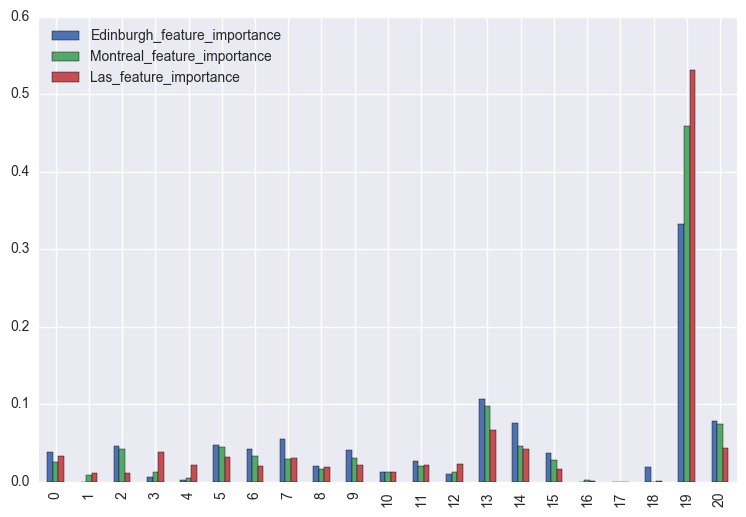

In [256]:
Edinburgh_pltt=pd.concat([feature_importance_Edinburgh, Edinburgh_plot_features],axis=1)
Montreal_pltt=pd.concat([feature_importance_Montreal, Montreal_plot_features],axis=1)
Las_pltt=pd.concat([feature_importance_Las, Las_plot_features],axis=1)
Total=pd.concat([Edinburgh_pltt.drop(['features'],axis=1), Montreal_pltt.drop(['features'],axis=1), Las_pltt], axis=1)

plt.figure(figsize=(9,6))
ax1=fig.add_subplot(111)
label=['waiter', 'parkingvalet', 'parkingstreet', 'parkinglot', 'parkinggarage', 'outdoor_seating',  'Good_for_kids', 
       'Good_for_lunch','Good_for_latenight', 'Good_for_dinner', 'Good_for_dessert', 'Good_for_brunch','Good_for_breakfast',
       'Noise', 'WiFi', 'takeout', 'parkingvalidated', 'city', 'state',  'review_count', 'price']
feature=['Edinburgh_feature_importance','Montreal_feature_importance','Las_feature_importance']
Total[feature].plot(kind='bar',figsize=(9,6))
ax1.set_xticklabels(label, rotation=90)

'waiter'[0], 'parkingvalet'[1], 'parkingstreet'[2], 'parkinglot'[3], 'parkinggarage'[4], 'outdoor_seating'[5], 'Good_for_kids'[6], 'Good_for_lunch'[7],'Good_for_latenight'[8], 'Good_for_dinner'[9], 'Good_for_dessert'[10], 'Good_for_brunch'[11],'Good_for_breakfast'[12], 'Noise'[13], 'WiFi'[14], 'takeout'[15], 'parkingvalidated'[16], 'city'[17], 'state'[18],  'review_count'[19], 'price'[20]

According to above graph, we find that in each feature, 'review count' is always the highest importance for 'star rating'. The first five important features in each city always includes 'review count', 'Noise','WiFi'and 'Price'. Moreover, the total goods service which is the sum of 'Good_for_kids'[6], 'Good_for_lunch'[7],'Good_for_latenight'[8], 'Good_for_dinner'[9], 'Good_for_dessert'[10], 'Good_for_brunch'[11],'Good_for_breakfast'[12] n each city are all second important feature. 

## Part 5 Further analysis for feature ('review count') in each city

Due to above findings, 'review_count' is the most important feature on the 'star rating' in each city. As a consequence, it will affect the star rating strongly. I will plot out the distribution for 'review count' in each city to confirm.

In order to find the optimal distribution to visualize the 'review count' of each city in the best way, i will divide the component of each star rating of each city into three parts: 10% left tail. 80% body and 10% right tail。 Afterwards, applying KStest to confirm which distribution probability is the best fit for the review count in each city.

Before dividing the component of 'review count in city 'Las vegas', we need to sort the 'review count' in each city in True ascending.

In [54]:
Las=df[df.city=='Las Vegas']
Las_vegas=Las.sort(['review_count'], ascending = True)

Montreal=df[df.city=='Montr茅al']
Montreal=Montreal.sort(['review_count'],ascending = True)

Edinburgh=df[df.city=='Edinburgh']
Edinburgh=Edinburgh.sort(['review_count'],ascending = True)

C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\yifeichongtian\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Then dividing the component of 'review_count' in each city into three parts

In [55]:
# Las vegas
left_tail_Las=Las_vegas['review_count'][0:10]
body_Las=Las_vegas['review_count'][11:3400]
right_tail_Las=Las_vegas['review_count'][3401:3410]

# Montreal
left_tail_Montreal=Montreal['review_count'][0:20]
body_Montreal=Montreal['review_count'][21:1156]
right_tail_Montreal=Montreal['review_count'][1157:1176]

# Edinburgh
left_tail_Ed=Edinburgh['review_count'][0:16]
body_Ed=Edinburgh['review_count'][17:316]
right_tail_Ed=Edinburgh['review_count'][316:332]


In [56]:
print (len((Las_vegas['review_count'])))
print (len(Montreal['review_count']))
print (len(Edinburgh['review_count']))

3410
1176
332


After dividing, applying maximum likehood estimation to estimate the alpha for 'review count' of each city. The formula of maximum likelihood estimation is below

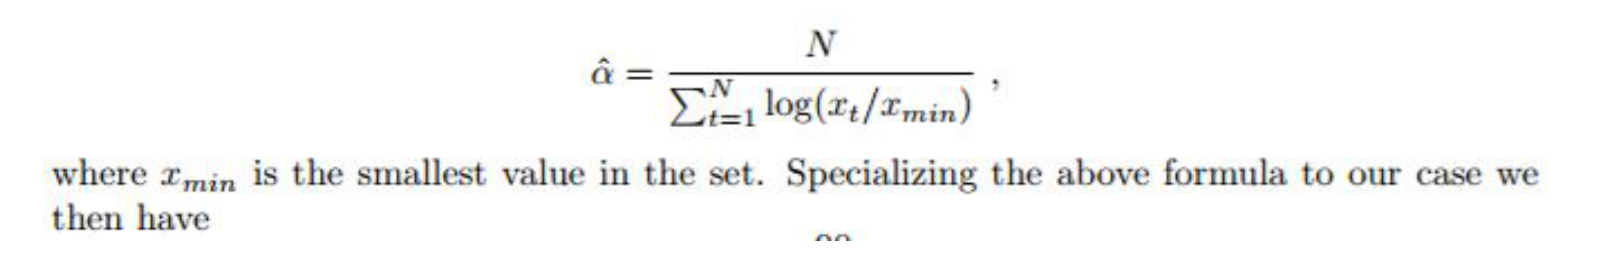

In [396]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(20,10))
lena = mpimg.imread('C:/Users/yifeichongtian/Desktop/DA final report/17.JPG')
plt.imshow(lena)
plt.axis('off')
plt.show()

> 'N' is the length of the left or right tail

The ML estimation for Las vegas is 0.3

In [57]:
# Las vegas
par=df[df.city=='Las Vegas']['review_count'].value_counts()
alpha = len(df[df.city=='Las Vegas']['review_count'])/sum(np.log(df[df.city=='Las Vegas']['review_count']/min(par.index)))
print (alpha)

# Edinburgh
par_Edinburgh=df[df.city=='Edinburgh']['review_count'].value_counts()
alpha_Edinburgh = len(df[df.city=='Edinburgh']['review_count'])/sum(np.log(df[df.city=='Edinburgh']['review_count']/min(par.index)))
print (alpha_Edinburgh)

# Montreal
par_Montreal=df[df.city=='Montr茅al']['review_count'].value_counts()
alpha_Montreal = len(df[df.city=='Montr茅al']['review_count'])/sum(np.log(df[df.city=='Montr茅al']['review_count']/min(par.index)))
print (alpha_Montreal)


0.304295656588
0.474414699619
0.478066975978


After get the value of predicted alpha for 'review count' of Las vegas, plotting the empricial frequency and the function of ML estimation method for power law distribution and compare them to find whether the power law distribution is fit for the distribution of 'review count' in Las vegas. 

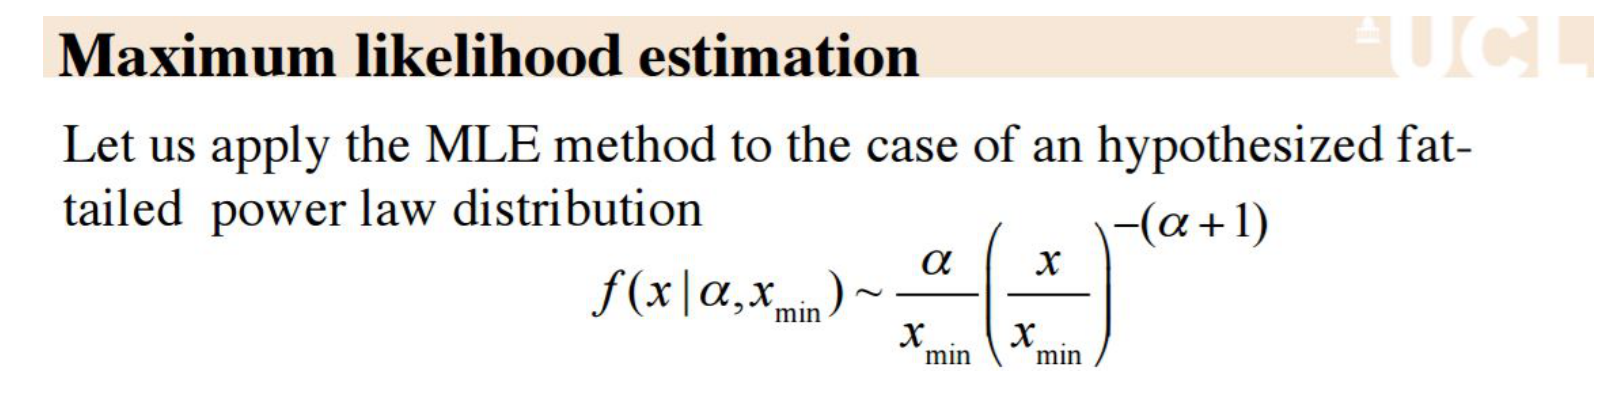

In [401]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(20,10))
lena = mpimg.imread('C:/Users/yifeichongtian/Desktop/DA final report/18.JPG')
plt.imshow(lena)
plt.axis('off')
plt.show()

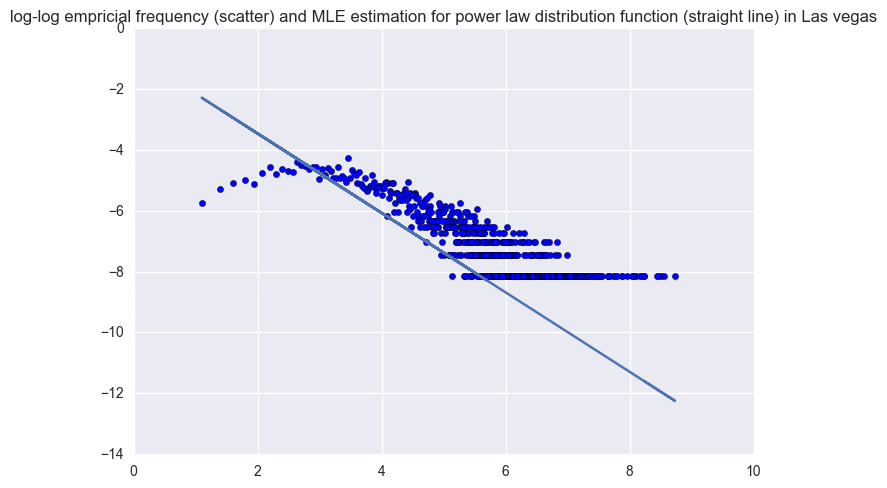

In [58]:
# Las Vegas
par=df[df.city=='Las Vegas']['review_count'].value_counts()
freq=par/sum(par)
plt.scatter(np.log(par.index),np.log(freq))
alpha = len(df[df.city=='Las Vegas']['review_count'])/sum(np.log(df[df.city=='Las Vegas']['review_count']/min(par.index)))
fitted = (alpha/min(par.index))*((par.index/min(par.index))**(-(alpha+1)))
plt.plot(np.log(par.index),np.log(fitted))
plt.title('log-log empricial frequency (scatter) and MLE estimation for power law distribution function (straight line) in Las vegas')

According to above graph, it is easy to find that the MLE for power law distribution function didn't capture the left tail of log-log emprical frequency for city 'Las Vegas'. So this method guess that the power law distribution is not suitable for left tail area of 'review count' of city 'Las vegas' but maybe suitable for other parts of 'review count' of city 'Las vegas'.

Afterwards, applying KStest to confirm above findings. 

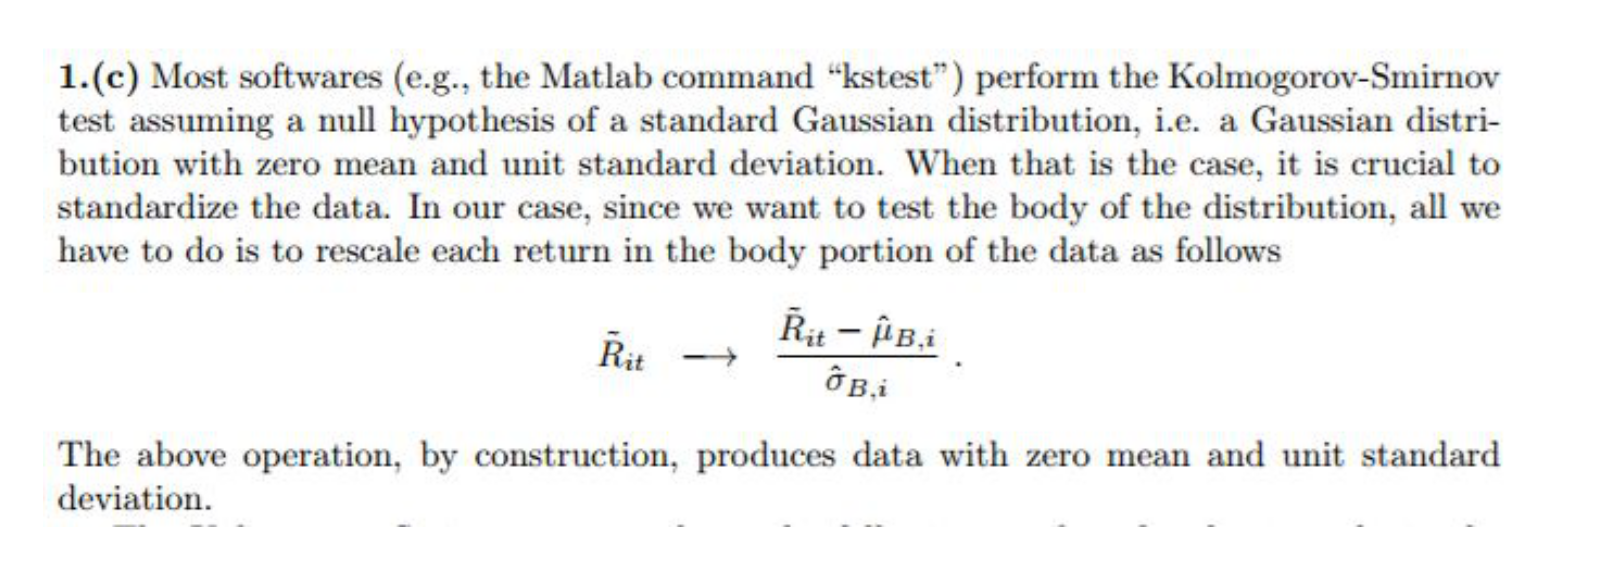

In [414]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(20,10))
lena = mpimg.imread('C:/Users/yifeichongtian/Desktop/DA final report/18.JPG')
plt.imshow(lena)
plt.axis('off')
plt.show()

In [59]:
from scipy import stats
from scipy.stats import kstest
KS_Las=(body_Las-body_Las.mean())/body_Las.std()
test_stat = kstest(KS_Las, 'norm')
print (test_stat)

test_stat = kstest(KS_Las, 'expon')
print (test_stat)

KstestResult(statistic=0.26958626532583829, pvalue=2.3240594123811877e-214)
KstestResult(statistic=0.71732074358217768, pvalue=0.0)


In [541]:
2.3240594123811877e-214<0.05

True

According to above KStest, the normal and exponential distribution is unfit for the body of 'review_count' of city 'Las vegas'. 

In [503]:
KS_lef_tail_Las=(left_tail_Las-left_tail_Las.mean())/left_tail_Las.std()
test_stat=kstest(KS_lef_tail_Las, 'norm')
print (test_stat)

test_stat=kstest(KS_lef_tail_Las, 'expon')
print (test_stat)

KstestResult(statistic=nan, pvalue=nan)
KstestResult(statistic=nan, pvalue=nan)


According to above KStest, the normal and exponential distribution is unfit for the left tail of 'review_count' of city 'Las vegas'. 

In [504]:
KS_right_tail_Las=(right_tail_Las-right_tail_Las.mean())/right_tail_Las.std()
test_stat=kstest(KS_right_tail_Las, 'norm')
print (test_stat)
test_stat=kstest(KS_right_tail_Las, 'expon')
print (test_stat)

KstestResult(statistic=0.22718180776195834, pvalue=0.68628818333621977)
KstestResult(statistic=0.46529122629994774, pvalue=0.026383518476807533)


According to above KStest, the normal distribution is fit for the right tail of 'review_count' of city 'Las vegas' but the pvalue of exponential KStest is 0.03 which is smaller than 5% significance level. So the exponential distribution is unfit for right tail of 'review_count' of city 'Las vegas'

The following way is to plot the emprical CCDF and CCDF of a power law model for the 'review count' of city 'Las vegas' in order to check whether the power law distribution is fit for the 'review count' of city 'Las vegas'

> below is the formula of CCDF of a power law model

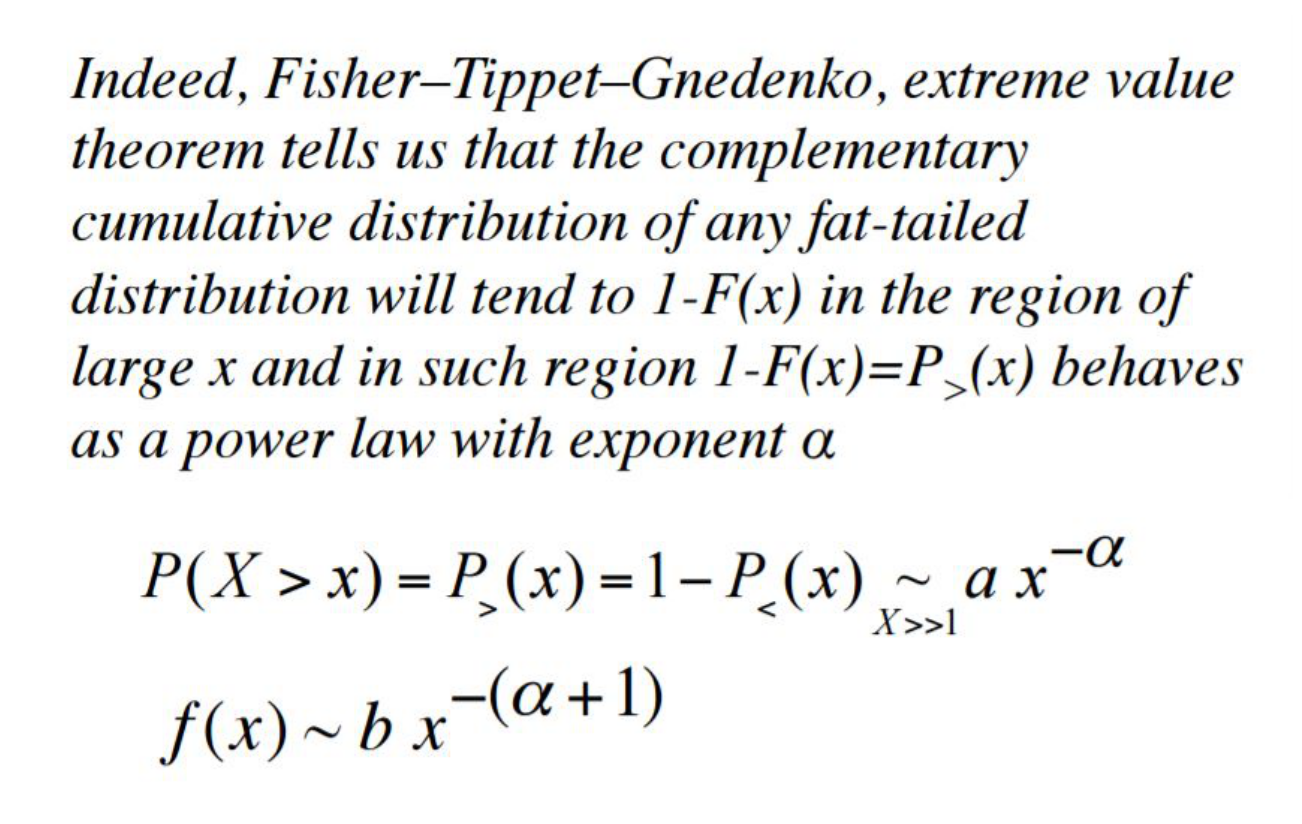

In [563]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(20,10))
lena = mpimg.imread('C:/Users/yifeichongtian/Desktop/DA final report/18.JPG')
plt.imshow(lena)
plt.axis('off')
plt.show()

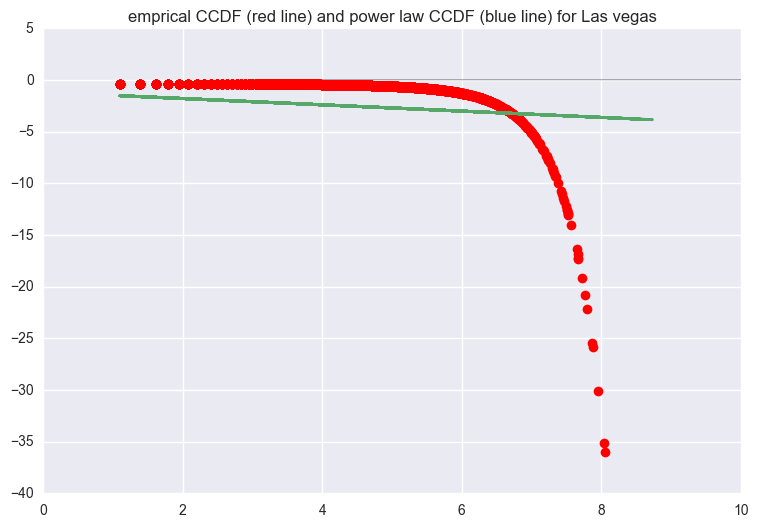

In [112]:
from scipy import stats
import matplotlib.mlab as mlab

fig=plt.figure(figsize=(9,6))
bins=len(df[df.city=='Las Vegas']['review_count'].value_counts())
x=df[df.city=='Las Vegas']['review_count']
n, bins, patches=plt.hist(x, bins, normed=1, facecolor='blue', alpha=0.45)
param=stats.norm.fit(x) 

y1=alpha*x**(-alpha)

y_CCDF=1-stats.norm.cdf(x,param[0],param[1])
plt.plot(np.log(x),np.log(y_CCDF),'ro',linewidth=2)

plt.plot(np.log(x),np.log(y1),'-',linewidth=2)
plt.xlim(0,10)
plt.title('emprical CCDF (red line) and power law CCDF (blue line) for Las vegas')

plt.show()# Tweak spacing to prevent clipping of ylabel    
plt.subplots_adjust(left=0.15) 

According to above figure, the CCDF in emprical type did not capture the CCDF in power law type, so the power law distribution is unsuitable for 'review count' of 'Las vegas'.

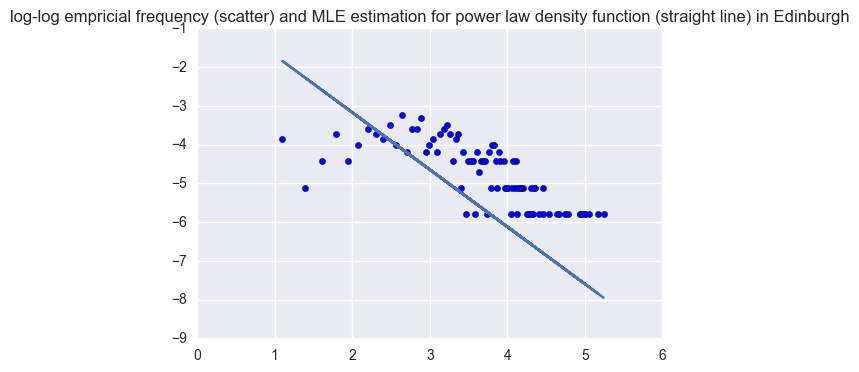

In [113]:
# Edinburgh
par=df[df.city=='Edinburgh']['review_count'].value_counts()
freq=par/sum(par)
plt.scatter(np.log(par.index),np.log(freq))
alpha = len(df[df.city=='Edinburgh']['review_count'])/sum(np.log(df[df.city=='Edinburgh']['review_count']/min(par.index)))
fitted = (alpha/min(par.index))*((par.index/min(par.index))**(-(alpha+1)))
plt.plot(np.log(par.index),np.log(fitted))
plt.title('log-log empricial frequency (scatter) and MLE estimation for power law density function (straight line) in Edinburgh')

According to above graph, the log-log emprical frequency didn't capture the MLE estimation for power law distribution function

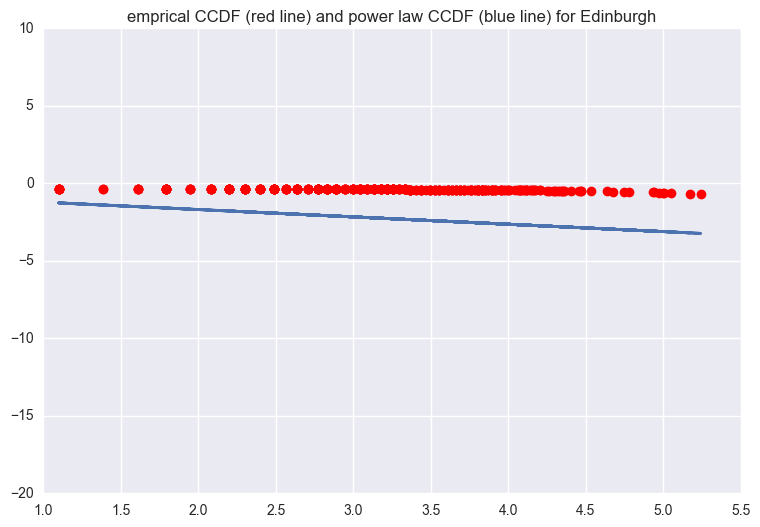

In [117]:
from scipy import stats
import matplotlib.mlab as mlab

fig=plt.figure(figsize=(9,6))
x=df[df.city=='Edinburgh']['review_count']
y_CCDF=1-stats.norm.cdf(x,param[0],param[1])
plt.plot(np.log(x),np.log(y_CCDF),'ro',linewidth=2)
y1=alpha_Edinburgh*x**(-alpha_Edinburgh)
plt.plot(np.log(x),np.log(y1),'-',linewidth=2)
plt.ylim(-20,10,0.5)
plt.title('emprical CCDF (red line) and power law CCDF (blue line) for Edinburgh')

plt.show()# Tweak spacing to prevent clipping of ylabel    
plt.subplots_adjust(left=0.15) 

According to above graph, the log-log emprical frequency didn't capture the pdf for power law model very well, therefore, the powerlaw  distribution is unfit for 'review count' of city 'Edinburgh'.

The following way is to apply 'KStest' to find which probability distributin is fit for the 'review count' of 'Edinburgh'.

In [474]:
KS_Ed=(left_tail_Ed-left_tail_Ed.mean())/left_tail_Ed.std()
test_stat = kstest(KS_Ed, 'norm')
print (test_stat)

KS_Ed=(left_tail_Ed-left_tail_Ed.mean())/left_tail_Ed.std()
test_stat = kstest(KS_Ed, 'expon')
print (test_stat)

KstestResult(statistic=0.27171071052623624, pvalue=0.15573379615776073)
KstestResult(statistic=0.5625, pvalue=2.6500806248330733e-05)


Based on above KStest calculation, the normal distribution is fit for left tail of 'review count' of 'Edinburgh'.

In [476]:
body_Ed=(body_Ed-body_Ed.mean())/body_Ed.std()
test_stat = kstest(body_Ed, 'norm')
print (test_stat)

body_Ed=(body_Ed-body_Ed.mean())/body_Ed.std()
test_stat = kstest(body_Ed, 'expon')
print (test_stat)

KstestResult(statistic=0.12812622119057421, pvalue=9.7231985052070868e-05)
KstestResult(statistic=0.60535117056856191, pvalue=0.0)


In [575]:
9.7231985052070868e-05<0.05

True

Based on above KStest calculation, the pvalue is lower than 5%. So normal and exponential distribution is unfit for body of 'review count' of 'Edinburgh'.

In [485]:
KS_right_Ed=(right_tail_Ed-right_tail_Ed.mean())/right_tail_Ed.std()
test_stat = kstest(KS_right_Ed, 'norm')
print (test_stat)

KS_right_Ed=(right_tail_Ed-right_tail_Ed.mean())/right_tail_Ed.std()
test_stat = kstest(KS_right_Ed, 'expon')
print (test_stat)

KstestResult(statistic=0.13976392335179355, pvalue=0.91343420424850119)
KstestResult(statistic=0.5, pvalue=0.00031858310707955084)


Based on above KStest calculation, the pvalue is over 0.9. So the normal distribution is successfully fit for right tail of 'review count' of 'Edinburgh'.

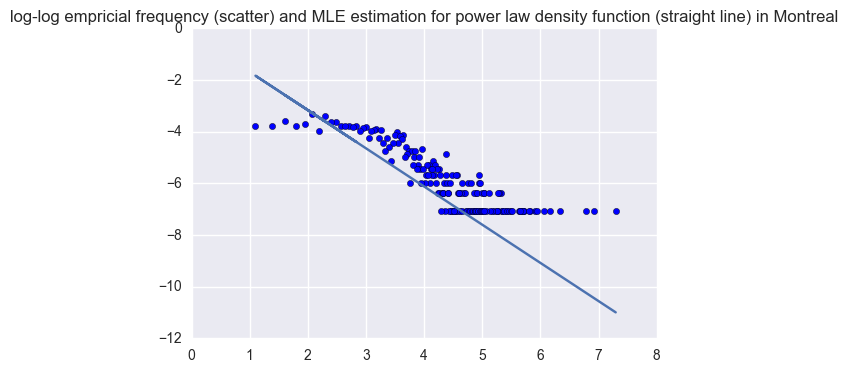

In [118]:
# Montreal
par=df[df.city=='Montr茅al']['review_count'].value_counts()
freq=par/sum(par)
plt.scatter(np.log(par.index),np.log(freq))
alpha = len(df[df.city=='Montr茅al']['review_count'])/sum(np.log(df[df.city=='Montr茅al']['review_count']/min(par.index)))
fitted = (alpha/min(par.index))*((par.index/min(par.index))**(-(alpha+1)))
plt.plot(np.log(par.index),np.log(fitted))
plt.title('log-log empricial frequency (scatter) and MLE estimation for power law density function (straight line) in Montreal')

According to above graph, the log-log emprical frequency didn't capture the MLE estimation for power law distribution function in Montreal

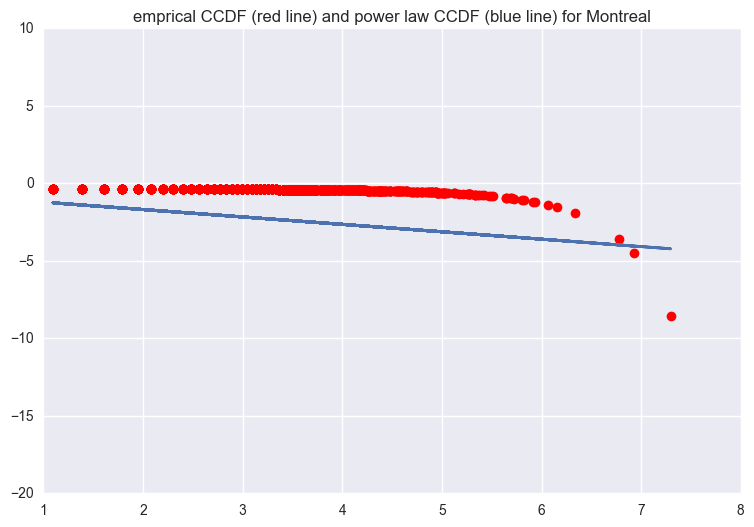

In [120]:
from scipy import stats
import matplotlib.mlab as mlab

fig=plt.figure(figsize=(9,6))
x=df[df.city=='Montr茅al']['review_count']
y_CCDF=1-stats.norm.cdf(x,param[0],param[1])
plt.plot(np.log(x),np.log(y_CCDF),'ro',linewidth=2)
y1=alpha_Montreal*x**(-alpha_Montreal)
plt.plot(np.log(x),np.log(y1),'-',linewidth=2)
plt.ylim(-20,10,0.5)
plt.title('emprical CCDF (red line) and power law CCDF (blue line) for Montreal')

plt.show()# Tweak spacing to prevent clipping of ylabel    
plt.subplots_adjust(left=0.15) 

According to above graph, the log-log emprical frequency didn't capture the pdf for power law model very well, therefore, the powerlaw  distribution is unfit for 'review count' of city 'Montreal'.

The following way is to apply KStest to find suitable probability distribution for 'review_count' of city 'Montreal'

In [514]:
# Montreal
left_tail_Montreal=Montreal['review_count'][0:20]
body_Montreal=Montreal['review_count'][21:1156]
right_tail_Montreal=Montreal['review_count'][1157:1176]

In [515]:
body_Montreal=(body_Montreal-body_Montreal.mean())/body_Montreal.std()
test_stat = kstest(body_Montreal, 'norm')
print (test_stat)

body_Montreal=(body_Montreal-body_Montreal.mean())/body_Montreal.std()
test_stat = kstest(body_Montreal, 'expon')
print (test_stat)

KstestResult(statistic=0.18917693010124825, pvalue=0.0)
KstestResult(statistic=0.67577092511013215, pvalue=0.0)


Based on above KStest prediction, the norm and exponential distribution is unfit for the body component of 'review count' of city 'Montreal'.

In [516]:
left_tail_Montreal=(left_tail_Montreal-left_tail_Montreal.mean())/left_tail_Montreal.std()
test_stat = kstest(left_tail_Montreal, 'norm')
print (test_stat)

left_tail_Montreal=(left_tail_Montreal-left_tail_Montreal.mean())/left_tail_Montreal.std()
test_stat = kstest(left_tail_Montreal, 'expon')
print (test_stat)

KstestResult(statistic=nan, pvalue=nan)
KstestResult(statistic=nan, pvalue=nan)


Based on above KStest prediction, the norm and exponential distribution is unfit for the lef tail area of 'review count' of city 'Montreal'.

In [517]:
right_tail_Montreal=(right_tail_Montreal-right_tail_Montreal.mean())/right_tail_Montreal.std()
test_stat = kstest(right_tail_Montreal, 'norm')
print (test_stat)

right_tail_Montreal=(right_tail_Montreal-right_tail_Montreal.mean())/right_tail_Montreal.std()
test_stat = kstest(right_tail_Montreal, 'expon')
print (test_stat)

KstestResult(statistic=0.28707794819714894, pvalue=0.070266646827692236)
KstestResult(statistic=0.75855095631311076, pvalue=6.872502567034644e-12)


In [582]:
6.872502567034644e-12<0.05

True

Based on above KStest prediction, the pvalue of Normal KStest is 7% which is over 5% significance level but not for exponential KStest. So the normal distribution is fit for the right tail component of 'review count' of city 'Montreal' but exponential distribution is unfit.

Finally, according to above KStest and plot visulization,  normal distribution is the only one which can fit at least one area of 'review count' in all three cities. So i will plot the normal distribution of 'review count' in these three cities in the same graph in order to make a comparison to confirm whether the resuls from the random forest, Spearman and Kendall correlation matrix before is correct. 

(5.1124437781109444, 7.3821136725077334)
(7.0843373493975905, 9.2797289367312583)
(3.86046511627907, 2.9576970562736982)


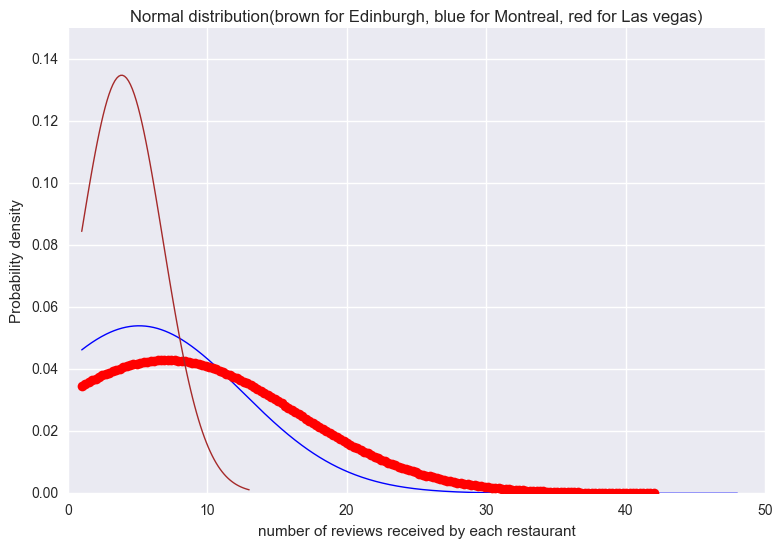

In [122]:
import matplotlib.mlab as mlab
fig=plt.figure(figsize=(9,6))
x=df[df.city=='Las Vegas']['review_count'].value_counts()
bins=len(df[df.city=='Las Vegas']['review_count'].value_counts())
plt.hist(x,bins, alpha=0)
n, bins, patches=plt.hist(x, bins, normed=1, facecolor='blue', alpha=0)

param=stats.norm.fit(x) 
print (param)
y = mlab.normpdf(bins, param[0], param[1])    
plt.plot(bins, y, 'b-', linewidth=1) #linewidth是调整线的粗细，默认值是‘1’   

x=df[df.city=='Montr茅al']['review_count'].value_counts()
bins=len(df[df.city=='Montr茅al']['review_count'].value_counts())
plt.hist(x,bins, alpha=0)

n, bins, patches=plt.hist(x, bins, normed=1, facecolor='blue', alpha=0)
param=stats.norm.fit(x) 
print (param)
y = mlab.normpdf(bins, param[0], param[1])    
plt.plot(bins, y, 'ro-', linewidth=1) #linewidth是调整线的粗细，默认值是‘1’   


x=df[df.city=='Edinburgh']['review_count'].value_counts()
bins=len(df[df.city=='Edinburgh']['review_count'].value_counts())
plt.hist(x,bins, alpha=0)

n, bins, patches=plt.hist(x, bins, normed=1, facecolor='brown', alpha=0)

param=stats.norm.fit(x) 
print (param)
y = mlab.normpdf(bins, param[0], param[1])    
plt.plot(bins, y, 'brown', linewidth=1) #linewidth是调整线的粗细，默认值是‘1’   
plt.xlabel('number of reviews received by each restaurant')    
plt.ylabel('Probability density') 
plt.ylim(0,0.15)
plt.title('Normal distribution(brown for Edinburgh, blue for Montreal, red for Las vegas)')
plt.show()

According to above figure, it is not hard to find that the probability density of value counts for the 'review count' of Edinbugh at the left side is obviously higher than Montreal's than Las Vegas's. Together with below graph, it is opposite that the probability density of 'star rating' of Edinburgh at the left side is obviously lower than Montreal's than Las Vegas's and the probability density of 'star rating' of Edinbugh at the right side is obviously higher than Montreal's than Las Vegas's. Therefore, the number of users who offer reviews has a negative relationship with 'star rating' for restaurant. It is noteworthy that the number of people who offer reviews is different with the mean of 'review count' i measured before.

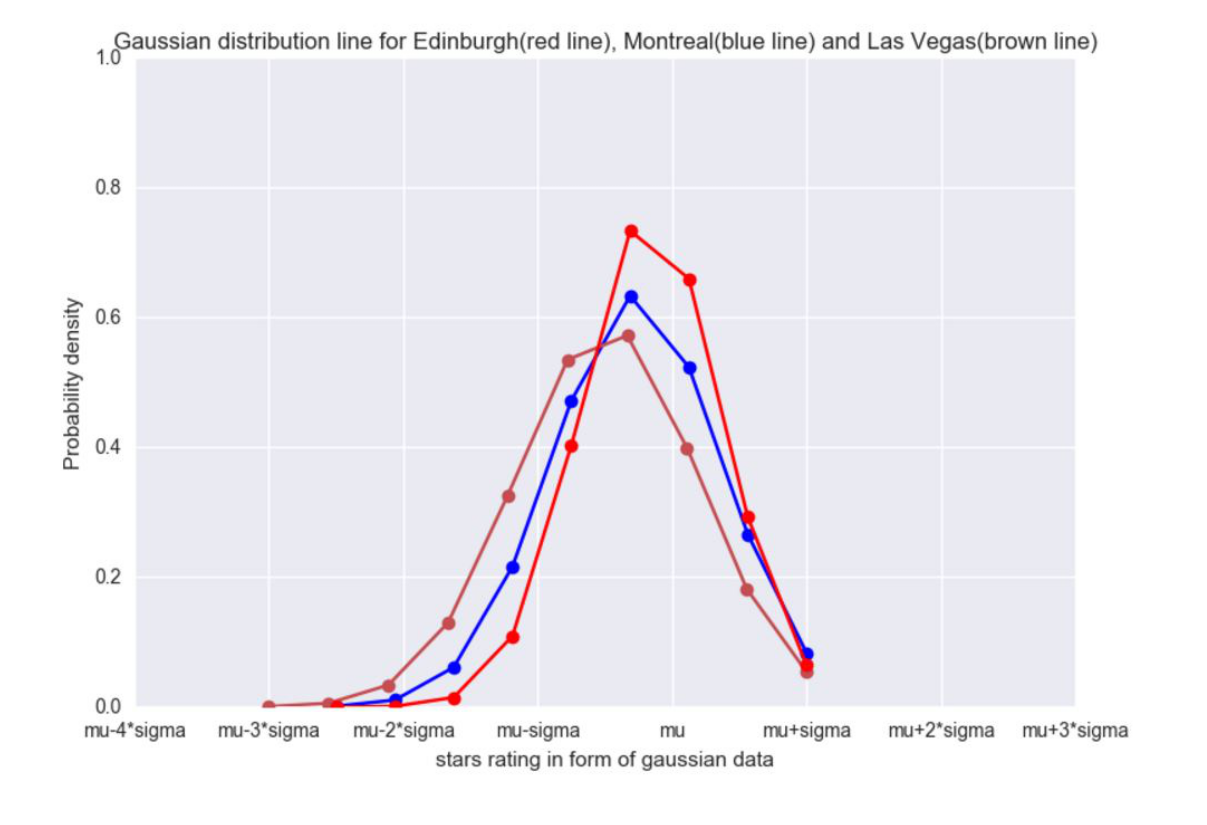

In [613]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(20,10))
lena = mpimg.imread('C:/Users/yifeichongtian/Desktop/DA final report/19.JPG')
plt.imshow(lena)
plt.axis('off')
plt.show()

## Task 5 Conclusion

According to some works like data exploratory, data processing, data analysis and data visualization, this report has get many various findings and results. Firstly, applying the "spearman" and "Kendall" method on whole dataset with 24 selected features to find the correlation level between features and 'star rating' without consideration of city difference. Both two methods confirm that the 'review count' and 'parking street' have a relatively higher correlation with 'star rating'. The correlation coefficient of 'review count' and 'parkingstreet' in 'Spearman' are '0.2247' and '0.145772' but other features are all below 0.1.  Similarly, the correlation coefficient in 'Kendall' of 'review count' and 'parking street' are 0.17 and 0.130947. Afterwards, applying random forest algorithms to get each feature importance for 'star rating' and also  recognized that 'review count' is the most important factor for 'stars'. In addition, random forest measured that 'city' is the secondest important single feature for 'stars' but different from the second most correlatd feature 'parking street' from 'Spearman' and 'Kendall' method. Afterwards, picking the feature selected from random forest for logistic regression by setting a threahold (feature_importance > 0.1). The odds ratio measured by logistic regression for 'review count' and 'city' are all over 1, whcih means 'review count' and 'city' all have a positive relationship with 'star rating'. After finishing the feature analysis in whole dataset, this report also applied the 'spearman', 'kendall', random forest and logistic regression to analyse the relationship between feature and 'stars' in each city including Las vegas, Montreal and Edinburgh. The result of 'spearman' and 'kendall' in each city are shown below:

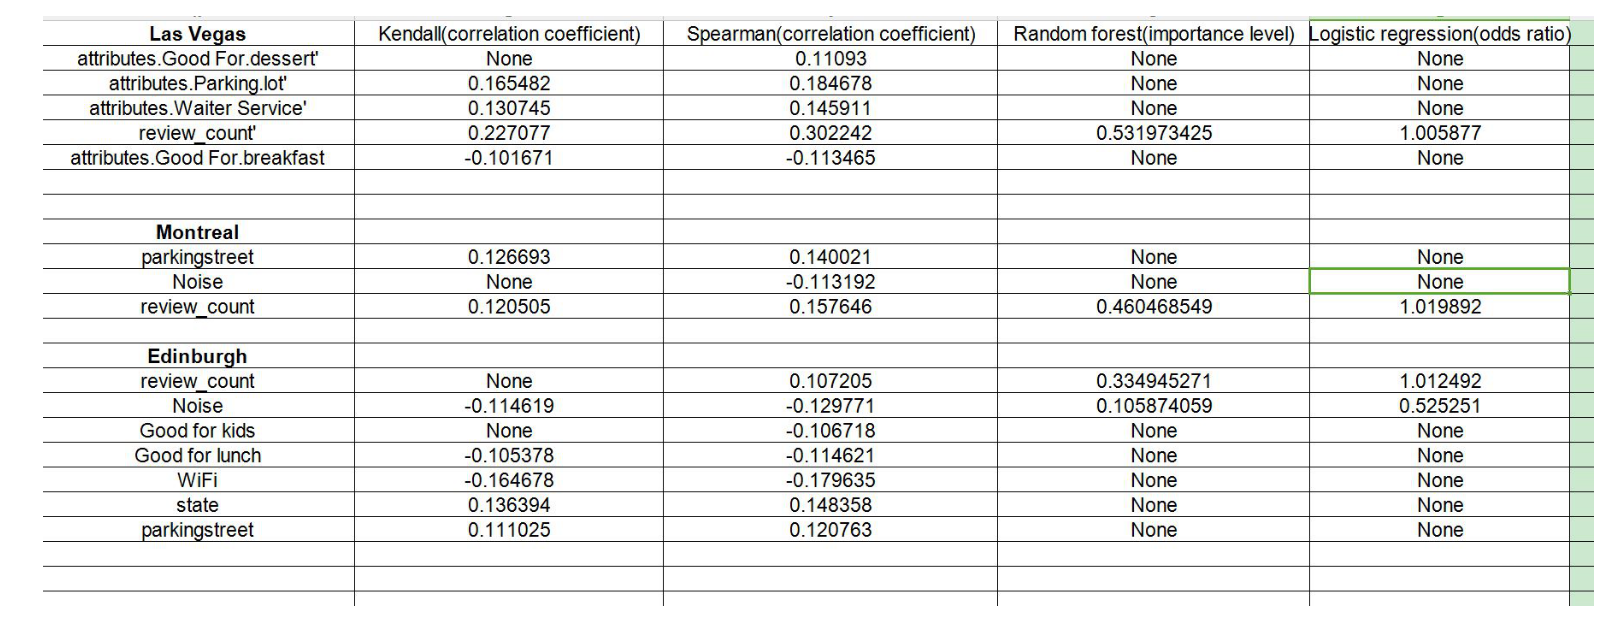

In [772]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(20,10))
lena = mpimg.imread('C:/Users/yifeichongtian/Desktop/DA final report/20.JPG')
plt.imshow(lena)
plt.axis('off')
plt.show()

In these three cities (Las vegas, Montreal and Edinburgh), all four methods recognized that 'review count' is important to 'star'. However, the importance of 'review count' in Las vegas is over 0.5 which is obviously higher than other two cities (Montreal: '0.46', Edinburgh : '0.335) and Edinburgh is the least one. Other features are tested out by these four methods are possible important features and they are different in different cities. In Las vegas, 'attributes  Good for dessert'. 'attributes Parking lot', 'attributes Waiter service' and 'attributes Good for breakfast' all could have a unsmall impact on 'star rating' of restaurant. Among them, only 'attributes Good for breakfast' has a negative impact on 'star rating' of restaurant. In city 'Montreal', besides 'review count', 'parking street' and 'Noise' could be important for 'star rating' in restaurant. Among them, 'Noise' is negative and 'parkingstreet' is positive for 'star' of restaurant. In Edinburgh, customer also cares the 'Noise' and parking street' feature like in Montreal. Additionally, 'Good for kids','Good for lunch','WiFi', 'State' may also affect the benefits of restaurant including its 'star rating'. 

At the end of the Data analysis part, i also find that the number of users who offer reviews has a negative relationship with 'star rating' for restaurant by comparing the distribution graph for 'star rating' and 'number of people who give review' in each city at the same time. In addition, the mean value of 'star rating' in each city also support because the mean of staring raio in Las Vegas(3.514370) is lower than Montreal(3.734269) which is lower than Edinburgh (3.840361) and the number of people who give review in Las Vegas (3410) is higher than in Montreal(1176) which is bigger than in Edinburgh(332).

Finally, although this report finds that 'review count' will be strongly related with 'star rating' in restaurant. However, the data in this report cannot ensure the quality of 'review count'. In current world with full of tricks, the boss in the restaurant will carefully do some extra works on reparing the feature like 'review count' which can affect the 'star rating' and customer's impression. For example, boss will unnecessarily post many excellent reviews online in order to improve the 'star rating' of his restaurant. In order to solve this problem. we could need 'Natural language processing' skill to judge the attitude of 'review count' feature.